<div style="background-color: darkblue; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="1"></a> 
    <h1 style="color: white;">Анализ рынка недвижимости в РФ за 2018-2021 гг.</h1>
</div> 

Данный проект посвящен анализу рынка недвижимости Российской Федерации в период с 2018 по 2021 год. В рамках проекта мне было интересно погрузиться в данные и узнать: от каких факторов зависит цена на недвижимость? какие могут быть скрытые закономерности в ценообразовании? зависит ли цена на недвижимость от сезона? Также выбранный набор данных оказался очень интересным с точки зрения EDA, предобработки и заполнения пропущенных значений. В процессе проведения анализа были применены различные методы работы с данными, статистического анализа и машинного обучения. 

### Задачи проекта:

#### 1. Подготовка и очистка данных:
  Проект предполагает тщательную очистку и предварительную обработку данных. Это включает в себя интеграцию данных о недвижимости с информацией о регионах, разработку стратегии заполнения пропущенных значений, а также выявление и обработка выбросов для обеспечения достоверности анализа.

#### 2. Анализ ценовых трендов и сезонности:
  В проекте я ставлю перед собой цель проанализировать динамику цен на недвижимость для выявления сезонных трендов, определяющих наиболее выгодное время для покупки и продажи. На основе выявленных сезонных паттернов будут разработаны рекомендации по оптимальному времени совершения сделок с целью максимизации выгоды для покупателей и продавцов.

#### 3. Определение факторов, влияющих на цену:
  В рамках проекта планируется выявить ключевые факторы, влияющие на стоимость недвижимости. Будет проведен анализ корреляции и множественный линейный регрессионный анализ для определения статистически значимых факторов, определяющих цену (площадь, расположение, количество комнат и т.д.). Также будет изучено влияние других факторов, по которым представлены данные в наборе данных. 

#### 4. Проверка гипотез:
  Проект предполагает проведение серии статистических тестов для проверки собственных гипотез о рынке недвижимости. Результаты тестов будут проанализированы для оценки статистической значимости выявленных закономерностей.

**Описание полей:**

* date - дата объявления
* region - Регион
* building_type - Тип дома 0 - Другое. 1 - Панельный. 2 - Кирпично-монолитный. 3 - Кирпичный. 4 - Блочный 5 - Деревянный
* object_type -  1 - Вторичный рынок; 11 - Первичный рынок;
* level - Этаж
* levels - Число этажей
* rooms - Число комнат, где -1 означает студия
* area - Общая площадь
* kitchen_area - Площадь кухни
* price - Цена в руб.

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="2"></a> 
    <h1 style="color: darkblue;">Навигация по работе</h1>
</div> <a class="anchor" id="2"></a> 

1. [Знакомство с данными: EDA](#3)
 * [Выводы по знакомству с данными](#4)
2. [Работа с экстремальными значениями](#5)
 * [Выводы по предобработке данных](#6)
3. [Заполнение пропусков](#7)
 * [Выводы по заполнению пропусков](#8)
4. [Исследование рынка недвижимости в РФ за представленный период](#9)
 * [Выводы по исследованию](#10)
5. [Когда выгодно покупать/продавать объект недвижимости? Иccледование сезонности цен на квартиры](#11)
 * [Выводы по исследованию](#12)
6. [Формулировка своих гипотез о данных и их проверка с помощью статистических методов](#13)
 * [Выводы по исследованию](#14)


## Библиотеки

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# --- SciPy ---
import scipy.stats as stats
from scipy.stats import boxcox, invgauss, probplot, norm, friedmanchisquare, kruskal
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# --- Statsmodels ---
import statsmodels.api as sm
import statsmodels.formula.api as sf
import statsmodels.stats.api as sms
from statsmodels.genmod.families import family
from statsmodels.genmod.families.family import Tweedie
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- Scikit-learn ---
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# --- LightGBM ---
import lightgbm as lgb

# --- XGBoost ---
import xgboost as xgb
from xgboost import XGBRegressor

# --- Дополнительно ---
import warnings
warnings.filterwarnings("ignore")

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="3"></a> 
    <h1 style="color: darkblue;">Знакомство с данными: EDA</h1>
</div> <a class="anchor" id="3"></a> 

**Загрузим данные в переменную df**

In [2]:
df = pd.read_csv('realty_18_21.csv')

**Размер датасета**

In [5]:
df.shape

(5477006, 10)

In [4]:
df.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1


В датасете представлены данные по **5 477 006** квартирам, объяленных на продажу **c 2018 по 2021 годы**. В столбцах датасета представлены характеристики квартир: их стоимость, код региона, в котором она находится, а так же тип здания, количество комнат, общая площадь комнат и площадь кухни. В последнем столбце указано, на каком рынке продается квартира: на первичном или на вторичном. 

**Описательные статистики**

In [7]:
describe = df[['price', 'level', 'levels', 'rooms', 'area', 'kitchen_area']].describe()
formatted_describe = describe.style.format({'число': '{:.2f}'})

formatted_describe

,price,level,levels,rooms,area,kitchen_area
count,5477006.000000,5477006.000000,5477006.000000,5477006.000000,5477006.000000,5223295.000000
mean,4422029.022870,6.214530,11.398920,1.726173,53.918249,10.628499
std,21507519.154802,4.957419,6.535734,1.082133,33.352926,9.935187
min,-2144967296.000000,1.000000,1.000000,-2.000000,0.070000,0.010000
25%,1950000.000000,2.000000,5.000000,1.000000,38.000000,7.000000
50%,2990000.000000,5.000000,10.000000,2.000000,48.020000,9.700000
75%,4802000.000000,9.000000,16.000000,2.000000,63.130000,12.700000
max,2147483647.000000,39.000000,39.000000,10.000000,7856.000000,9999.000000


**Уже можно заметить некоторые проблемы.**

* Минимальная цена отрицательная и достаточно крупная: `-2 144 967 296` рублей. Вероятнее всего, это либо ошибка в знаке, либо выброс. Попробуем разобраться с этим немного позднее.
* Минимальное значение числа комнат: `-2`. По условию, -1 - это студия, а что такое -2, мы не знаем. 
* Максимальная площадь кухни: `9 999` квадратных метров превышает максимальную площадь квартиры: `7 856` квадратных метров, что в принципе невозможно.
* Мне непонятны минимальные значения площадей, потому что я слабо верю в квартиру размером в `7` квадратных сантиметров. 
* Сразу заметны пропуски в данных по размерам кухонь. 

**Пропуски в данных**

In [8]:
df.isnull().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     253711
object_type           0
dtype: int64

Как и было замечено на describe, у нас `253 711` пропусков по столбцу **kitchen_area**. 

**Проверим типы данных**

In [9]:
df.dtypes

price              int64
date              object
region             int64
building_type      int64
level              int64
levels             int64
rooms              int64
area             float64
kitchen_area     float64
object_type        int64
dtype: object

Во всех столбцах типы данных указаны верно, за исключением столбца **date**: его нужно привести к формату дата/время. 

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.head(1)

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1


In [11]:
earliest = df['date'].min()
latest = df['date'].max()

print(f'В нашем датасете данные представлены с {earliest} по {latest}')

В нашем датасете данные представлены с 2018-02-19 00:00:00 по 2021-05-01 00:00:00


**Заголовки**

In [12]:
df.columns

Index(['price', 'date', 'region', 'building_type', 'level', 'levels', 'rooms',
       'area', 'kitchen_area', 'object_type'],
      dtype='object')

Все заголовки в нашем наборе данных записаны корректно. 

**Дубликаты**

In [14]:
df[df.duplicated()].shape[0]

235655

Обнаружили достаточно большое количество дубликатов: `235 655`. Однако я считаю, что их нужно удалить, потому что это строки датасета, дублирующие сами себя по всем столбцам. Наверное, данные по каким-то квартирам внесли не один раз, и такое количество одинаковых данных может исказить результаты анализа. 

In [4]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(5241351, 10)

Проверка на скрытые дубликаты не требуется (а обработка некорректных значений в столбцах с категорильным типом данных будет произведена позднее). 

**Посмотрим на данные поближе с помощью визуализации**

**Начнем с цен на квартиры.** По методу describe уже были определены основные статистики распределения: 

* Минимальное значение: `-2 144 967 296` рублей;
* 1 квантиль распределения (25%): `1 950 000` рублей;
* Медиана (50%): `2 990 000` рублей;
* 3 квантиль распределения: `4 802 000` рублей;
* Максимальное значение: `2 147 483 647` рублей.

По шкале X: 1e6 - в миллионах (1 000 000); 1e7 - в 10 миллионах (10 000 000). Два последних графика: значения в миллиардах. 

In [16]:
# расчет статистик
mean_price = df['price'].mean()
median_price = df['price'].median()
p25 = df['price'].quantile(0.25)
p75 = df['price'].quantile(0.75)
p99 = df['price'].quantile(0.99)
p90 = df['price'].quantile(0.90)
min_price = df['price'].min()
max_price = df['price'].max()

print(f'Средняя цена: {mean_price}')
print(f'Медианная цена: {median_price}')
print(f'25% процентиль (p25): {p25}')
print(f'75% процентиль (p75): {p75}')
print(f'90% процентиль (p90): {p90}')
print(f'99% процентиль (p99): {p99}')
print(f'Минимальная цена: {min_price}')
print(f'Максимальная цена: {max_price}')

Средняя цена: 4505811.637392917
Медианная цена: 3050000.0
25% процентиль (p25): 2000000.0
75% процентиль (p75): 4940000.0
90% процентиль (p90): 8246000.0
99% процентиль (p99): 24620000.0
Минимальная цена: -2144967296
Максимальная цена: 2147483647


Значения изменились после удаления дубликатов, значит, они существенно влияли на распределение. 

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Attempting to set identical left == right == 2.147483647 results in singular transformations; automatically expanding.


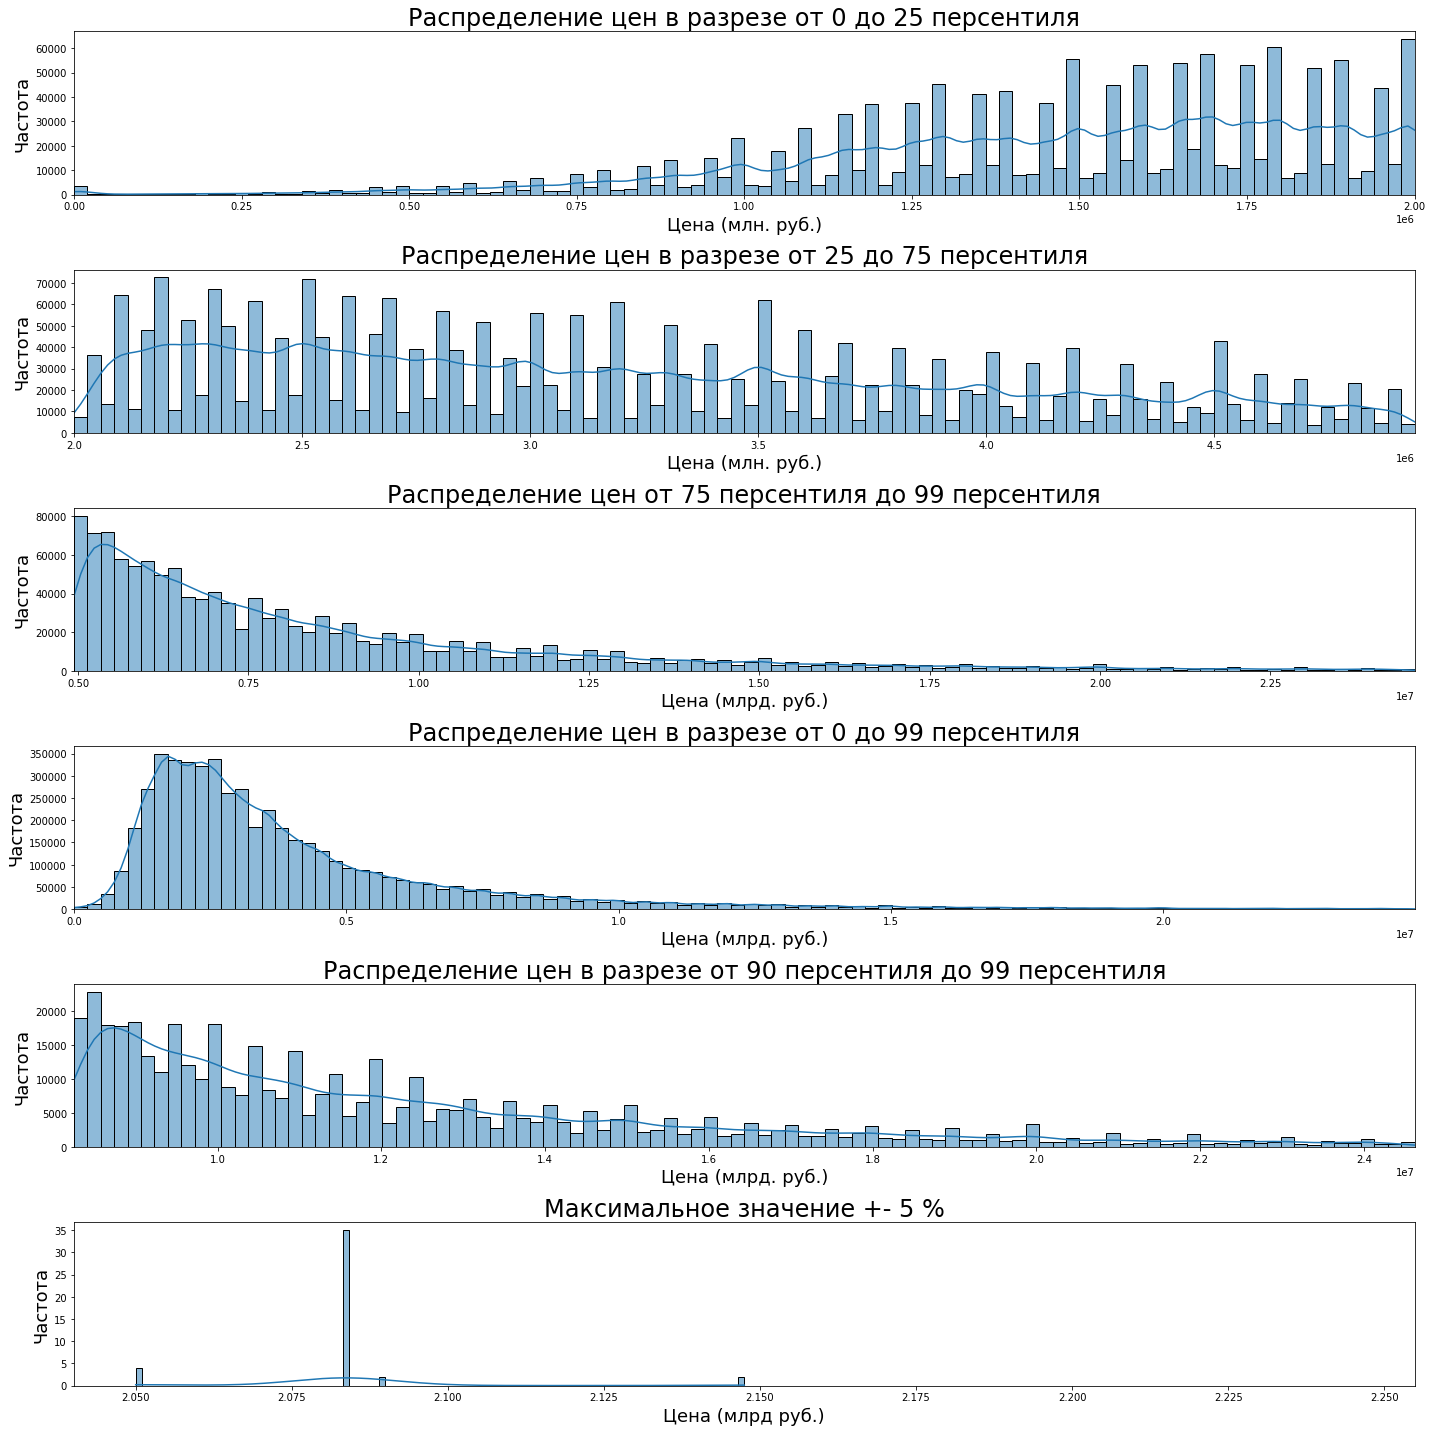

In [20]:
plt.figure(figsize=(20, 20))

# График 1: значения от 0 до 25 персентиля
plt.subplot(6, 1, 1)
sns.histplot(df[(df['price'] > 0) & (df['price'] <= p25)]['price'], bins=100, kde=True)
plt.title('Распределение цен в разрезе от 0 до 25 персентиля', fontsize=24)
plt.xlabel('Цена (млн. руб.)', fontsize=18)
plt.xlim(0, p25)
plt.ylabel('Частота', fontsize=18)

# График 2: значения между 25 и 75 персентилем
plt.subplot(6, 1, 2)
sns.histplot(df[(df['price'] > p25) & (df['price'] <= p75)]['price'], bins=100, kde=True)
plt.xlim(p25, p75)
plt.title('Распределение цен в разрезе от 25 до 75 персентиля', fontsize=24)
plt.xlabel('Цена (млн. руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

# График 3: значения от 75 персентиля до 99 персентиля
plt.subplot(6, 1, 3)
sns.histplot(df[(df['price'] > p75) & (df['price'] <= p99)]['price'], bins=100, kde=True)
plt.title('Распределение цен от 75 персентиля до 99 персентиля', fontsize=24)
plt.xlim(p75, p99)
plt.xlabel('Цена (млрд. руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

# График 4: значения от 0 до 99 персентиля 
plt.subplot(6, 1, 4)
sns.histplot(df[(df['price'] > 0) & (df['price'] <= p99)]['price'], bins=100, kde=True)
plt.title('Распределение цен в разрезе от 0 до 99 персентиля', fontsize=24)
plt.xlim(0, p99)
plt.xlabel('Цена (млрд. руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

# График 5: значения от 90 до 99 персентиля
plt.subplot(6, 1, 5)
sns.histplot(df[(df['price'] > p90) & (df['price'] <= p99)]['price'], bins=100, kde=True)
plt.title('Распределение цен в разрезе от 90 персентиля до 99 персентиля', fontsize=24)
plt.xlim(p90, p99)
plt.xlabel('Цена (млрд. руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

# График 7: диапазон рядом с максимальным значением 
lower_bound = max_price * 0.95
upper_bound = max_price
plt.subplot(6, 1, 6)
sns.histplot(df[(df['price'] > lower_bound) & (df['price'] <= upper_bound)]['price'] / 1000000000, bins=100, kde=True)
plt.title('Максимальное значение +- 5 %', fontsize=24)
plt.xlim(upper_bound / 1000000000, upper_bound / 1000000000)
plt.xlabel('Цена (млрд руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

plt.tight_layout()
plt.show()

In [21]:
count_below_p25 = df[df['price'] < p25].shape[0]
count_between_p25_and_median = df[(df['price'] >= p25) & (df['price'] < median_price)].shape[0]
count_between_median_and_p75 = df[(df['price'] >= median_price) & (df['price'] < p75)].shape[0]
count_above_p75 = df[df['price'] >= p75].shape[0]

print(f'Количество квартир с ценой ниже 25%: {count_below_p25}')
print(f'Количество квартир с ценой между 25% и медианой: {count_between_p25_and_median}')
print(f'Количество квартир с ценой между медианой и 75%: {count_between_median_and_p75}')
print(f'Количество квартир с ценой выше 75%: {count_above_p75}')

Количество квартир с ценой ниже 25%: 1299335
Количество квартир с ценой между 25% и медианой: 1315507
Количество квартир с ценой между медианой и 75%: 1315988
Количество квартир с ценой выше 75%: 1310521


In [22]:
df['decile'] = pd.qcut(df['price'], 10, labels=False) + 1
decile_counts = df['decile'].value_counts().sort_index()

for decile, count in decile_counts.items():
    print(f'Количество квартир в дециле {decile}: {count}')

Количество квартир в дециле 1: 528782
Количество квартир в дециле 2: 547763
Количество квартир в дециле 3: 523878
Количество квартир в дециле 4: 541016
Количество квартир в дециле 5: 489932
Количество квартир в дециле 6: 529343
Количество квартир в дециле 7: 524676
Количество квартир в дециле 8: 507691
Количество квартир в дециле 9: 524135
Количество квартир в дециле 10: 524135


**Что можно сказать по распределению цен на квартиры:**

* Можно сказать, к каждой из четвертей распределения относится примерно одинаковое количество квартир: от `1 299 335` в первой четверти до `1 315 988` в третьей четверти.
* Между децилями квартиры распределены тоже относительно равномерно. 
* `2 631 495` квартир расположено между 25 и 75 персентилями, составляя основную часть распределения.
* Межквартильный размах - самый интересный промежуток. В нем наблюдается цены от 2 до почти 5 миллионов. Частота значений сильно колеблется и можно заметить, что есть "популярные" цены, которые встречаются чаще, чем другие. Я рассмотрела график на более узких промежутках и это, как правило, цены, переходящие через 100 000. Например, 2 миллиона 100 тысяч (+-) встречается более 60 000 раз, 2 миллиона 200 тысяч встречается чуть больше 70 000 тысяч раз, а значения между 2,1 и 2,2 миллионами встречается уже реже. В общем, это обычная тенденция в ценообразовании, чаще всего устанавливают суммы, близкие к круглым.
* Что касается диапазона рядом с максимальным значением. У нас есть несколько из ряда вон выходящих значений, превосходящих 2 миллиарда. Нужно будет подробнее рассмотреть этот промежуток на этапе очистки датасета от выбросов и оценить эти значения на адекватность.
* Еще можно заметить утолщение гистограммы на нуле: это либо квартиры с нулевой ценой, либо с очень маленькой. Этот момент тоже нужно будет рассмотреть подробнее.
* При построении графика в масштабе от 0 до 99 персентиля стал заметен большой хвост распределения справа. Большая часть значений расположена до 5 миллионов. При приближении масштаба было замечено, что у распределения 2 пика:  от 1,5 до 1,7 миллионов: примерно 350 000 квартир и чуть более 250 000 квартир продается по цене около 3 млн. руб. После 3 миллионов частота дальнейших цен идет на спад.

**Аналогичным образом рассмотрим распределение площадей квартир**

In [23]:
# расчет статистик
mean_area = df['area'].mean()
median_area = df['area'].median()
p25 = df['area'].quantile(0.25)
p75 = df['area'].quantile(0.75)
p99 = df['area'].quantile(0.99)
p90 = df['area'].quantile(0.90)
min_area = df['area'].min()
max_area = df['area'].max()

print(f'Средняя площадь: {mean_area}')
print(f'Медианная площадь: {median_area}')
print(f'25% процентиль (p25): {p25}')
print(f'75% процентиль (p75): {p75}')
print(f'90% процентиль (p90): {p90}')
print(f'99% процентиль (p99): {p99}')
print(f'Минимальная площадь: {min_area}')
print(f'Максимальная площадь: {max_area}')

Средняя площадь: 53.96432766857256
Медианная площадь: 48.02
25% процентиль (p25): 38.0
75% процентиль (p75): 63.2
90% процентиль (p90): 81.0
99% процентиль (p99): 139.19
Минимальная площадь: 0.07
Максимальная площадь: 7856.0


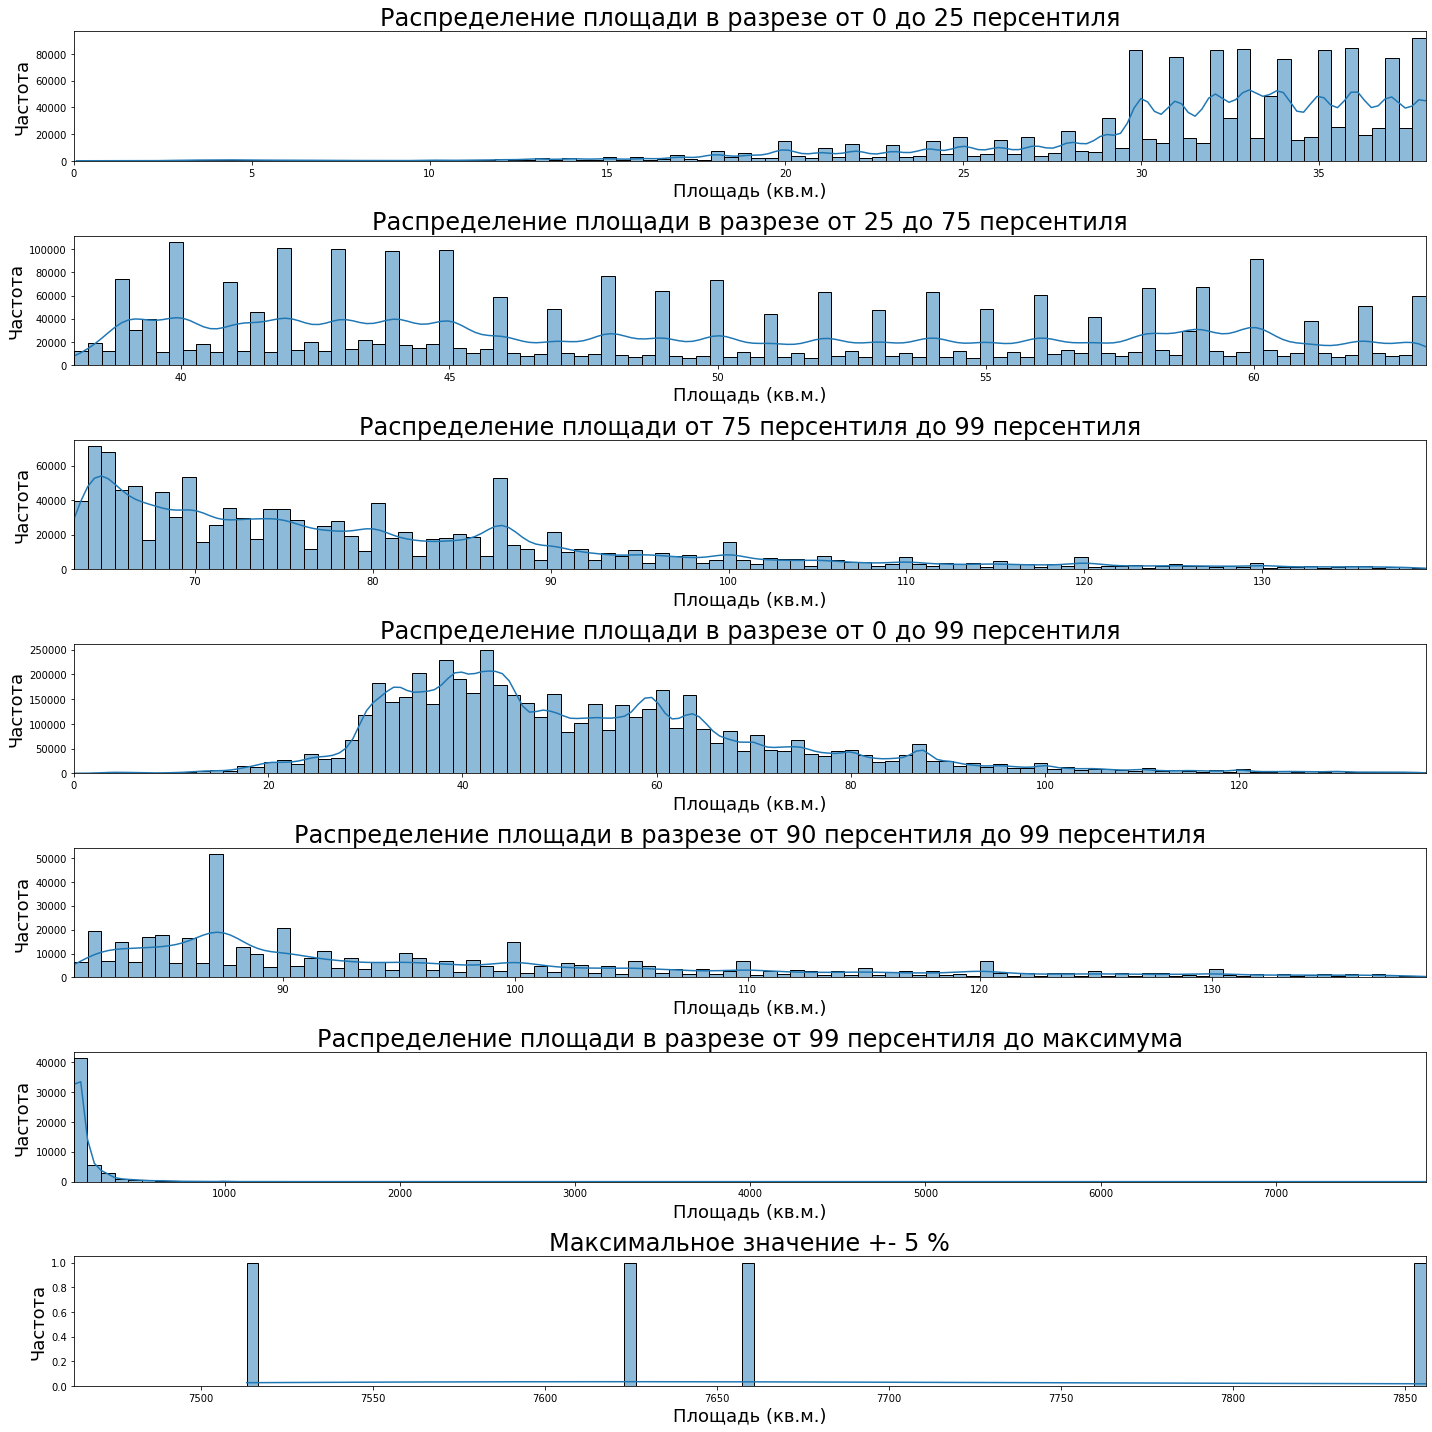

In [24]:
plt.figure(figsize=(20, 20))

# График 1: значения от 0 до 25 персентиля
plt.subplot(7, 1, 1)
sns.histplot(df[(df['area'] > 0) & (df['area'] <= p25)]['area'], bins=100, kde=True)
plt.title('Распределение площади в разрезе от 0 до 25 персентиля', fontsize=24)
plt.xlabel('Площадь (кв.м.)', fontsize=18)
plt.xlim(0, p25)  
plt.ylabel('Частота', fontsize=18)

# График 2: значения между 25 и 75 персентилем
plt.subplot(7, 1, 2)
sns.histplot(df[(df['area'] > p25) & (df['area'] <= p75)]['area'], bins=100, kde=True)
plt.title('Распределение площади в разрезе от 25 до 75 персентиля', fontsize=24)
plt.xlabel('Площадь (кв.м.)', fontsize=18)
plt.xlim(p25, p75)
plt.ylabel('Частота', fontsize=18)

# График 3: значения от 75 персентиля до 99 персентиля
plt.subplot(7, 1, 3)
sns.histplot(df[(df['area'] > p75) & (df['area'] <= p99)]['area'], bins=100, kde=True)
plt.title('Распределение площади от 75 персентиля до 99 персентиля', fontsize=24)
plt.xlabel('Площадь (кв.м.)', fontsize=18)
plt.xlim(p75, p99)
plt.ylabel('Частота', fontsize=18)

# График 4: значения от 0 до 99 персентиля 
plt.subplot(7, 1, 4)
sns.histplot(df[(df['area'] > 0) & (df['area'] <= p99)]['area'], bins=100, kde=True)
plt.title('Распределение площади в разрезе от 0 до 99 персентиля', fontsize=24)
plt.xlabel('Площадь (кв.м.)', fontsize=18)
plt.xlim(0, p99)
plt.ylabel('Частота', fontsize=18)

# График 5: значения от 90 до 99 персентиля
plt.subplot(7, 1, 5)
sns.histplot(df[(df['area'] > p90) & (df['area'] <= p99)]['area'], bins=100, kde=True)
plt.title('Распределение площади в разрезе от 90 персентиля до 99 персентиля', fontsize=24)
plt.xlabel('Площадь (кв.м.)', fontsize=18)
plt.xlim(p90, p99)
plt.ylabel('Частота', fontsize=18)

# График 6: значения от 99 персентиля до максимума
plt.subplot(7, 1, 6)
sns.histplot(df[(df['area'] > p99) & (df['area'] <= max_area)]['area'], bins=100, kde=True)
plt.title('Распределение площади в разрезе от 99 персентиля до максимума', fontsize=24)
plt.xlabel('Площадь (кв.м.)', fontsize=18)
plt.xlim(p99, max_area)
plt.ylabel('Частота', fontsize=18)

# График 7: диапазон рядом с максимальным значением 
lower_bound = max_area * 0.95
upper_bound = max_area
plt.subplot(7, 1, 7)
sns.histplot(df[(df['area'] > lower_bound) & (df['area'] <= upper_bound)]['area'], bins=100, kde=True)
plt.title('Максимальное значение +- 5 %', fontsize=24)
plt.xlabel('Площадь (кв.м.)', fontsize=18)
plt.xlim(lower_bound, upper_bound)
plt.ylabel('Частота', fontsize=18)

plt.tight_layout()
plt.show()

**Что можно сказать по распределению площади квартир:**

* Адекватная площадь квартиры начинается примерно с 20 квадратных метров. Все что меньше нужно будет изучить. 
* Всплески на гистограмме, вероятно, являются целыми числами. Дробные значения встречаются реже. Если посмотреть на межквартильный размах (от 25 до 75 персентиля), то можно заметить, что целые значения площадей квартир кратно превышают дробные. 
* На гистограмме для размеров квартиры от 0 до 99 персентиля распределения можно заметить снижение количества квартир с площадью от 45 до 57 (примерно) квадратных метров и всплеск частот на промежутке с площадью от 58 до 60 квадратных метров. 
* На последней гистограмме с максимальным значением можно заметить единичные случаи с квартирами площадью более 7 километров. Я очень сомневаюсь, что такое может быть, но подробнее рассмотрим это на этапе удаления выбросов. 

**Теперь рассмотрим другие столбцы. Для них больше подойдут столбчатые диаграммы, поскольку тип данных в них - категориальный.**

Мне кажется, что вторичный рынок правильнее обозначить как `2`, а не `11`. 

In [5]:
df['object_type'] = df['object_type'].replace(11, 2)

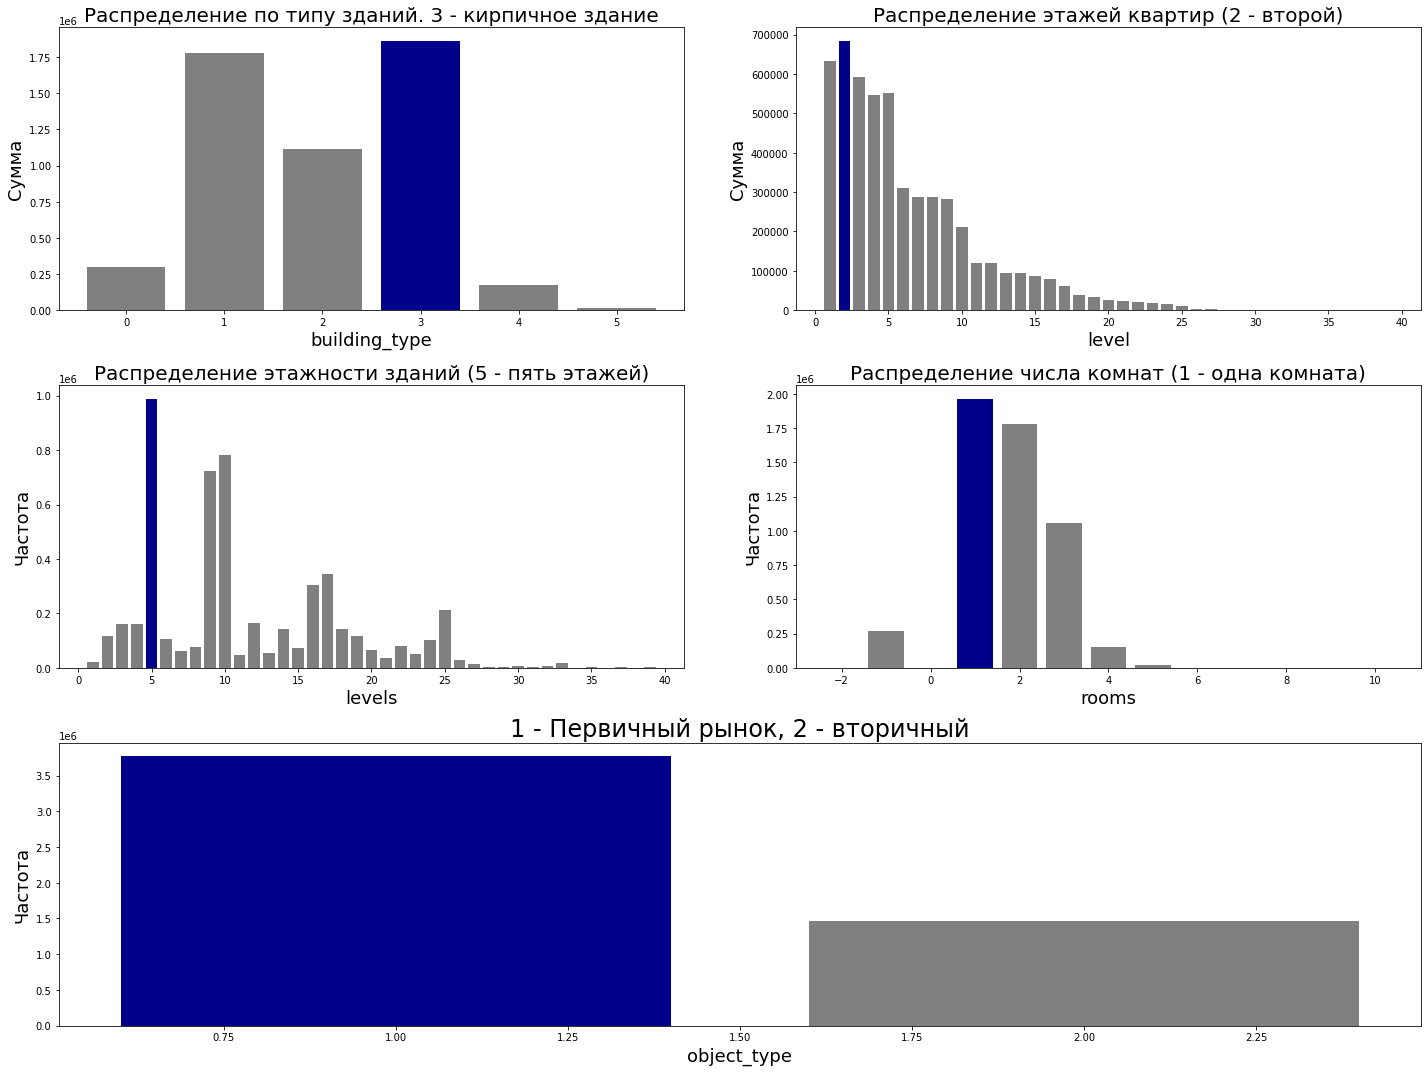

In [26]:
# выделим максимальное значение синим, а остальные закрасим серым для наглядности 

plt.figure(figsize=(20, 15))

def bar_plot_with_highlighted_max(x, y, title, xlabel, ylabel, subplot_position):
    plt.subplot(3, 2, subplot_position)
    # максимальное значение
    max_value_index = np.argmax(y)

    colors = ['grey'] * len(y)  
    colors[max_value_index] = 'darkblue'

    plt.bar(x, y, color=colors)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)

# График 1: Столбчатая диаграмма для building_type
y_building_type = df['building_type'].value_counts()
bar_plot_with_highlighted_max(y_building_type.index, y_building_type.values, 'Распределение по типу зданий. 3 - кирпичное здание', 'building_type', 'Сумма', 1)

# График 2: Столбчатая диаграмма для level
y_level = df['level'].value_counts()
bar_plot_with_highlighted_max(y_level.index, y_level.values, 'Распределение этажей квартир (2 - второй)', 'level', 'Сумма', 2)

# График 3: Столбчатая диаграмма для levels
y_levels = df['levels'].value_counts()
bar_plot_with_highlighted_max(y_levels.index, y_levels.values, 'Распределение этажности зданий (5 - пять этажей)', 'levels', 'Частота', 3)

# График 4: Столбчатая диаграмма для rooms
y_rooms = df['rooms'].value_counts()
bar_plot_with_highlighted_max(y_rooms.index, y_rooms.values, 'Распределение числа комнат (1 - одна комната)', 'rooms', 'Частота', 4)

# График 5: Столбчатая диаграмма для object_type
y_object_type = df['object_type'].value_counts()
plt.subplot(3, 2, (5, 6)) 
colors = ['grey'] * len(y_object_type)  
max_value_index = np.argmax(y_object_type.values)
colors[max_value_index] = 'darkblue'  
plt.bar(y_object_type.index, y_object_type.values, color=colors)
plt.title('1 - Первичный рынок, 2 - вторичный', fontsize=24)
plt.xlabel('object_type', fontsize=18)
plt.ylabel('Частота', fontsize=18)

plt.tight_layout()  
plt.show()  

In [27]:
building_type_max = df['building_type'].value_counts().max()
level_max = df['level'].value_counts().max()
levels_max = df['levels'].value_counts().max()
rooms_max = df['rooms'].value_counts().max()
object_type_max = df['object_type'].value_counts().max()

print("Максимальное значение для building_type:", building_type_max)
print("Максимальное значение для level:", level_max)
print("Максимальное значение для levels:", levels_max)
print("Максимальное значение для rooms:", rooms_max)
print("Максимальное значение для object_type:", object_type_max)

Максимальное значение для building_type: 1862666
Максимальное значение для level: 683984
Максимальное значение для levels: 989512
Максимальное значение для rooms: 1965764
Максимальное значение для object_type: 3771917


**Что можно сказать по столбчатым диаграммам:**

* Чаще всего встречаются объявления о продаже квартире в **кирпичных домах**: `1 862 666` штук. 
* Чаще всего на продажу объявляют квартиры, располагающиеся на **втором этаже**: `683 984` квартиры. 
* Квартиры, объявленные на продажу, чаще всего располагаются в **пятиэтажных домах**: `989 512` квартир.
* Чаще всего продают **однокомнатные квартиры**: `1 965 764` штук. 
* Объем **первичного** рынка больше, чем объем вторичного рынка.

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="4"></a> 
    <h1 style="color: darkblue;">Выводы по знакомству с данными:</h1
</div> <a class="anchor" id="4"></a> 

1. Будем работать с данными по **5 241 351** квартирам, объяленных на продажу с **19 февраля 2018г. по 1 мая 2021г**. 
2. Исправили тип данных по столбцу с датой на тип дата/время.
3. Было принято решение об удалении **235 655 дублирущихся строчек**.
4. Было обнаружено большое количество **пропусков**: **253 711 по полю с площадью кухни**.
5. Были замечены некоторые **аномалии**: отрицательные цены, которые, вероятно, являются выбросами. Значение -2 по столбцу с количеством комнат, не совпадающее ни с одним значением из описания этого поля. Площадь кухни, превышающая площадь квартиры. Минимальный размер квартиры 7 сантиметров, что заставляет задуматься над необходимостью очистки данных.
6. Визуализация позволила отметить дополнительные сведения о данных:
   * **Распределение квартир**: Количество квартир распределяется относительно равномерно по четвертям, с показателями от 1 299 335 в первой до 1 315 988 в третьей. Также наблюдается относительно равномерное распределение количества квартир между децилями.
   * **Основная масса квартир**: В пределах 25-75 персентилей сосредоточено 2 631 495 квартир, что составляет основную часть распределения.
   * **Межквартильный размах**: В этом промежутке цены варьируются от 2 до почти 5 миллионов, с колеблющейся частотой встречаемости. Цены, переходящие через 100 000, встречаются чаще остальных.
   * **Выбросы в ценах**: В диапазоне около максимального значения есть аномальные квартиры с ценами более 2 миллиардов, что требует отдельного изучения для обнаружения возможных выбросов и их оценки.
   * **Нулевая цена**: Наблюдается утолщение на нуле на гистограмме, что может указывать на квартиры с нулевой или крайне низкой ценой. Этот момент также требует дополнительного анализа.
   * **Хвост распределения**: При анализе гистограммы от 0 до 99 персентиля видно, что большинство квартир стоит до 5 миллионов, причем у распределения есть два пика: от 1,5 до 1,7 миллиона (около 350 000 квартир) и около 3 миллионов (более 250 000 квартир). Частота цен после 3 миллионов снижается.
   * **Площадь квартир**: Адекватная площадь начинается с 20 квадратных метров; меньшие размеры требуют изучения. Наблюдаются всплески на гистограмме, что может указывать на целые числа площадей, которые встречаются чаще, чем дробные.
   * **Интересные наблюдения по площадям**: Снижение числа квартир с площадью от 45 до 57 квадратных метров и всплеск частоты в диапазоне 58-60 квадратных метров.
   * **Аномальные площади**: Встречаются единичные случаи квартир площадью более 7 километров, что вызывает сомнения и потребует анализа на этапе удаления выбросов.
   * **Статистика по типам квартир**: Чаще всего продаются квартиры в кирпичных домах (1 862 666 объявлений), на втором этаже (683 984 объявления) и в пятиэтажных домах (989 512 объявлений). Чаще всего выставлены на продажу однокомнатные квартиры (1 965 764 объявления).
   * **Первичный против вторичного рынка**: Объем первичного рынка превышает объем вторичного рынка. 

На этапе знакомства с данными не были оценены данные в динамике, но займемся этим чуть позже. 

[Вернуться к навигации](#2)

**На этом же этапе дополним данные информацией о регионах для более понятного анализа.**

In [6]:
region = pd.read_csv('region.csv')
region.head(1)

,code,reg_name
0,2661,Санкт-Петербург


Посмотрим на тип данных в этом датасете.

In [7]:
region.dtypes

code        object
reg_name    object
dtype: object

In [8]:
region['code'].unique()

array(['2661', '3446', '3', '81', '2843', '2871', '3230', '3106', '2922',
       '2900', '2722', '6171', '4417', '5282', '5368', '5520', '6817',
       '9579', '2604', '1010', '7793', '13919', '2860', '3019', '4982',
       '9648', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
       '4007', '11171', '10160', '7873, 6937', '2594', '8509', '11416',
       '11991', '5178', '13913', '6309', '5952', '6543', '2880', '5993',
       '2484', '4240', '5789', '14880', '1491', '2885', '5794', '2528',
       '4374', '4695', '2328', '5143', '2806', '14368', '5736', '7121',
       '4086', '821', '10582', '7896', '8640', '5703', '10201', '4249',
       '3153', '4189', '2814', '13098', '8894', '7929', '16705', '69',
       '4963', '1901', '61888'], dtype=object)

In [9]:
region['code'].nunique()

83

In [10]:
region[region['code'] == '7873, 6937']

,code,reg_name
36,"7873, 6937",Республика Крым


В нашем исходном датасете df столбец region имеет тип данных int. Изменение типа данных в столбцe code датасета region не проходит из-за того, что для Крыма указано 2 кода региона. Я решила оставить оба. Приведем столбец region в исходном датасете к строковому типу.

In [11]:
df['region'] = df['region'].astype('str')
df['region'].unique()

array(['2661', '81', '2871', '2843', '3', '3106', '2922', '2900', '2722',
       '6171', '3230', '4417', '5282', '5368', '3446', '5520', '6817',
       '9579', '2604', '1010', '9648', '7793', '13919', '2860', '3019',
       '4982', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
       '4007', '11171', '10160', '7873', '2594', '8509', '11416', '11991',
       '2880', '5178', '13913', '6309', '5952', '6543', '2328', '5993',
       '2484', '13098', '4240', '5789', '1901', '14880', '10201', '1491',
       '2885', '5794', '2528', '4374', '4695', '5143', '6937', '2806',
       '14368', '5736', '7121', '4086', '821', '10582', '7896', '8640',
       '5703', '8894', '4249', '3153', '4189', '2814', '7929', '16705',
       '69', '4963', '61888'], dtype=object)

In [12]:
df['region'].nunique() 

84

In [13]:
array_1 = np.array(['2661', '3446', '3', '81', '2843', '2871', '3230', '3106', '2922',
                   '2900', '2722', '6171', '4417', '5282', '5368', '5520', '6817',
                   '9579', '2604', '1010', '7793', '13919', '2860', '3019', '4982',
                   '9648', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
                   '4007', '11171', '10160', '7873, 6937', '2594', '8509', '11416',
                   '11991', '5178', '13913', '6309', '5952', '6543', '2880', '5993',
                   '2484', '4240', '5789', '14880', '1491', '2885', '5794', '2528',
                   '4374', '4695', '2328', '5143', '2806', '14368', '5736', '7121',
                   '4086', '821', '10582', '7896', '8640', '5703', '10201', '4249',
                   '3153', '4189', '2814', '13098', '8894', '7929', '16705', '69',
                   '4963', '1901', '61888'], dtype=object)

array_2 = np.array(['2661', '81', '2871', '2843', '3', '3106', '2922', '2900', '2722',
                   '6171', '3230', '4417', '5282', '5368', '3446', '5520', '6817',
                   '9579', '2604', '1010', '9648', '7793', '13919', '2860', '3019',
                   '4982', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
                   '4007', '11171', '10160', '7873', '2594', '8509', '11416', '11991',
                   '2880', '5178', '13913', '6309', '5952', '6543', '2328', '5993',
                   '2484', '13098', '4240', '5789', '1901', '14880', '10201', '1491',
                   '2885', '5794', '2528', '4374', '4695', '5143', '6937', '2806',
                   '14368', '5736', '7121', '4086', '821', '10582', '7896', '8640',
                   '5703', '8894', '4249', '3153', '4189', '2814', '7929', '16705',
                   '69', '4963', '61888'], dtype=object)

set(array_2) - set(array_1)

{'6937', '7873'}

In [14]:
region[region['code'] == '6937']

,code,reg_name


In [15]:
region[region['code'] == '7873']

,code,reg_name


Это коды для Крыма, записанные по-отдельности. При этом двойного кода '7873, 6937' в датасете df не указано, а в датасете region нет '6937' и '7873' по-отдельности. Я думала, что может быть, в какой-то момент времени код для Крыма поменялся, но на линейном графике оба кода использовались от начала до конца нашего промежутка. В любом случае, мне не хочется терять значения, поэтому я заменю их на двойной код региона.

In [16]:
df['region'] = df['region'].replace('6937', '7873, 6937')
df['region'] = df['region'].replace('7873', '7873, 6937')
df['region'].nunique()

83

Теперь можно объединять датасеты. Буду использовать метод merge с how='left', чтобы сохранить все значения в левом (исходном) датасете df.

In [17]:
df = df.merge(region[['code', 'reg_name']], left_on='region', right_on='code', how='left')

In [18]:
df.head(1)

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2661,Санкт-Петербург


In [19]:
df['reg_name'].isnull().sum()

0

Посмотрим, для каких регионов у нас представлены данные.

In [20]:
df['reg_name'].unique()

array(['Санкт-Петербург', 'Московская область', 'Нижегородская область',
       'Краснодарский край', 'Москва', 'Самарская область',
       'Республика Татарстан', 'Ставропольский край',
       'Республика Башкортостан', 'Свердловская область',
       'Ростовская область', 'Республика Коми', 'Челябинская область',
       'Иркутская область', 'Ленинградская область', 'Пермский край',
       'Алтайский край', 'Республика Бурятия', 'Ярославская область',
       'Удмуртская Республика', 'Кабардино-Балкарская Республика',
       'Псковская область', 'Республика Северная Осетия — Алания',
       'Кемеровская область', 'Чувашская Республика',
       'Республика Марий Эл', 'Республика Мордовия', 'Красноярский край',
       'Тюменская область', 'Республика Хакасия', 'Новосибирская область',
       'Воронежская область', 'Республика Карелия', 'Республика Дагестан',
       'Республика Саха (Якутия)', 'Забайкальский край',
       'Республика Крым', 'Кировская область', 'Республика Калмыкия',
     

**Посмотрим на данные по регионам на графиках**

Меня интересует следующая информация: 

1. ТОП-5 регионов по количеству объявлений
2. ТОП-5 регионов по цене размещенных объявлений
3. ТОП-5 регионов по площади объявленных на продажу квартир
4. ТОП-5 регионов по пропускам по столбцу с площадью кухни

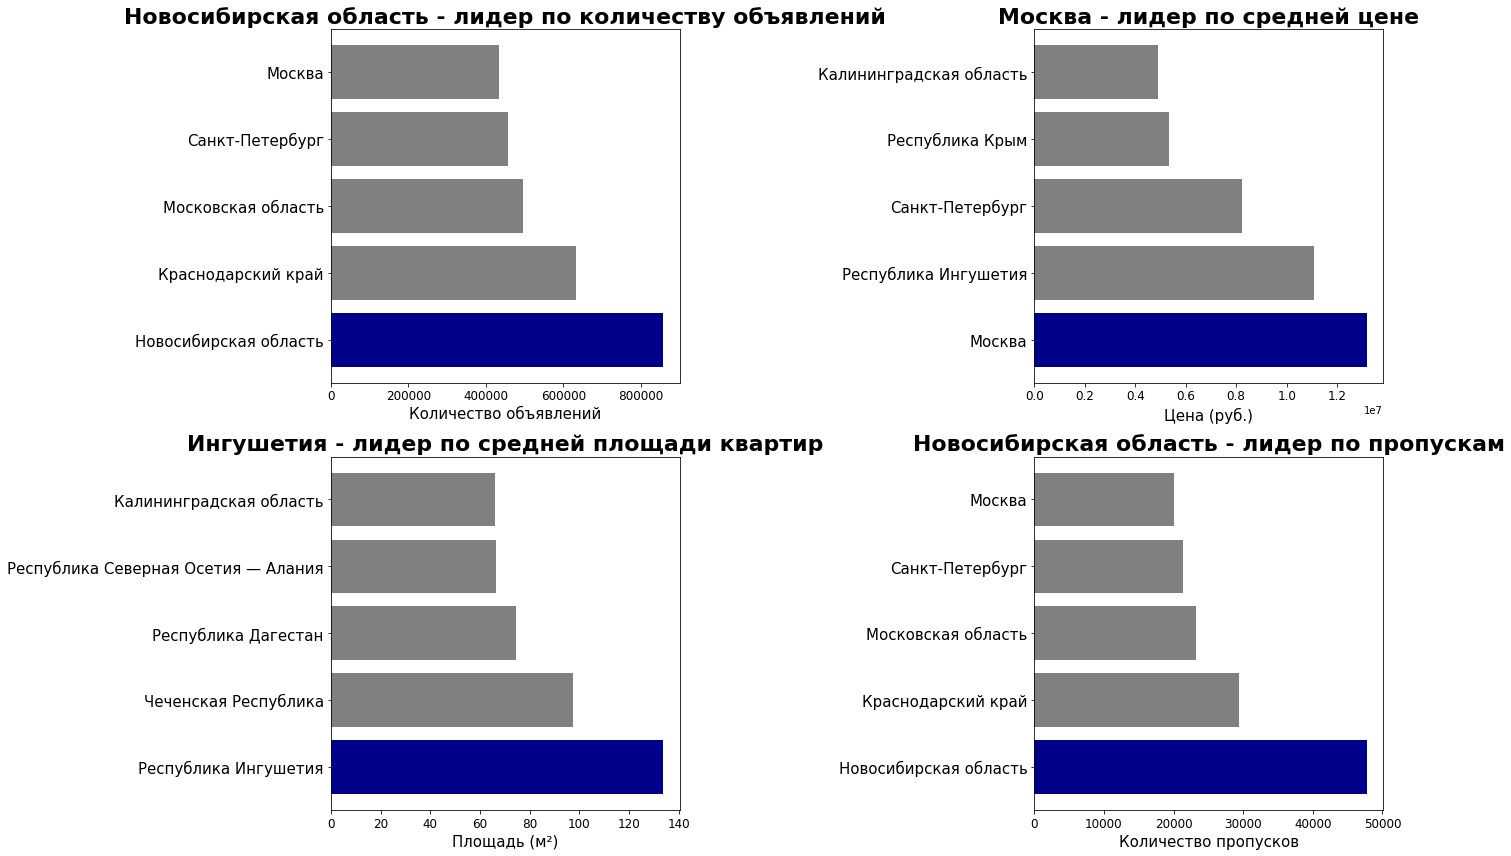

In [21]:
# подсчет необходимых группировок 
df['kitchen_area_missing'] = df['kitchen_area'].isnull().astype(int)

top_count = df['reg_name'].value_counts().head(5)
top_price = df.groupby('reg_name')['price'].mean().sort_values(ascending=False).head(5)
top_area = df.groupby('reg_name')['area'].mean().sort_values(ascending=False).head(5)
top_missing = df.groupby('reg_name')['kitchen_area_missing'].sum().sort_values(ascending=False).head(5)

def barh_plot_with_highlighted_max(x, y, title, xlabel, subplot_position):
    plt.subplot(2, 2, subplot_position)
    # максимальное значение
    max_value_index = np.argmax(y)

    colors = ['grey'] * len(y)  
    colors[max_value_index] = 'darkblue'
    plt.barh(x, y, color=colors)
    plt.title(title, fontsize=22, fontweight='bold') 
    plt.xlabel(xlabel, fontsize=15) 
    plt.tick_params(axis='y', labelsize=15)
    plt.tick_params(axis='x', labelsize=12)
    

plt.figure(figsize=(20, 12))

barh_plot_with_highlighted_max(top_count.index, top_count.values, 
                               'Новосибирская область - лидер по количеству объявлений', 
                               'Количество объявлений', 1)

barh_plot_with_highlighted_max(top_price.index, top_price.values, 
                               'Москва - лидер по средней цене', 
                               'Цена (руб.)', 2)

barh_plot_with_highlighted_max(top_area.index, top_area.values, 
                               'Ингушетия - лидер по средней площади квартир', 
                               'Площадь (м²)', 3)

barh_plot_with_highlighted_max(top_missing.index, top_missing.values, 
                               'Новосибирская область - лидер по пропускам', 
                               'Количество пропусков', 4)

plt.tight_layout()
plt.show()

In [22]:
print(f"Топ 5 регионов по количеству объявлений: {top_count.iloc[0]}")
print(f"Топ 5 регионов по средней цене: {top_price.iloc[0]}")
print(f"Топ 5 регионов по средней площади: {top_area.iloc[0]}")
print(f"Топ 5 регионов по количеству пропусков в kitchen_area: {top_missing.iloc[0]}")

Топ 5 регионов по количеству объявлений: 857503
Топ 5 регионов по средней цене: 13168384.858919278
Топ 5 регионов по средней площади: 133.741621253406
Топ 5 регионов по количеству пропусков в kitchen_area: 47733


**Что можно сказать по данным по регионам:**

* Больше всего объявлений размещено в **Новосибирской области**: 857 503 штук.
* Самая высокая средняя цена за квартиру в **Москве** (естественно): 13 168 385 рублей. 
* Самая большая средняя площадь квартир, размещенных на продажу в **Ингушетии**: 134 кв. метра.
* Больше всего пропусков по полю с площадью кухни в **Новосибирской области**: 47 733 пропусков.

Мы объеднили данные из двух датасетов и создали столбец с названием регионов. Для Крыма было принято решение сохранить оба кода. Также были сделаны некоторые выводы по распределению данных между регионами. 

[Вернуться к навигации](#2)

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="5"></a> 
    <h1 style="color: darkblue;">Работа с экстремальными значениями</h1>
</div> <a class="anchor" id="5"></a> 

На этапе первичного анализа уже были замечены некоторые странные значения: отрицательные цены, экстремально маленькие площади и так далее. Для себя я составила следующий план по обработке аномальных значений: 

`1.` Проверка некорректно заданных значений по столбцам с количеством комнат, этажами и т.д. 

`2.` Построение boxplot для цен и площадей.

`3.` Отрицательные цены. 

`4.` Нулевые цены.

`5.` Экстремальные большие цены.

`6.` Экстремальные маленькие цены.

`7.` Выбросы в площадях (общая площадь квартиры).

`8.` Выбросы в площадях (площадь кухни).

### Проверка некорректно заданных значений по столбцам

Проверим уникальные значения по столбцам на предмет соответствия их описанию поля и адекватность.

In [26]:
columns_to_analyze = ['building_type', 'level', 'levels', 'rooms', 'object_type']

for column in columns_to_analyze:
    print(f"Анализ столбца: {column}")
    print("-" * 30)
    print(df[column].value_counts())  
    print("\n") 

Анализ столбца: building_type
------------------------------
3    1862666
1    1776641
2    1116626
0     297751
4     171481
5      16186
Name: building_type, dtype: int64


Анализ столбца: level
------------------------------
2     683984
1     632862
3     591696
5     551781
4     545670
6     310940
8     288673
7     287350
9     281519
10    211806
12    119021
11    118953
14     95360
13     95324
15     87050
16     78765
17     60511
18     39553
19     32634
20     26290
21     23017
22     21010
23     17593
24     15077
25     11400
26      3160
27      2097
28      1611
29      1493
30      1406
31      1157
32      1100
33       769
34       261
36       149
35       136
37       105
38        40
39        28
Name: level, dtype: int64


Анализ столбца: levels
------------------------------
5     989512
10    781106
9     722717
17    344499
16    304112
25    211334
12    165177
3     162515
4     159663
18    143921
14    141797
19    117515
2     116110
6     107447
2

Можно заметить, что у 343 квартир количество комнат указано как "-2". В описании поля у нас нет такого значения, значит это, скорее всего, ошибка. Попробуем посмотреть на такие значения в разрезе других параметров наблюдения. Если они все принадлежат, например, одному региону или одному типу дома, тогда это значение возможно действительно имеет смысл и нам нужно будет его как-то учитывать. Если я не найду никаких закономерностей, тогда квартиры с таким значением числа комнат будут исключены из анализа. 

In [29]:
columns_to_analyze = ['building_type', 'level', 'levels', 'rooms', 'object_type']

for column in columns_to_analyze:
    print(f"Анализ столбца: {column}")
    print("-" * 30)
    print(df[df['rooms'] == -2][column].value_counts())  
    print("\n") 

Анализ столбца: building_type
------------------------------
3    240
2     64
1     23
4     13
5      3
Name: building_type, dtype: int64


Анализ столбца: level
------------------------------
3     67
2     51
1     48
4     40
5     39
7     21
6     11
12     8
9      7
17     6
14     5
19     5
15     4
24     4
10     4
8      4
18     4
21     3
22     3
16     2
13     2
11     2
25     2
23     1
Name: level, dtype: int64


Анализ столбца: levels
------------------------------
5     91
4     34
3     30
6     27
7     24
9     22
2     18
17    15
10    12
12    11
19     8
18     7
15     7
24     7
22     4
14     4
25     4
23     4
1      3
11     3
16     3
8      2
20     2
30     1
Name: levels, dtype: int64


Анализ столбца: rooms
------------------------------
-2    343
Name: rooms, dtype: int64


Анализ столбца: object_type
------------------------------
1    305
2     38
Name: object_type, dtype: int64




In [30]:
df[df['rooms'] == -2]['reg_name'].nunique()

33

In [31]:
# общее количество записей по регионам
total_rooms_count = df.groupby('reg_name')['rooms'].count()

# для значений -2
negative_two_counts = df[df['rooms'] == -2].groupby('reg_name')['rooms'].count()

# в долях
room_percentage_negative_two = negative_two_counts / total_rooms_count

top_regions_negative_two = room_percentage_negative_two.sort_values(ascending=False)
top_regions_negative_two.head(3)

reg_name
Смоленская область      0.000624
Чеченская Республика    0.000407
Республика Крым         0.000291
Name: rooms, dtype: float64

Значения "-2" встречаются в 33 разных регионах и не занимают весомую часть датасета: наибольшая их доля наблюдается в Смоленской области (всего лишь 0.0006). Если это ошибка в знаке, то можно посмотреть, насколько параметры квартир с количеством комнат "-2" отличаются от квартир с двумя комнатами. Давайте этим и займемся!   

In [32]:
df_minus_2 = df[df['rooms'] == -2]
df_2 = df[df['rooms'] == 2]

In [33]:
df_minus_2[['price', 'area', 'kitchen_area']].describe().style.format({'число': '{:.2f}'})

,price,area,kitchen_area
count,343.000000,343.000000,337.000000
mean,42322024.749271,160.996210,23.578635
std,72570678.026278,194.428375,17.247830
min,440000.000000,9.000000,2.000000
25%,6050000.000000,9.000000,11.500000
50%,21500000.000000,41.300000,20.000000
75%,46000000.000000,280.000000,30.000000
max,871290000.000000,1000.000000,100.000000


In [34]:
df_2[['price', 'area', 'kitchen_area']].describe().style.format({'число': '{:.2f}'})

,price,area,kitchen_area
count,1777755.000000,1777755.000000,1693023.000000
mean,4508400.034928,55.396882,10.776896
std,15144289.128930,27.705244,11.514238
min,-2114967296.000000,0.070000,0.010000
25%,2300000.000000,46.000000,7.000000
50%,3310000.000000,54.000000,9.600000
75%,5290000.000000,62.000000,12.610000
max,2147483647.000000,7625.000000,8235.000000


* У квартир с количеством комнат "-2" среднее значение цены сильно отличается от средней цены квартир с двумя комнатами: 42 322 024 рублей против 4 508 400.
* Медианные цены тоже сильно отличаются: для квартир со значением комнат "-2": 21 500 000 рублей, а для квартир с двумя комнатами: 3 310 000 рублей.
* 25% распределения цены для квартир с "-2" комнатами (6 050 000 руб.) выше 75% распределения цен для квартир с двумя комнатами (5 290 000 руб.). 
* Статистики по площадям также различаются: средняя площадь 161 кв. метров против 55. 

Сначала я склонялась к тому, что это ошибка в знаке, но теперь я думаю, что это либо значение ("-2"), которое отсутствует в описании полей, либо некорректные объявления. В любом случае, я приняла решение удалить значения с количеством комнат "-2", потому что другие параметры таких квартир выглядят нетипично для выборки квартир с двумя (положительными) комнатами. 

In [35]:
df = df[df['rooms'] != -2]
df.shape[0]

5241008

**Теперь посмотрим на столбцы с этажами. Важно, чтобы этаж квартиры не превышал этажность здания в целом. Посмотрим, в скольких регионах случилась такая аномалия.**

In [37]:
df[df['levels'] < df['level']].shape[0]

665

Обнаружили 665 таких строчек. Я подозреваю, что здесь просто перепутаны местами 2 столбца. Я посмотрела на данные аналогичным прошлому пункту образом и склоняюсь к тому, что это случайная ошибка. Для этих строчек я просто поменяю значения между столбцами.

In [39]:
rows_levels = df['levels'] < df['level']

df.loc[rows_levels, ['level', 'levels']] = df.loc[rows_levels, ['levels', 'level']].values

**Теперь посмотрим, в скольких регионах площадь кухни превышает общую площадь квартиры. Такого тоже не может быть, и мы либо удалим эти строки, либо, по аналогии с этажами и этажностью, поменяем столбцы местами.**

In [40]:
df[df['area'] < df['kitchen_area']].shape[0]

2859

Достаточно много квартир обладает такой "особенностью". Я не нашла никаких закономерностей, кроме того, что большая часть строчек происходит из Краснодарского края и Новосибирской областью. Остальные параметры квартир тоже не выглядят подозрительно:

* Больше всего квартир с такой аномалией обладает 2 комнатами, однако и в целом по датасету у нас больше всего двухкомнатных квартир;
* Чаще всего такие квартиры продаются на первичном рынке, как и большинство квартир в наших данных;
* Площадь и цена таких квартир в целом выглядят типично для наших данных. 

Поэтому я буду считать, что по данными строкам, так же как и в предыдущем случае, перепутаны столбцы. Поменяем их местами. 

In [41]:
rows_area = df['area'] < df['kitchen_area']

df.loc[rows_area, ['area', 'kitchen_area']] = df.loc[rows_area, ['kitchen_area', 'area']].values

### Построим boxplot по необходимым столбцам 

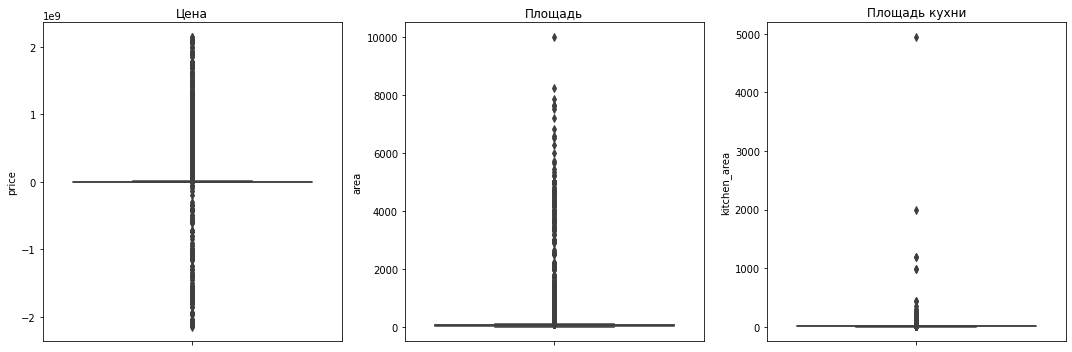

In [42]:
plt.figure(figsize=(15, 5)) 

plt.subplot(1, 3, 1) 
sns.boxplot(y=df['price'])
plt.title('Цена')

plt.subplot(1, 3, 2)  
sns.boxplot(y=df['area'])
plt.title('Площадь')

plt.subplot(1, 3, 3) 
sns.boxplot(y=df['kitchen_area'])
plt.title('Площадь кухни')

plt.tight_layout()
plt.show()

Значений настолько много, что по таким боксплотам сложно сделать какие-либо выводы сразу. Начнем с анализа цен. 

### Отрицательные цены 

Воспользуемся графиком, который я уже ранее строила и немного дополним его визуализацией отрицательных значений. 

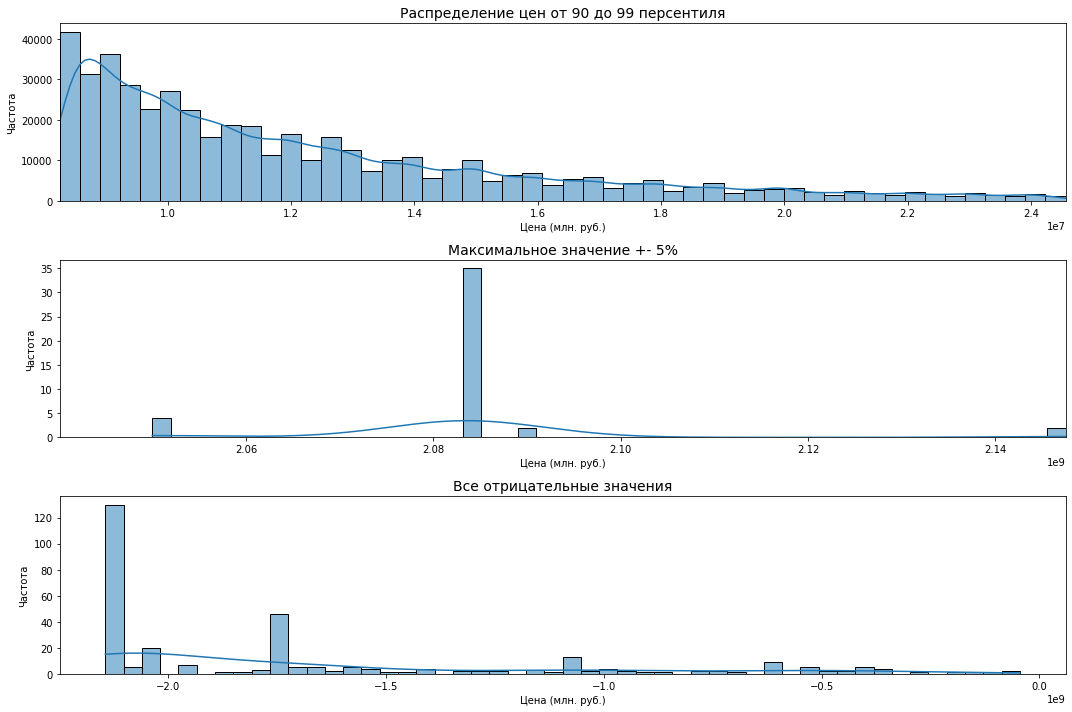

In [43]:
# расчет перцентилей (с учётом только положительных значений)
positive_prices = df[df['price'] > 0]['price']
p90 = np.percentile(positive_prices, 90)
p99 = np.percentile(positive_prices, 99)
max_price = positive_prices.max()

plt.figure(figsize=(15, 10))


# График 1: значения от 90 до 99 персентиля
plt.subplot(3, 1, 1)
sns.histplot(df[(df['price'] > p90) & (df['price'] <= p99)]['price'], bins=50, kde=True)
plt.title('Распределение цен от 90 до 99 персентиля', fontsize=14)
plt.xlabel('Цена (млн. руб.)', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.xlim(p90, p99)

# График 2: диапазон рядом с максимальным значением
lower_bound = max_price * 0.95
upper_bound = max_price
plt.subplot(3, 1, 2)
sns.histplot(df[(df['price'] > lower_bound) & (df['price'] <= upper_bound)]['price'], bins=50, kde=True)
plt.title('Максимальное значение +- 5%', fontsize=14)
plt.xlabel('Цена (млн. руб.)', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.xlim(lower_bound, upper_bound)

# График 3: Все отрицательные значения
plt.subplot(3, 1, 3)
sns.histplot(df[df['price'] < 0]['price'], bins=50, kde=True)
plt.title('Все отрицательные значения', fontsize=14)
plt.xlabel('Цена (млн. руб.)', fontsize=10)
plt.ylabel('Частота', fontsize=10)


plt.tight_layout()
plt.show()

In [44]:
negative_prices = df[df['price'] < 0]['price']

max_negative = negative_prices.max()
min_price = df['price'].min()

print(f'Максимальное отрицательное значение: {max_negative}')
print(f'Минимальное значение: {min_price}')

Максимальное отрицательное значение: -44967296
Минимальное значение: -2144967296


Все отрицательные цены являются достаточно крупными. Самое большое среди отрицательных значений: -44 967 296 рублей, а самое маленькое: -2 144 967 296. Посмотрим на самые часто встречающиеся отрицательные цены. 

In [45]:
negative_counts = df[df['price'] < 0].groupby('price')['reg_name'].size().sort_values(ascending=False)
negative_counts.head(10) 

price
-2114150296    127
-1760657296     39
-2053850296     10
-594967296       8
-1089934592      7
-2040742296      6
-1054967296      6
-1944967296      6
-394967296       5
-1744967296      4
Name: reg_name, dtype: int64

Подозрительно, что такие числа практически всегда "некрасивые": не круглые, а... достаточно рандомные. Выведем на экран из каких регионов пришли такие значения.

In [46]:
df[df['price'] < 0].groupby('reg_name')['price'].count()

reg_name
Архангельская область                    1
Воронежская область                      2
Иркутская область                        1
Калининградская область                  2
Карачаево-Черкесская Республика          1
Краснодарский край                      10
Ленинградская область                    1
Москва                                   2
Московская область                       2
Нижегородская область                   10
Новосибирская область                  222
Пермский край                            2
Республика Бурятия                       1
Республика Дагестан                      1
Республика Северная Осетия — Алания      1
Республика Татарстан                     8
Республика Хакасия                       6
Самарская область                        1
Санкт-Петербург                         23
Тюменская область                        5
Ханты-Мансийский автономный округ        1
Ярославская область                      8
Name: price, dtype: int64

Большая часть отрицательных цен пришла из Новосибирской области: 222 объявления. Из остальных регионов пришло намного меньше: 23 из Санкт-Петербура, 10 из Краснодарского края и Нижегородской области и штучные объявления из других регионов. Подробнее посмотрим на Новосибирскую область и начнем с уникальных отрицательных цен.

In [47]:
df[(df['price'] < 0) & (df['reg_name'] == 'Новосибирская область')]['price'].value_counts().head()

-2114150296    127
-1760657296     39
-2053850296     10
-2040742296      6
-1944967296      6
Name: price, dtype: int64

In [48]:
df[df['price'] == -2114150296]['reg_name'].value_counts()

Новосибирская область    127
Name: reg_name, dtype: int64

In [49]:
df[df['price'] == -2114150296]['levels'].value_counts()

10    127
Name: levels, dtype: int64

In [50]:
df[df['price'] == -2114150296]['area'].value_counts()

87.39    126
87.00      1
Name: area, dtype: int64

In [51]:
df[df['price'] == -2114150296]['level'].value_counts()

8    126
2      1
Name: level, dtype: int64

In [52]:
df[df['price'] == -2114150296]['date'].min()

Timestamp('2018-11-09 00:00:00')

In [53]:
df[df['price'] == -2114150296]['date'].max()

Timestamp('2019-07-01 00:00:00')

Отрицательные значения, равные -2 114 150 296 рублей, встречаются только в Новосибирске, они все в 10-ти этажном здании, площадь кватир +- 87 метров, 126 объявлений о квартире на 8 этаже, 1 - на 2 этаже. Строки отличаются только датами: продавец пытался продать свою квартиру с ноября 2018 по июль 2019. Я делаю вывод, что это все-таки объявления о продаже одной и той же квартиры по одной и той же цене. Попробуем рассмотреть следующую самую часто встречающуюся отрицательную цену из нашего набора данных. 

In [54]:
df[df['price'] == -1760657296].head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
1274290,-1760657296,2019-03-14,9654,1,7,10,3,87.39,12.98,2,9654,Новосибирская область,0
1281200,-1760657296,2019-03-15,9654,1,7,10,3,87.39,12.98,2,9654,Новосибирская область,0
1288413,-1760657296,2019-03-16,9654,1,7,10,3,87.39,12.98,2,9654,Новосибирская область,0
1295366,-1760657296,2019-03-18,9654,1,7,10,3,87.39,12.98,2,9654,Новосибирская область,0
1301811,-1760657296,2019-03-19,9654,1,7,10,3,87.39,12.98,2,9654,Новосибирская область,0


Все параметры подозрительно напоминают параметры прошлой квартиры, но отличается этаж - здесь квартира располагается на седьмом. Мне кажется, что в случае Новосибирской области такие отрицательные цены не являются ошибкой в знаке, может быть, такие объявления внесены в данные специально. Цены на квартиры свыше 2 миллиардов являются крайне высокими, и очень сомнительно, что в Новосибирске их продается такое большое количество. Сравним, насколько больше объявлений из Новосибирской области с отрицательными значениями, чем из других регионов России. 

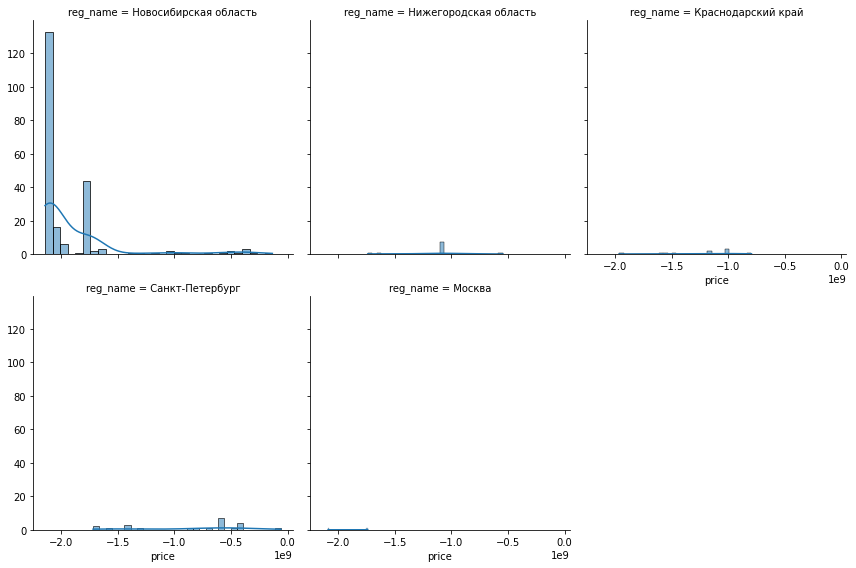

In [55]:
negative_df = df[df['price'] < 0]

# изначально я строила график для всех регионов, но оставила регионы, в которых есть хотя бы какие-то значения

regions_to_keep = ['Новосибирская область', 'Москва', 'Нижегородская область', 'Санкт-Петербург', 'Краснодарский край'] 
negative_df = negative_df[negative_df['reg_name'].isin(regions_to_keep)]

plot = sns.FacetGrid(negative_df, col='reg_name', col_wrap=3, height=4)
plot.map(sns.histplot, 'price', kde=True, bins=30)

plt.show()

Сравнивая регионы, в которых были замечены отрицательные цены, можно сказать, что Новосибирская область заметно отличается от всех остальных, причем именно у этого региона выражены крупные отрицательные значения: свыше полутора миллиардов рублей за квартиру. Для этого региона отрицательные цены я буду считать выбросами. Что делать с остальными?

In [56]:
df[(df['price'] < 0) & (df['reg_name'] == 'Санкт-Петербург')]['price'].value_counts().head()

-594967296     7
-394967296     4
-1670934592    1
-1590934592    1
-714967296     1
Name: price, dtype: int64

Снова наблюдаются странные значения цен, но не будем рубить с плеча и попробуем разобраться в проблеме. Рассмотрим, например, -594 967 296 рублей.

In [57]:
df[df['price'] == -594967296].head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
617946,-594967296,2018-12-04,9654,3,4,6,3,93.60,10.80,1,9654,Новосибирская область,0
2873609,-594967296,2019-12-25,2661,0,11,20,1,36.92,10.18,1,2661,Санкт-Петербург,0
3046849,-594967296,2020-02-09,2661,0,11,20,1,36.92,10.18,1,2661,Санкт-Петербург,0
3268119,-594967296,2020-03-26,2661,0,11,20,1,36.92,10.18,1,2661,Санкт-Петербург,0
3505235,-594967296,2020-05-11,2661,0,11,20,1,36.92,10.18,1,2661,Санкт-Петербург,0


Мое предположение - это объявления об одной и той же квартире (совпадают этаж, тип здания, этажность, количество комнат и площадь). Вероятнее всего данные значения тоже являются выбросами: мне очень сложно представить, чтобы однокомнатная квартира площадью 36 квадратных метров стоила, я прошу прощения, -594 967 296 рублей. Не может быть, что на рынке недвижимости все настолько плохо.

In [58]:
df[(df['price'] < 0) & (df['reg_name'] == 'Нижегородская область')]['price'].value_counts().head()

-1089934592    7
-544967296     1
-1739934592    1
-1654967296    1
Name: price, dtype: int64

In [59]:
df[df['price'] == -1089934592].head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
4460580,-1089934592,2020-11-09,2871,3,10,14,3,92.0,14.0,1,2871,Нижегородская область,0
4669637,-1089934592,2020-12-26,2871,3,10,14,3,92.0,14.0,1,2871,Нижегородская область,0
4788914,-1089934592,2021-02-12,2871,3,10,14,3,92.0,14.0,1,2871,Нижегородская область,0
4862394,-1089934592,2021-03-01,2871,3,10,14,3,92.0,14.0,1,2871,Нижегородская область,0
5006143,-1089934592,2021-03-30,2871,3,10,14,3,92.0,14.0,1,2871,Нижегородская область,0


Аналогично: странная + аномально высокая цена для трёшки в Нижегородской области. Не буду дальше рассматривать отрицательные цены, но обосную, почему я приняла решение удалить их из дальнейшего анализа: 

* Странные повторяющиеся цены за квартиры: я нечасто видела квартиры, у которых не было бы 0 или 9 на конце, а остальные разряды числа были бы настолько рандомными.
* Аномально высокие цены для представленных регионов. Новосибирская область не входит ни в один ТОП регионов с самой дорогой недвижимостью, но наш набор данных говорит об обратном: значит, где-то ошибка. Я склоняюсь к тому, что ошибка в нашем наборе данных. 
* Может быть, это действительно реальные объявления: на некоторых сервисах по купле/продаже жилья это сделать проще, чем на других, и вполне может быть, что такие квартиры действительно выставляются на продажу: во всяком случае, что на Авито, что на Циане можно найти квартиры хоть за 7 миллиардов и даже не в Москве. Но являются ли такие цены частью тренда ценообразования на квартиры? Я считаю, что так как наша главная цель - изучение рынка недвижимости в России за представленный промежуток времени, то такие выбивающиеся из большинства цены необходимо удалить из датасета. Может, это вообще были шуточные объявления, кто знает. 

In [60]:
df = df[df['price'] >= 0]
df.shape[0]

5240697

### Нулевые цены 

В процессе знакомства с данными были выявлены также и нулевые цены на квартиры. Посмотрим, в каких регионах России чаще всего встречаются такие "цены" и сколько в принципе у нас таких строчек.

In [61]:
df[df['price'] == 0]['reg_name'].value_counts()

Кабардино-Балкарская Республика    6
Республика Коми                    3
Московская область                 2
Республика Татарстан               2
Ростовская область                 1
Санкт-Петербург                    1
Алтайский край                     1
Тюменская область                  1
Республика Дагестан                1
Пермский край                      1
Ярославская область                1
Краснодарский край                 1
Амурская область                   1
Москва                             1
Name: reg_name, dtype: int64

Больше всего нулевых цен обнаружено в Кабардино-Балкарии, в остальных регионов это единичные случаи. Может быть при составлении источника данных, парсинге или на каком-то этапе работы с этими данными цены на эти квартиры были утеряны и автоматически заменены нулями. В любом случае, таких записей немного, они не имеют никакого экономического смысла и, как мне кажется, должны быть удалены.

In [62]:
df = df[df['price'] > 0]
df.shape[0]

5240674

### Положительные высокие цены на квартиры

Пришло время рассмотреть аномальные цены и принять решение: оставлять их в нашем наборе данных или нет. Так как у меня нет оснований считать, что мой источник - надежный, я оставляю за собой право его корректировать под свои цели. Я не буду использовать известные мне способы выявления выбросов (метод межквартильного размаха, z-оценку, изоляционный лес и так далее) и займусь анализом вручную. Я это обожаю. 

В данном пункте я хочу отдельно рассмотреть самые дорогие квартиры и посмотреть на параметры этих квартир, в первую очередь - площадь. Для определенных ценовых диапазонов я буду оценивать площадь квартир и если будут найдены аномально дорогие квартиры с очень маленькой площадью, то такие строки я буду удалять. Также я буду искать похожие квартиры на рынке того или иного региона и постараюсь удалять только самые странные значения. 

Очень дорогие квартиры с очень маленькой площадью, для которых я не найду хотя бы приблизительно похожих аналогов на рынке, я буду считать выбросами. В теории такая наценка может быть из-за расположения внутри региона (города): ближе к центру или ближе к окраине, однако у нас нет таких данных в датасете. Начнем с самых высоких цен. 

In [63]:
df['price'].max()

2147483647

Вообще, число 2 147 483 647 является наибольшим 32-битным целым числом. Это, конечно, не говорит нам о том, что это значение 100% является выбросом, однако его наличие может свидетельствовать о проблеме. У нас всего 2 строки с такой ценой и обе я сразу же удалю.

In [64]:
df = df[df['price'] != 2147483647]
df.shape[0]

5240672

Пройдемся по остальным высоким ценам. Попробуем рассмотреть промежуток с экстремально высокими ценами (свыше 99.99 персентиля распределения).

In [65]:
p99_99 = np.percentile(df['price'], 99.99)
p99_99

549731599.9977291

In [66]:
extra_counts = df[df['price'] >= p99_99].groupby('price').size().sort_values(ascending=False)
extra_counts.head() 

price
1108140000    93
1287660000    40
2083290000    35
1003425000    23
957400000     23
dtype: int64

Пройдемся для каждой из квартир с указанной ценой. В отличие от отрицательных цен, здесь они круглые.

In [76]:
df[df['price'] == 1108140000]['reg_name'].value_counts()

Новосибирская область    93
Name: reg_name, dtype: int64

In [77]:
df[df['price'] == 1287660000]['reg_name'].value_counts()

Новосибирская область    40
Name: reg_name, dtype: int64

In [78]:
df[df['price'] == 2083290000]['reg_name'].value_counts()

Новосибирская область    35
Name: reg_name, dtype: int64

Самые часто встречаемые экстремальные цены снова пришли к нам из Новосибирской области. Это лишь убеждает меня в том, что в данном регионе произошла какая-то ошибка, банальный подгон статистики или, например, данные по регионам собирались из различных источников и именно по Новосибисркой области попался не самый надежный. Я посмотрела на цены на жилье в НСК области и не нашла большого количества квартир с ценами свыше миллиарда: штучно встречались объявления (причем сомнительные), но не в таком массовом порядке. Чаще всего люксовые квартиры в Новосибирской области не превышают несколько сотен миллионов.

Вот на этом моменте мне стало очень интересно посмотреть, насколько экстремальные цены по всему нашему датасету состоят из цен из Новосибирской области. Сейчас будет жуткий график: боксплоты для распределения цен по каждому из регионов.

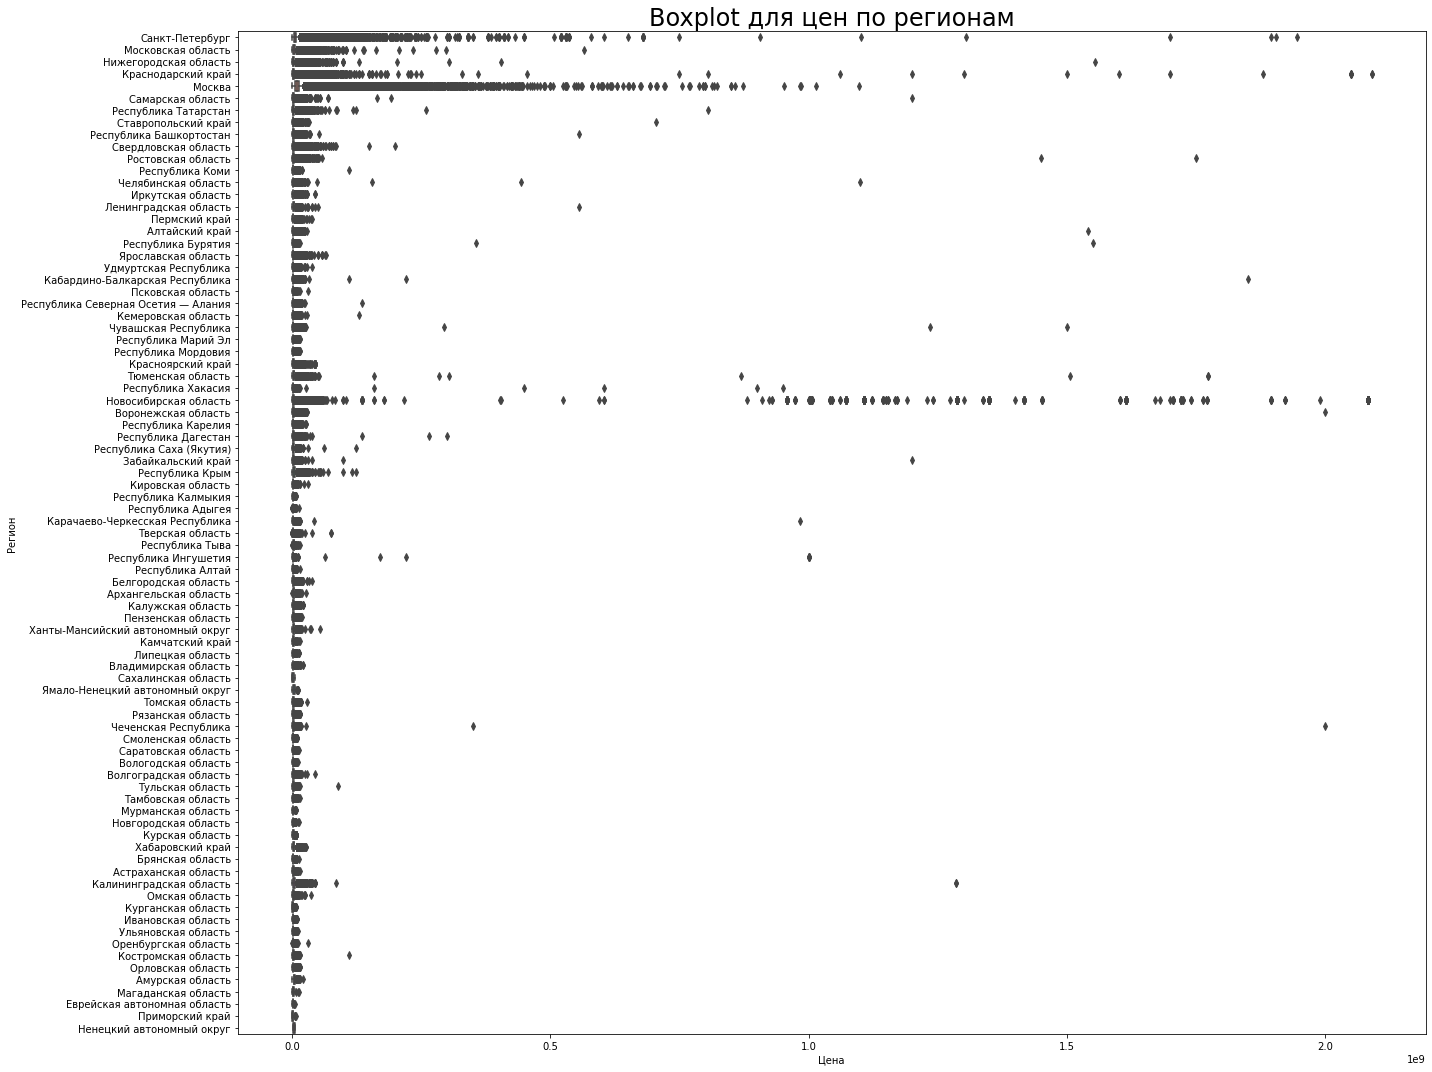

In [79]:
plt.figure(figsize=(20, 15)) 

sns.boxplot(y='reg_name', x='price', data=df) 
plt.ylabel('Регион')
plt.xlabel('Цена')
plt.title('Boxplot для цен по регионам', fontsize=24)
plt.tight_layout()
plt.show()

График действительно впечатляющий: На его основании я приняла решение, что по всем регионам я удалю выбросы по единому шаблону, а для Москвы, Санкт-Петербурга и Новосибирска рассмотрю ситуацию отдельно. 

Что касается Санкт-Петербурга и Москвы: для этих регионов я верю в цены в 1 и 2 миллиарда рублей, так как видела не только объявления о продаже таких квартир, но и новости о приобретении таких квартир. Тем более что в наших данных такие цены встречаются не так часто, как у Новосибирской области, и это похоже на правду.

Для большинства регионов серия выбросов "короткая" и далее следуют единичные выбросы от нескольких сотен миллионов до двух миллиардов. В глаза бросаются три региона: Санкт-Петербург, Москва и Новосибирская область, причем когда для Москвы и Санкт-Петербурга экстремальные значения идут на спад (примерно на рубеже 1 миллиарда рублей), у Новосибирска такие цены только появляются. На мой взгляд, это очень странно: если уж в Новосибирской области продаются квартиры за миллиарды, то должны продаваться и за сотни миллионов.

Для начала рассмотрим самые экстремальные значения по всему датасету, так как у меня есть подозрение, что на этом промежутки проблемы не только у Новосибирской области, но и вообще у всех регионов.

In [80]:
# поднимем персентиль еще выше

p99_995 = np.percentile(df['price'], 99.995)
p99_995

1108140000.0

In [81]:
# отфильтруем датасет и оставим значения свыше 1 108 140 000 рублей; исключим Новосибирскую область

df_extra = df[(df['price'] >= p99_995) & (df['reg_name'] !='Новосибирская область')]
df_extra.shape[0]

34

Всего 34 объявление с ценой свыше 1 108 140 000 рублей. Теперь оценим площади для представленных строк, так как самые дорогие квартиры, которые я находила в интернете, всегда были большие, часто имели много комнат. В общем, будет странно, если мы обнаружим, что квартира за миллиард рублей будет площадью в 40 метров.

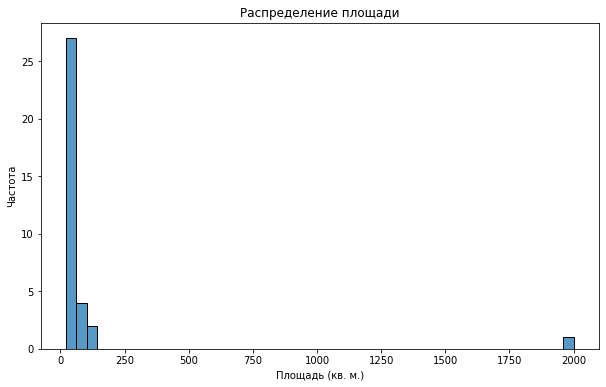

In [83]:
plt.figure(figsize=(10, 6))  
sns.histplot(df_extra['area'], bins=50)
plt.title('Распределение площади')
plt.xlabel('Площадь (кв. м.)')
plt.ylabel('Частота')
plt.show()

In [84]:
df_extra['reg_name'].value_counts()

Краснодарский край                 12
Санкт-Петербург                     5
Тюменская область                   3
Чувашская Республика                2
Ростовская область                  2
Калининградская область             2
Нижегородская область               1
Алтайский край                      1
Кабардино-Балкарская Республика     1
Республика Бурятия                  1
Воронежская область                 1
Самарская область                   1
Чеченская Республика                1
Забайкальский край                  1
Name: reg_name, dtype: int64

Среди дорогих квартир самые большие по площади расположены в Краснодарском крае. Интересно, что из Санкт-петербурга в список вошло только 5 квартир, а из Москвы вообще ни одной. 

In [85]:
df_extra['area'].value_counts()

49.30      4
112.71     2
58.00      2
33.00      2
28.00      2
23.00      2
31.00      2
95.86      2
53.00      1
55.00      1
35.50      1
36.00      1
63.80      1
59.00      1
28.60      1
40.00      1
61.50      1
37.00      1
52.00      1
47.10      1
2000.00    1
48.00      1
79.00      1
56.00      1
Name: area, dtype: int64

In [86]:
df_extra[df_extra['area'] == df_extra['area'].max()]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
3846102,2000000300,2020-07-12,2885,4,1,9,3,2000.0,2.0,1,2885,Чеченская Республика,0


Площади квартир ну совсем маленькие. Я уверена, что квартиры не могут столько стоить и вместе с тем быть такими маленькими, поэтому отфильтруем общий датасет без этих 34-х записей. 

Что касается площади 2000 метров: я просмотрела много объявлений по большим квартирам и не нашла среди них квартиры с такой площадью из Чеченской республики, только похожую квартиру из Сочи. Поэтому без сожаления избавляюсь от этого промежутка значений.

In [87]:
df = df[df['price'] < p99_995]
df.shape[0]

5240331

**Теперь удалим выбросы по регионам, которые НЕ являются Санкт-Петербургом, Москвой или Новосибирской областью.**

In [89]:
regions = df['reg_name'].unique()
regions = [region for region in regions if region not in ['Санкт-Петербург', 'Москва', 'Новосибирская область']]

In [90]:
new_df = df[df['reg_name'].isin(regions)]
new_df.head(1)

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,81,Московская область,0


При построении боксплотов было заметно, что для большинства регионов серия выбросов заканчивается достаточно рано и дальше следуют лишь единичные экстремальные цены. Приблизим масштаб, чтобы рассмотреть ситуацию получше.

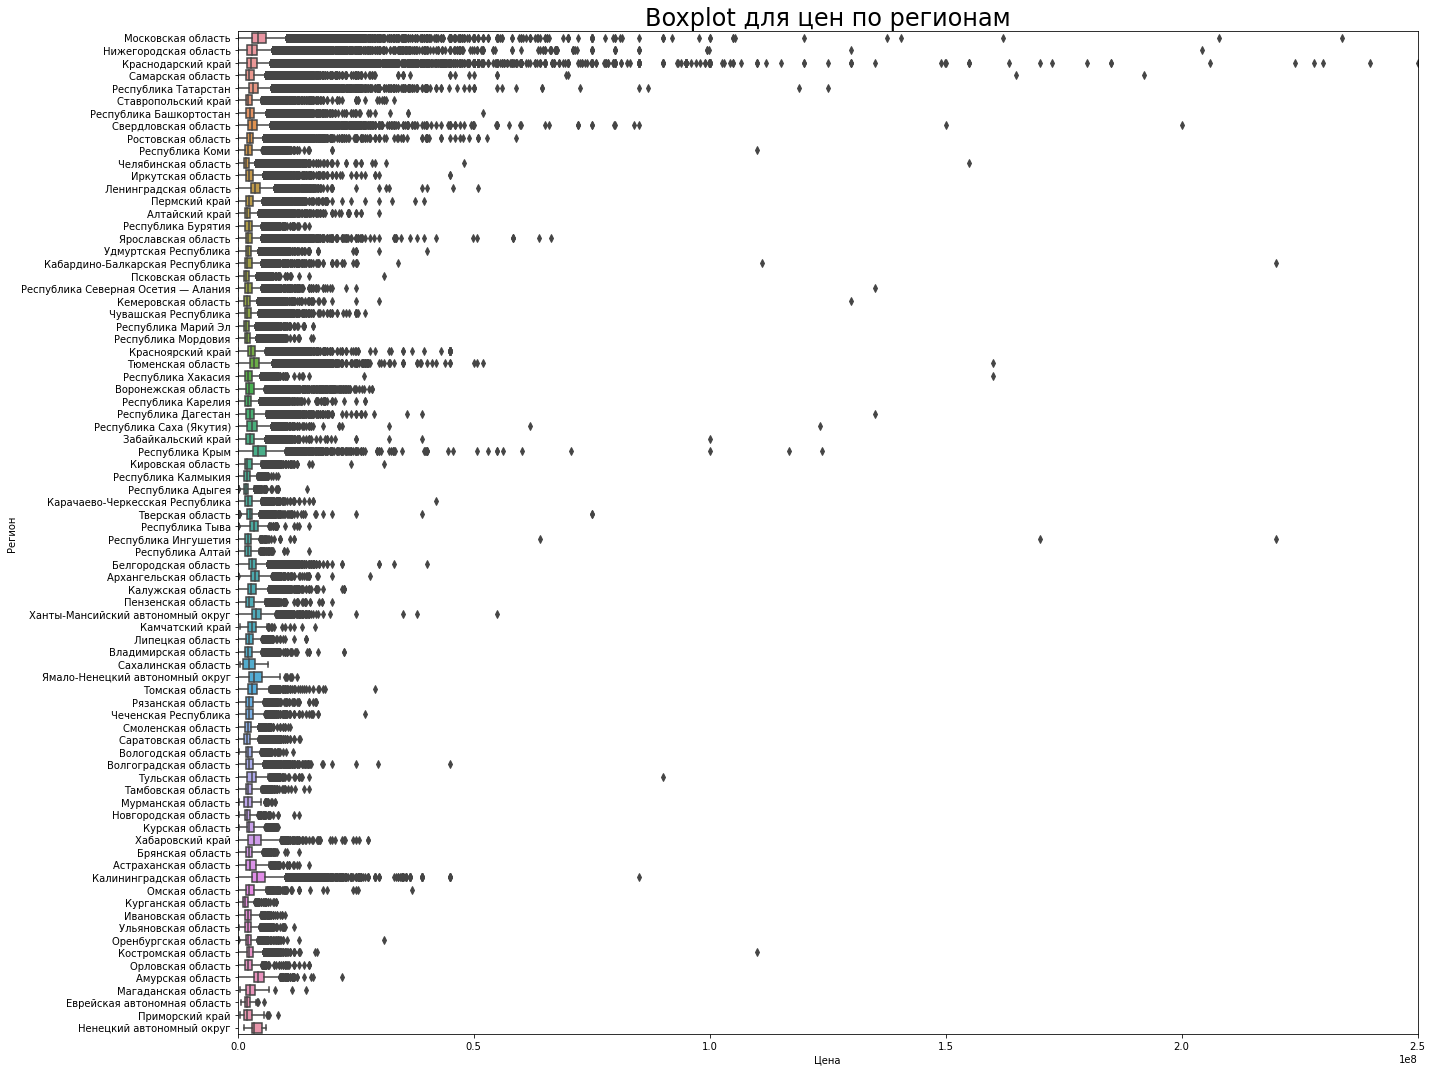

In [91]:
plt.figure(figsize=(20, 15)) 

sns.boxplot(y='reg_name', x='price', data=new_df) 
plt.ylabel('Регион')
plt.xlabel('Цена')
plt.xlim(0, 250000000)
plt.title('Boxplot для цен по регионам', fontsize=24)
plt.tight_layout()
plt.show()

По этому графику можно сказать, что у нас выделились еще регионы с большим количеством выбросов: это Московская, Нижегородская области и Краснодарский край. Краснодарский край и Московская область меня не удивили, а насчет Нижегородской области у меня не было представления о том, что в этом регионе дорогая недвижимость. 

Тем не менее, по боксплотам я вручную выделила бы границу, после которой я бы считала значения цен для рассматриваемых регионов безусловно выбросами: примерно 100 000 000 рублей. При такой границе сохранятся дорогие квартиры в Краснодарском крае, которые там, безусловно, есть, и единичные случаи дорогих цен по другим регионам. 

Таким образом, датасет для всех регионов, кроме Санкт-Петербурга, Москвы и Новосибирской области, фильтруем, оставляя цены ниже 95 000 000 рублей

In [92]:
p99 = np.percentile(new_df['price'], 99.996)
p99

95000000.0

In [93]:
new_df = new_df[new_df['price'] < p99]

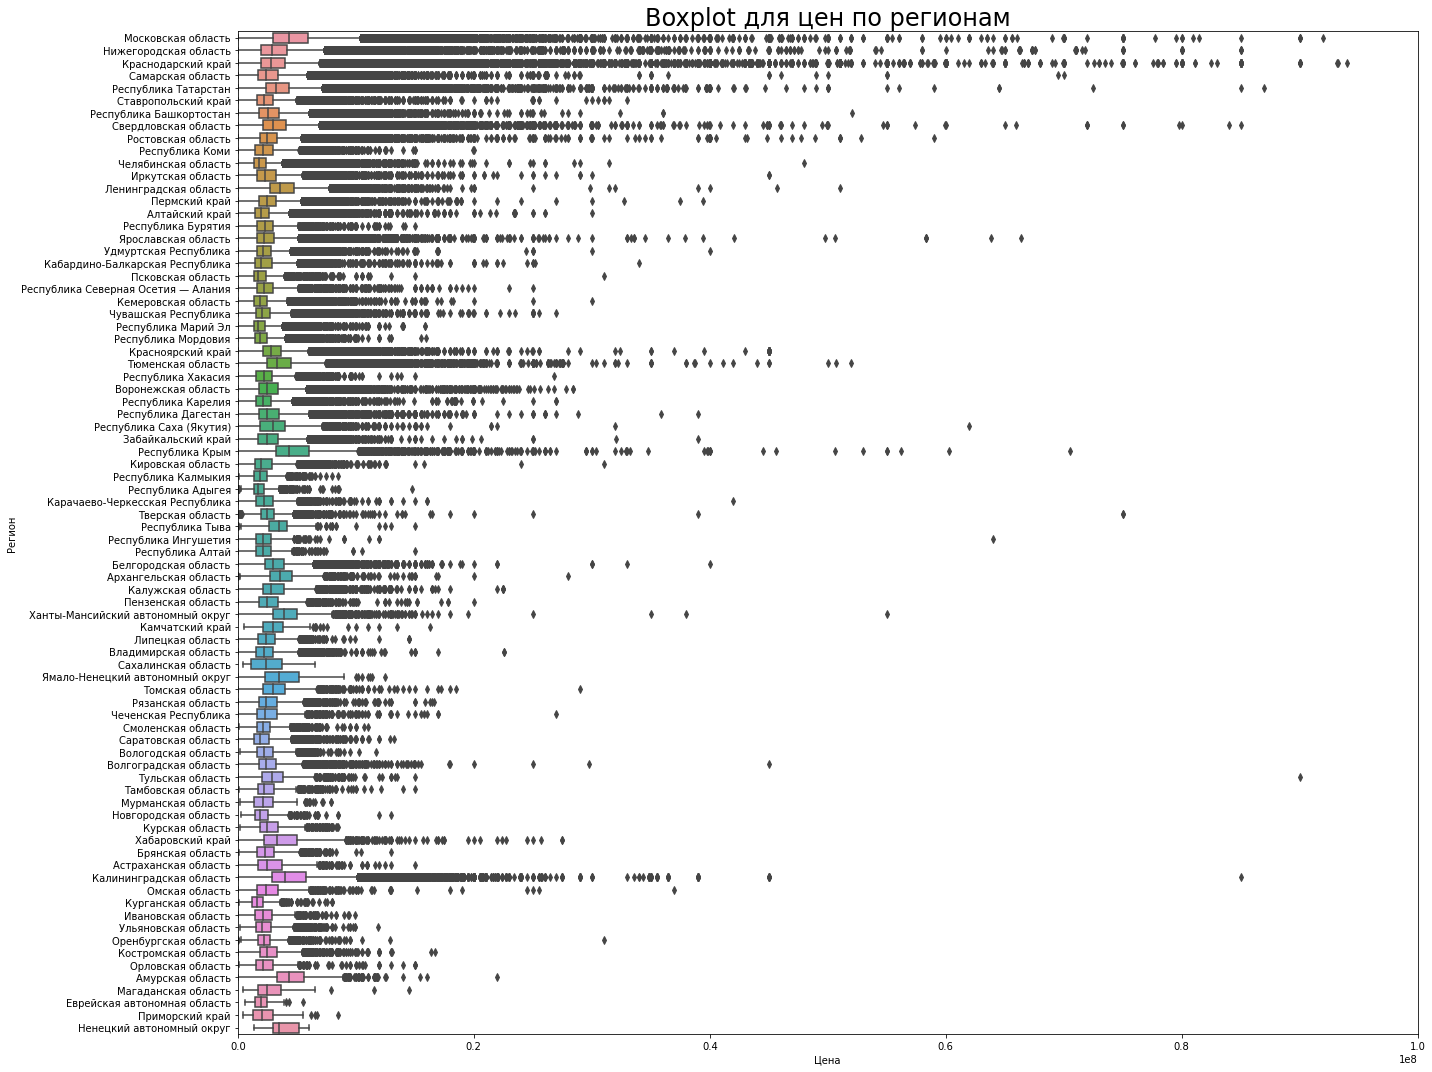

In [94]:
plt.figure(figsize=(20, 15)) 

sns.boxplot(y='reg_name', x='price', data=new_df) 
plt.ylabel('Регион')
plt.xlabel('Цена')
plt.xlim(0, 100000000)
plt.title('Boxplot для цен по регионам', fontsize=24)
plt.tight_layout()
plt.show()

Мы удалили для выбранных регионов цены свыше 95 миллионов. Оценим цены рядом с этой ценой и посмотрим на площади квартир: по аналогии с самыми экстремальными ценами по всему датасету удалим строки, если высокие цены у квартир с очень маленькой площадью. Маленькой площадью будем считать площадь меньше 30 квадратных метров.

In [96]:
new_df[(new_df['price'] > 30000000) & (new_df['area'] < 30)].head(1)

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
15714,64000000,2018-09-10,2843,2,3,7,1,25.0,NaN,1,2843,Краснодарский край,1


Таких квартир у нас немного и они все располагаются в Краснодарском крае, все являются однокомнатными (или студиями). В принципе я могу представить себе небольшие квартиры в Краснодарском крае с высокой ценой: все-таки курортный район. Однако из тех объявлений, которые я видела, квартиры были с площадью хотя бы 50+ квадратных метров. Поэтому квартиры с ценами от 30 миллионов до 95 миллионов и площадью ниже 30 квадратных метров я удаляю.

In [97]:
indexes_to_delete = [15714, 448035, 753182, 4059047, 4094088, 4094403, 4094483]
new_df = new_df.loc[~new_df.index.isin(indexes_to_delete)]

Теперь вернемся к Санкт-Петербургу, Москве и Новосибирской области.

In [98]:
regions = ['Санкт-Петербург', 'Москва', 'Новосибирская область']

top_df = df[df['reg_name'].isin(regions)]
top_df.head(1)

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2661,Санкт-Петербург,0


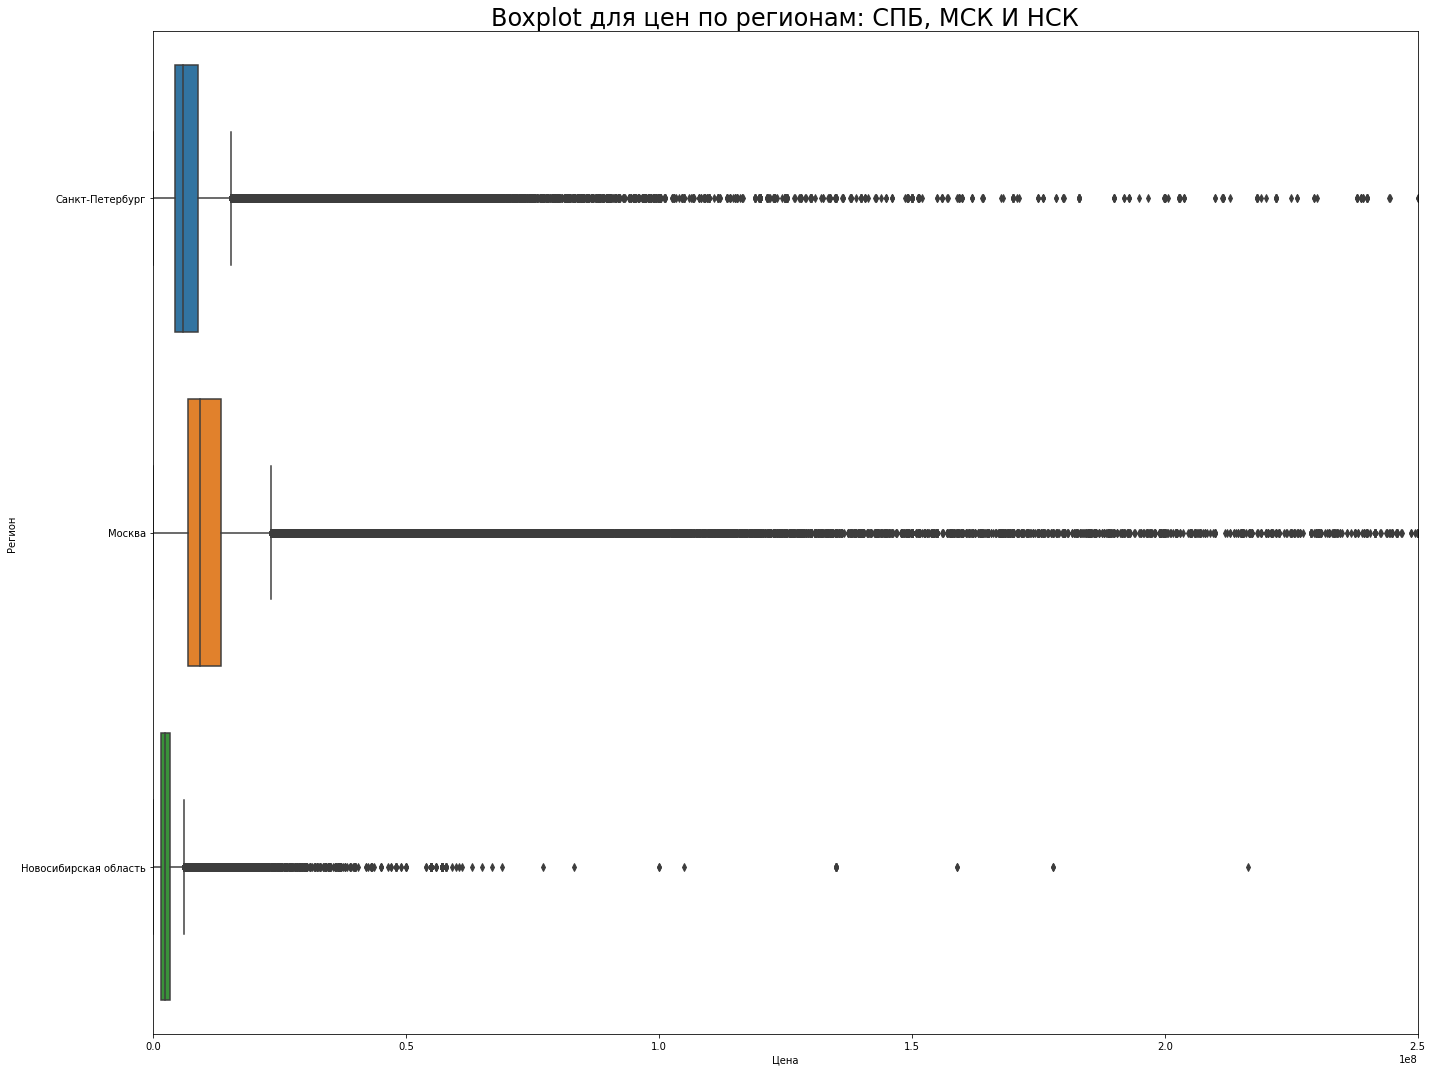

In [99]:
plt.figure(figsize=(20, 15)) 

sns.boxplot(y='reg_name', x='price', data=top_df) 
plt.ylabel('Регион')
plt.xlabel('Цена')
plt.xlim(0, 250000000)
plt.title('Boxplot для цен по регионам: СПБ, МСК И НСК', fontsize=24)
plt.tight_layout()
plt.show()

Стоит отметить, что после удаления экстремальных выбросов по всему датасету (свыше 1 108 140 000 рублей) боксплот для Новосибирской области заметно "оправился": мы удалили тот хвост внезапных выбросов в промежутке от 1 до 2 миллиардов рублей, который обозначили на общем боксплоте. Поэтому я бы удалила для Новосибирской области (по аналогии с другими регионами) значения свыше 95 миллионов рублей и дальше бы работала с Санкт-Петербургом и Москвой отдельно.

In [100]:
nsk_df = top_df[top_df['reg_name'] == 'Новосибирская область']
nsk_df = nsk_df[nsk_df['price'] < p99]

Продолжим работу с Санкт-Петербургом и Москвой.

In [102]:
top_df = top_df[(top_df['reg_name'] == 'Москва') | (top_df['reg_name'] == 'Санкт-Петербург')]

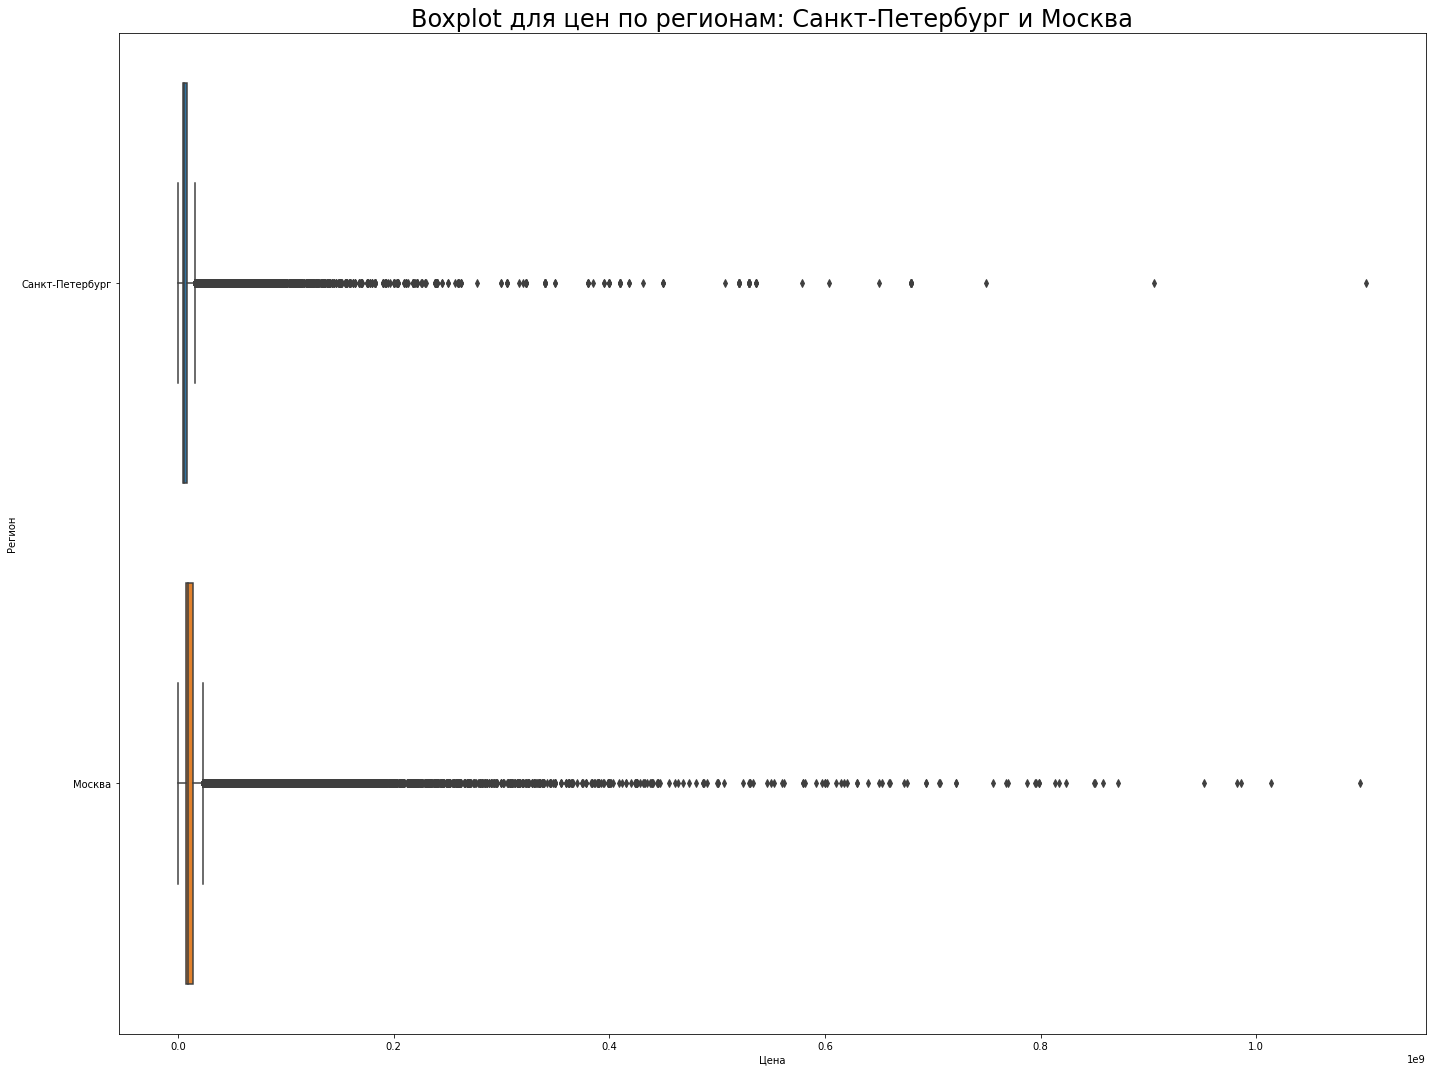

In [103]:
plt.figure(figsize=(20, 15)) 

sns.boxplot(y='reg_name', x='price', data=top_df) 
plt.ylabel('Регион')
plt.xlabel('Цена')
plt.title('Boxplot для цен по регионам: Санкт-Петербург и Москва', fontsize=24)
plt.tight_layout()
plt.show()

Несмотря на то, что я верю в цены по 1 миллиарду за квартиру для Санкт-Петербурга и Москвы, я бы проверила диапазон с максимальными значениями.

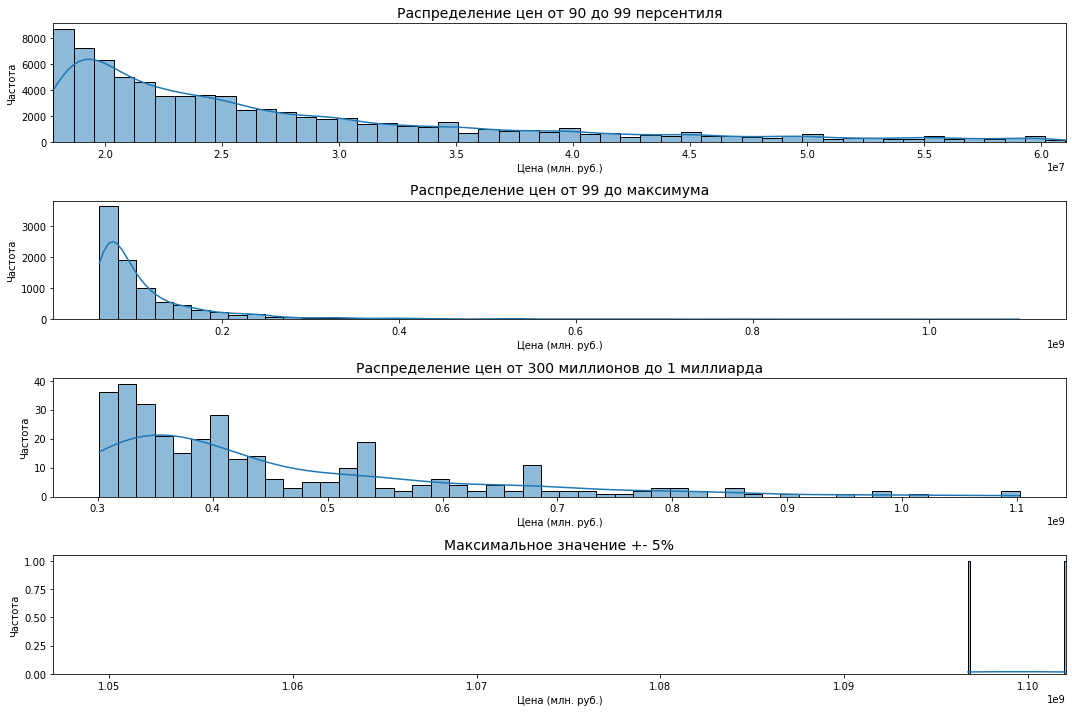

In [104]:
# расчет перцентилей (с учётом только положительных значений)
p90 = np.percentile(top_df['price'], 90)
p99 = np.percentile(top_df['price'], 99)
max_price = top_df['price'].max()

plt.figure(figsize=(15, 10))


# График 1: значения от 90 до 99 персентиля
plt.subplot(4, 1, 1)
sns.histplot(top_df[(top_df['price'] > p90) & (top_df['price'] <= p99)]['price'], bins=50, kde=True)
plt.title('Распределение цен от 90 до 99 персентиля', fontsize=14)
plt.xlabel('Цена (млн. руб.)', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.xlim(p90, p99)

# График 2: от 99 персентиля до максимума 
plt.subplot(4, 1, 2)
sns.histplot(top_df[(top_df['price'] > p99) & (top_df['price'] <= max_price)]['price'], bins=50, kde=True)
plt.title('Распределение цен от 99 до максимума', fontsize=14)
plt.xlabel('Цена (млн. руб.)', fontsize=10)
plt.ylabel('Частота', fontsize=10)

# График 3: от 300 миллионов до 1 миллиарда
plt.subplot(4, 1, 3)
sns.histplot(top_df[(top_df['price'] > 300000000) & (top_df['price'] <= max_price)]['price'], bins=50, kde=True)
plt.title('Распределение цен от 300 миллионов до 1 миллиарда', fontsize=14)
plt.xlabel('Цена (млн. руб.)', fontsize=10)
plt.ylabel('Частота', fontsize=10)

# График 4: диапазон рядом с максимальным значением
lower_bound = max_price * 0.95
upper_bound = max_price
plt.subplot(4, 1, 4)
sns.histplot(top_df[(top_df['price'] > lower_bound) & (top_df['price'] <= upper_bound)]['price'], bins=50, kde=True)
plt.title('Максимальное значение +- 5%', fontsize=14)
plt.xlabel('Цена (млн. руб.)', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.xlim(lower_bound, upper_bound)


plt.tight_layout()
plt.show()

* После построения гистограмм для цен для Санкт-Петербурга можно сказать, что 2 максимальные цены сильно выбиваются из общего распределения и, вероятно, являются выбросами.
* По распределению цен на промежутке от 99 персентиля до максимума можно сказать, что после 200 миллионов цены резко идут на спад: примерно от 300 миллионов и до максимальной цены частота таких цен совсем маленькая.
* Поэтому я построила график для промежутка от 300 миллионов до 1 миллиарда. Квартиры с ценами свыше 300 миллионов встречаются редко: не более 40 объявлений и с увеличением цены частота снижается.

Выведем на экран 2 максимальные цены. 

In [105]:
top_df[top_df['price'] > 1090000000]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
4372012,1102065408,2020-10-23,2661,0,3,10,1,43.5,19.5,1,2661,Санкт-Петербург,0
4984193,1096745000,2021-03-25,3,3,2,7,5,420.0,52.0,1,3,Москва,0


Квартира в Москве ценой с 1 096 745 000 рублей не выглядит подозрительно: она имеет площадь 420 метров и 5 комнат. А вот однокомнатная квартира в Санкт-Петербурге меня смущает: ее площадь составляет всего лишь 43 метра. Поэтому я удалю только квартиру из Санкт-Петербурга.

In [106]:
top_df = top_df[top_df['price'] != 1102065408]

Так как частота цен дорогих квартир не сильно высокая, у нас есть возможность оценить вручную эти значения на предмет выбросов. Рассмотрим промежуток с ценами свыше 600 миллионов рублей.

In [107]:
top_df[top_df['price'] > 600000000]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
314704,982461000,2018-10-23,3,2,14,17,7,487.00,30.0,1,3,Москва,0
481260,615000000,2018-11-17,3,0,5,8,5,270.00,25.0,1,3,Москва,0
674769,799000000,2018-12-12,3,3,3,3,8,600.00,25.0,1,3,Москва,0
732262,673710001,2018-12-21,3,2,7,10,8,320.00,25.0,1,3,Москва,0
998075,850000000,2019-02-02,3,2,7,7,7,850.00,50.0,1,3,Москва,0
1250623,799000000,2019-03-10,3,2,11,11,6,424.00,25.0,1,3,Москва,0
1428091,617458200,2019-04-03,3,3,7,8,5,327.00,54.0,2,3,Москва,0
1824342,660374000,2019-06-10,3,2,9,13,6,430.00,13.4,1,3,Москва,0
2563168,706482000,2019-10-21,3,2,6,6,5,416.80,30.0,1,3,Москва,0
2568835,630000000,2019-10-23,3,2,6,7,6,640.00,70.0,1,3,Москва,0


Среди этих квартир меня смущает только квартира с площадью 32 кв. метра: слишком маленькая для цены 604 032 704 рублей. Поэтому для этого промежутка я удалю только ее, а остальные квартиры будут жить дальше.

In [108]:
top_df = top_df.loc[top_df.index != 4065676]

В целом, по экстремальным высоким ценам я сделала все, что хотела. Так как я удаляла выбросы в разрезе регионов и создавала для этого новые датасеты на основе исходного, вернем все данные в одно место и перезапишем датасет df с учетом всех проделанных издевательств.

In [109]:
df = pd.concat([new_df, nsk_df, top_df], ignore_index=True)
df.shape[0]

5240051

### Экстремальные низкие цены на квартиры

При знакомстве с данными также были выявлены и очень низкие цены: ни одна квартира не может стоить 1, 10 или 100 рублей. Я поискала в интернете и выделила для себя пороговое значение стоимости квартиры: 100 тысяч рублей. Все квартиры в ниже этой цены будут расмотрены отдельно. Также я выделила регионы, которые чаще других упомянались в топах самой недорогой недвижимости в России с 2018 по 2021 год: 

* Республика Коми
* Республика Ингушетия
* Псковская область
* Оренбурская область
* Чеченская республика
* Кировская область
* Архангельская область
* Владимирская область
* Республика Карелия
* Ивановская область
* Челябинская область
* Кировская область
* Кемеровская область
* Алтайский край

Начнем с совсем маленькой цены: посмотрим, есть ли у нас в данных квартиры до 10000 рублей. 

In [110]:
df[df['price'] <= 10000].shape[0]

2732

In [111]:
df[df['price'] <= 10000]['reg_name'].value_counts()

Краснодарский край          512
Ростовская область          215
Республика Саха (Якутия)    177
Свердловская область        146
Республика Татарстан        145
                           ... 
Омская область                2
Кировская область             1
Амурская область              1
Липецкая область              1
Тульская область              1
Name: reg_name, Length: 61, dtype: int64

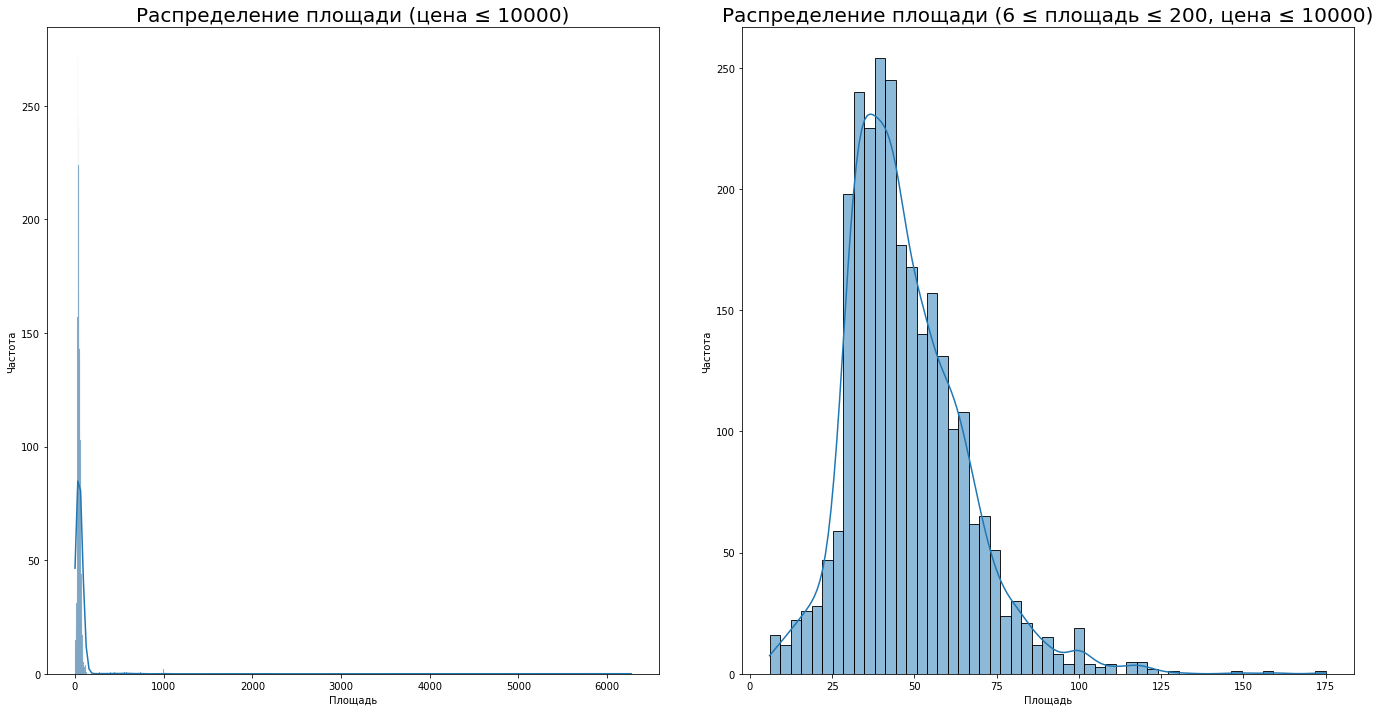

In [112]:
plt.figure(figsize=(20, 10))

# Первый график: все значения
filtered_df = df[df['price'] <= 10000]
plt.subplot(1, 2, 1) 
sns.histplot(filtered_df['area'], kde=True)
plt.xlabel('Площадь')
plt.ylabel('Частота')
plt.title('Распределение площади (цена ≤ 10000)', fontsize=20)


# Второй график: значения от 6 до 200 метров
plt.subplot(1, 2, 2)  
sns.histplot(filtered_df[(filtered_df['area'] >= 6) & (filtered_df['area'] <= 200)]['area'], kde=True)
plt.xlabel('Площадь')
plt.ylabel('Частота')
plt.title('Распределение площади (6 ≤ площадь ≤ 200, цена ≤ 10000)', fontsize=20)

plt.tight_layout()  
plt.show()

In [113]:
describe = df[df['price'] <= 10000]['area'].describe().to_frame().T 
formatted_describe = describe.style.format(
    {
        'mean': '{:.2f}',
        'std': '{:.2f}',
        'min': '{:.2f}',
        '25%': '{:.2f}',
        '50%': '{:.2f}',
        '75%': '{:.2f}',
        'max': '{:.2f}',
        'count': '{:.0f}'
    }
)
formatted_describe

,count,mean,std,min,25%,50%,75%,max
area,2732,56.76,173.52,1.00,35.00,44.00,58.00,6270.00


In [114]:
df[df['price'] <= 100000]['object_type'].value_counts()

1    3627
2     409
Name: object_type, dtype: int64

На удивление их оказалось достаточно много и чаще всего такие квартиры встречаются в Краснодарском крае, Ростовской области и республики Саха (Якутия), которые я не видела в рейтингах регионов с самой дешевой недвижимостью. Данные квартиры обладают достаточно стандартной площадью, в этом можно убедиться при построении гистограмм распределения цен и расчета основных статистик. Мне кажется, что такая цена - нонсенс, поэтому я отфильтрую датасет и полностью удалю этот диапазон значений.

In [115]:
df = df[df['price'] > 10000]

Теперь рассмотрим промежуток до 100 тысяч рублей. В первую очередь обратим внимание на регион. Чаще всего я встречала настолько дешевые квартиры в регионах, список которых я оставила выше, и в основном это были квартиры в старых советских домах (иногда даже в деревянных постройках).

In [117]:
df[df['price'] <= 100000]['reg_name'].value_counts().head()

Москва                310
Республика Коми       252
Краснодарский край    136
Московская область     77
Санкт-Петербург        75
Name: reg_name, dtype: int64

Очень забавно видеть здесь в лидерах Москву. Рассмотрим строки в разрезе этого региона:

In [119]:
df[(df['price'] <= 100000) & (df['reg_name'] == 'Москва')]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
4350867,45000,2018-09-09,3,1,4,17,2,53.0,8.0,1,3,Москва,0
4356031,33000,2018-09-15,3,2,9,9,2,50.0,NaN,1,3,Москва,1
4375941,16500,2018-09-25,3,3,6,9,3,71.0,8.6,1,3,Москва,0
4442985,36000,2018-12-07,3,4,1,4,2,44.0,7.0,1,3,Москва,0
4477372,18000,2019-01-23,3,2,6,14,1,36.0,6.0,2,3,Москва,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202016,11000,2021-04-04,3,3,1,3,2,57.0,8.5,1,3,Москва,0
5203115,25900,2021-04-05,3,1,9,14,3,94.8,11.3,1,3,Москва,0
5216883,14000,2021-04-19,3,1,12,12,2,44.0,6.0,1,3,Москва,0
5217494,10450,2021-04-19,3,1,10,17,2,64.0,13.0,1,3,Москва,0


Какое-то время я склонялась к тому, что это цена за квадратный метр, но даже так цены слишком низкие и я не нашла ни одного даже близко похожего объявления для Москвы (если умножить цену за метр на площадь квартиры). Это скорее цена за сантиметр, только так картина будет выглядеть правдоподобно. В любом случае, эти 309 строк я без сожаления удаляю, так как они совсем не отражают цены на недвижимость в Москве.

In [120]:
df = df.query('not (price <= 100000 and reg_name == "Москва")')

Теперь перейдем к региону, в котором после Москвы чаще всего встречаются квартиры до 100 000 рублей - Республика Коми. В данной ситуации я уже настроена менее скептично, потому что одна Воркута и её окрестности могут оправдать наличие таких квартир: они действительно продаются почти за бесценок в полузаброшенных поселках этого региона. Выведем эти строки на экран.

In [121]:
df[(df['price'] <= 100000) & (df['reg_name'] == 'Республика Коми')]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
5047,100000,2018-09-09,4417,1,2,5,2,48.0,8.0,1,4417,Республика Коми,0
5329,100000,2018-09-09,4417,1,4,5,1,25.2,9.0,1,4417,Республика Коми,0
11201,80000,2018-09-10,4417,3,1,2,1,26.0,6.0,1,4417,Республика Коми,0
35261,100000,2018-09-15,4417,1,2,5,2,48.0,9.0,1,4417,Республика Коми,0
48135,85000,2018-09-18,4417,1,2,5,2,46.0,NaN,1,4417,Республика Коми,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366689,100000,2021-04-06,4417,1,1,5,1,34.0,6.0,1,4417,Республика Коми,0
3376427,100000,2021-04-08,4417,1,1,5,2,46.6,8.0,1,4417,Республика Коми,0
3435046,50000,2021-04-23,4417,5,2,2,3,54.0,6.0,1,4417,Республика Коми,0
3435348,50000,2021-04-23,4417,1,4,5,2,45.0,7.0,1,4417,Республика Коми,0


In [122]:
df[(df['price'] <= 100000) & (df['reg_name'] == 'Республика Коми')]['price'].min()

11000

In [123]:
df[(df['price'] <= 100000) & (df['reg_name'] == 'Республика Коми')]['price'].max()

100000

Несмотря на то, что для этого региона свойственны дешевые и экстремально дешевые квартиры, 11 тысяч это все-таки перебор. Я бы поставила пороговым значением 80 тысяч: это самое дешевое объявление, которое я видела. Поэтому отфильтруем датасет и для республики Коми оставим цены свыше 80 тысяч за квартиру.

In [124]:
df = df.query('not (price < 80000 and reg_name == "Республика Коми")')

Дальше в топе регионов по количеству квартир идут Краснодарский край, Санкт-Петербург и Московская область. Эти регионы ближе к Москве, чем к республике Коми: я не нашла ни одного объявления о продаже похожих квартир, только информация о том, что до 100 тысяч может стоить квадратный метр квартиры, но никак не целая площадь. Поэтому для этих регионов я также удаляю все строки с квартирами дешевле 100 тысяч рублей по причине того, что такие объявления либо сожержат ошибки, либо не отражают действительность.

In [125]:
regions = ['Краснодарский край', 'Санкт-Петербург', 'Московская область']
df = df.query('not ((price < 100000) & (reg_name in @regions))')

У нас в списке регионов остались в основном те, в которых реально найти аномально дешевое жилье, поэтому по аналогии с республикой Коми, для которой мы считали пределом 80 тысяч, рассмотрим такие строки для оставшихся данных. Все-таки цены 80 000 рублей ниже немного пугают.

In [127]:
df[df['price'] < 80000]['reg_name'].value_counts().head()

Республика Дагестан         38
Республика Татарстан        38
Свердловская область        25
Республика Саха (Якутия)    24
Челябинская область         24
Name: reg_name, dtype: int64

* Для данного ценового диапазона лидирует **Республика Татарстан**, однако самые дешевые квартиры в этом регионе, которые я нашла, были свыше 100 тысяч рублей, поэтому для этого региона объявления с ценой ниже будут удалены.
* Аналогично для **Дагестана**: я не нашла ни одного объявления с такими дешевыми квартирами, как в наших данных - в данном регионе достаточно дорогая недвижимость. 
* **Свердловская область**: несмотря на то, что в данном регионе недвижимость уже дешевле, чем в предыдущих двух регионах, самые дешевые квартиры стоят свыше 100 тысяч рублей и я ни разу не встречала никаких аномально дешевых квартир в Свердловской области (как для Коми или Ингушетии).
* А вот в **Челябинской области** я нашла объявления с похожими ценами - несколько объявлений о продаже квартир в поселках городского типа. Поэтому для этого региона удалим квартиры стоимостью менее 80 тысяч рублей, сохранив промежуток от 80 до 100 тысяч рублей.
* В остальных регионах значений меньше 100 тысяч рублей не так много и детальное рассмотрение не требуется: удалим все строки с объявлениями о продаже квартир ценой ниже 100 тысяч рублей. 

In [128]:
# удаляем значения ниже 80 тысяч для Челябинской области 

df = df.query('not (price < 80000 and reg_name == "Челябинская область")')

In [129]:
# создаем список 

unique_regions = df['reg_name'].unique().tolist()
regions_to_remove = ['Республика Коми', 'Челябинская область']
filtered_regions = [reg for reg in unique_regions if reg not in regions_to_remove]

df = df.query('not ((price < 100000) & (reg_name in @filtered_regions))')

Со 100 тысяч перейдем к ценовому диапазону до 1 миллиона рублей, потому что такие квартиры тоже считаются дешевыми.

In [130]:
df[df['price'] <= 1000000].shape[0]

154924

Такое количество квартир уже будет достаточно затруднительно рассмотреть вручную. Попробуем посмотреть в разрезе регионов: для меня на данном этапе главное не встретить в топе регионов Москву и Санкт-Петербург.

In [131]:
df[df['price'] <= 1000000]['reg_name'].value_counts().head(10)

Новосибирская область      14983
Краснодарский край         14311
Свердловская область       13671
Челябинская область        12650
Алтайский край              8014
Ростовская область          6697
Ярославская область         6167
Республика Татарстан        5244
Республика Коми             4886
Республика Башкортостан     4573
Name: reg_name, dtype: int64

В целом, ТОП-10 регионов с квартирами до 1 миллиона рублей выглядит адекватно: здесь присутствует Республика Коми, Челябинская область, Алтайский край, а остальные регионы не вызывают подозрений, поэтому я считаю, что на данном этапе можно заканчивать работу с выбросами в ценах.

### Аномальные значения площадей квартир

При знакомстве с данными были определены аномально большие и аномально маленькие по общей площади квартиры. Посмотрим еще раз на распределенение площадей (в большей степени не на основу распределения, а на крайние значения сверху и снизу), может быть что-то изменилось после удаления выбросов в ценах. Будут построены следующие графики: 

* Гистограмма распределения площадей квартир от 0 до 15 метров. 15 метров - достаточно маленькая площадь квартиры, которую, тем не менее, можно себе представить. Посмотрим, как часто встречаются квартиры с площадью меньше 15 квадратных метров. 
* Гистограмма распределения площадей для диапазона рядом с максимальной площадью: +- 10%. Так будет проще оценить, как много квартир у нас с аномальной площадью.
* Гистограмма распределения площадей квартир от 99 персентиля распределения до максимума: чтобы оценить, на каком примерно значении частота резко снижается.
* Гистограмма распределения площадей от обозначенного в прошлом пункте значения в метрах до максимума.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


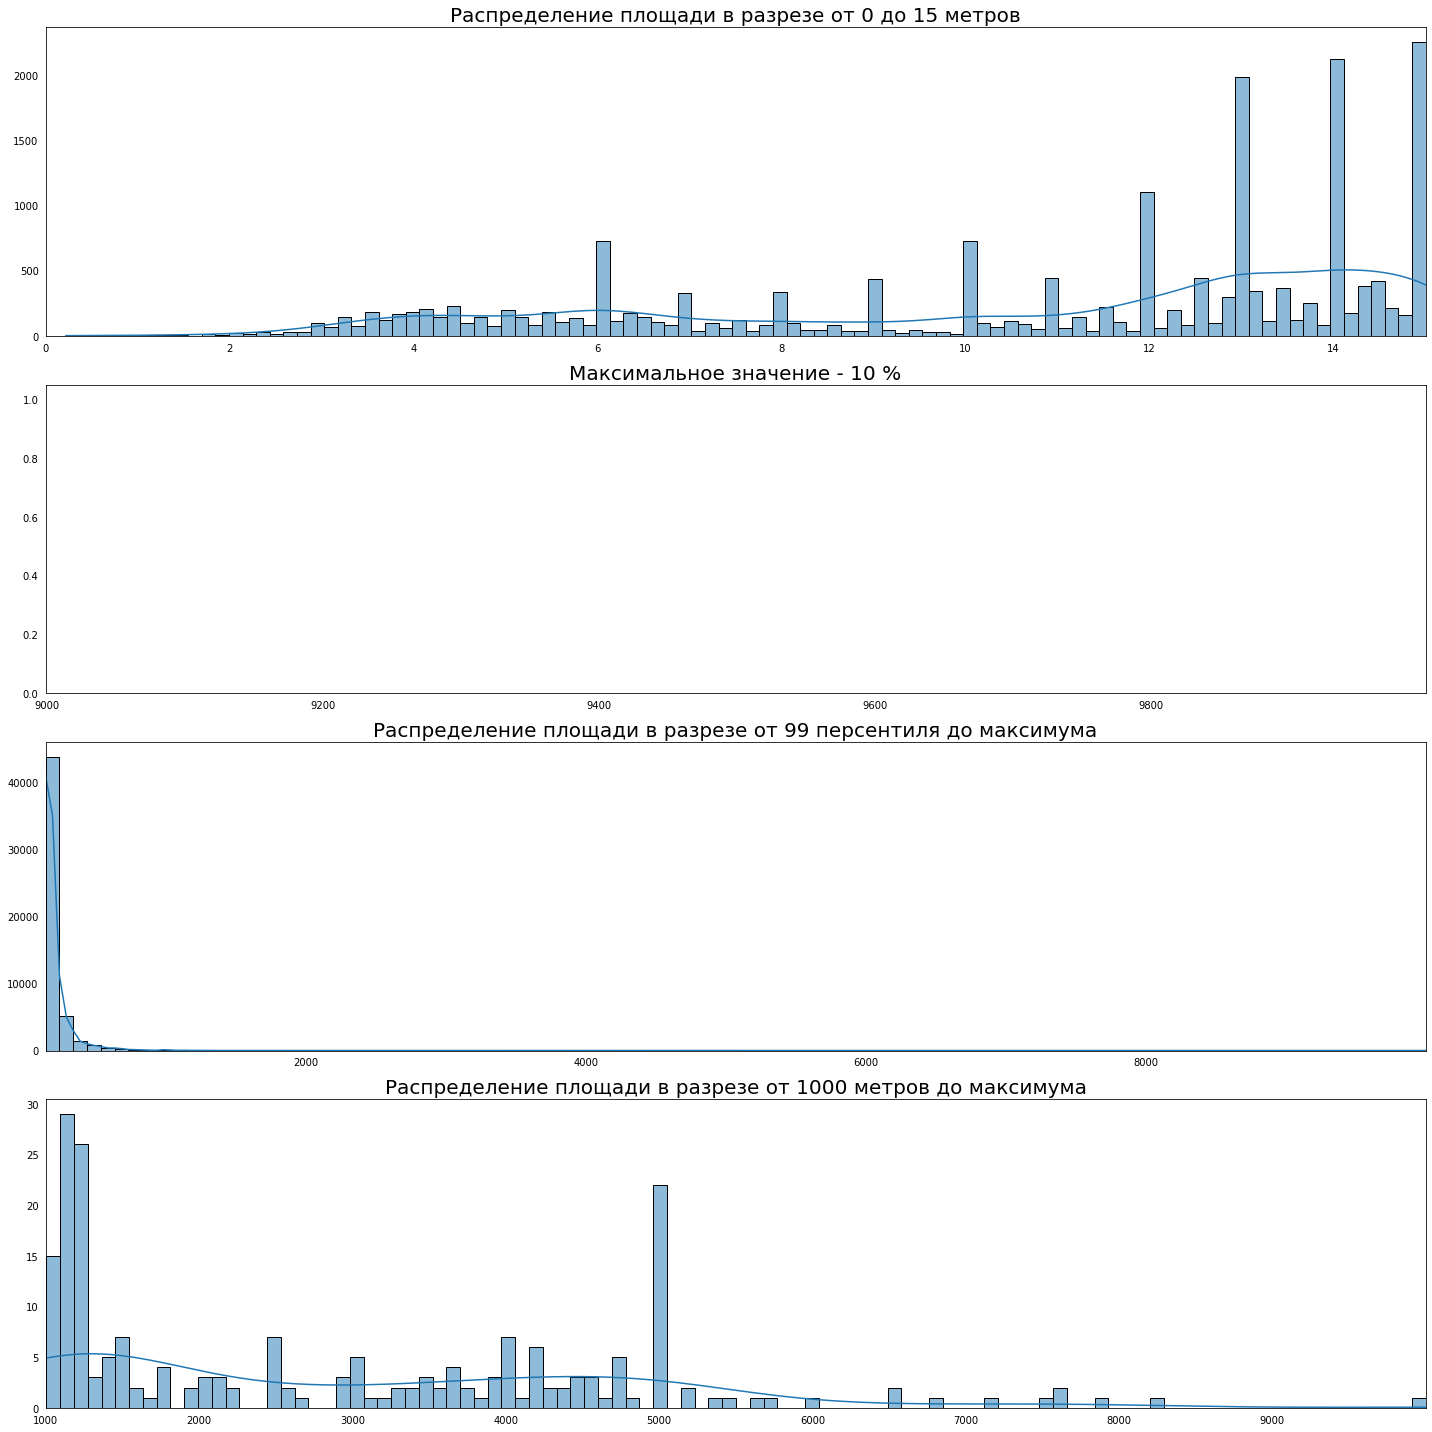

In [132]:
# расчет статистик
p99 = df['area'].quantile(0.99)
p90 = df['area'].quantile(0.90)
min_area = df['area'].min()
max_area = df['area'].max()

plt.figure(figsize=(20, 20))

# График 1: значения от 0 до 15 метров
plt.subplot(4, 1, 1)
sns.histplot(df[(df['area'] > 0) & (df['area'] <= 15)]['area'], bins=100, kde=True)
plt.title('Распределение площади в разрезе от 0 до 15 метров', fontsize=20)
plt.xlim(0, 15)  
plt.ylabel('') 
plt.xlabel('') 
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True) 


# График 2: диапазон рядом с максимальным значением 
lower_bound = max_area * 0.90
upper_bound = max_area
plt.subplot(4, 1, 2)
sns.histplot(df[(df['area'] > lower_bound) & (df['area'] <= upper_bound)]['area'], bins=100, kde=True)
plt.title('Максимальное значение - 10 %', fontsize=20)
plt.xlim(lower_bound, upper_bound)
plt.ylabel('') 
plt.xlabel('') 
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True) 

# График 3: значения от 99 персентиля до максимума
plt.subplot(4, 1, 3)
sns.histplot(df[(df['area'] > p99) & (df['area'] <= max_area)]['area'], bins=100, kde=True)
plt.title('Распределение площади в разрезе от 99 персентиля до максимума', fontsize=20)
plt.xlim(p99, max_area)
plt.ylabel('') 
plt.xlabel('') 
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True) 

# График 4: значения от 1000 метров до максимума
plt.subplot(4, 1, 4)
sns.histplot(df[(df['area'] > 1000) & (df['area'] <= max_area)]['area'], bins=100, kde=True)
plt.title('Распределение площади в разрезе от 1000 метров до максимума', fontsize=20)
plt.xlim(1000, max_area)
plt.ylabel('') 
plt.xlabel('') 
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True) 

plt.tight_layout()
plt.show()

**По квартирам с маленькой площадью:**

Я поискала в интернете информацию по поводу самых маленьких квартир и буду считать квартиры выбросами если их площадь меньше 6 квадратных метров. Это значение площади, которое хотя бы укладывается в голове (например, комната в комунальной квартире). Все, что меньше - явная ошибка (я в это верю). 

**По квартирам с большой площадью:**

Я аналогичным образом искала информацию по большим площадям (чаще всего это несколькоуровневые квартиры или пентхаусы) и не нашла квартир с общей площадью свыше 2 тысяч квадратов. Все квартиры, у которых площадь превышает 2 тысячи, больше похожи на отдельные дома, если честно... В любом случае, такие квартиры не занимают весомую долю нашего датасета, в этом можно убедиться на последнем подграфике: частота таких квартир достаточно небольшая. 

**Вывод:**

Отфильтруем датасет и оставим только квартиры с площадью больше 6 и меньше 2000 квадратных метров. 

In [133]:
df = df[df['area'] >= 6]
df = df[df['area'] <= 2000]
df.shape[0]

5233034

### Экстремальные значения площадей кухонь

Мы уже устранили ситуации, когда площадь кухни у нас превышает общую площадь, тем не менее, оценим площадь кухни отдельно.

In [134]:
df[df['area'] < df['kitchen_area']].shape[0]

0

In [135]:
df[df['area'] == df['kitchen_area']].shape[0]

1123

Обнаружилась интересная ситуация: площадь кухни совпадает с общей площадью квартиры. Сложно представить, чтобы такое существовало в реальности. Мне кажется, что в исходных данных отсутствовали данные по площади кухни и они автоматически заполнялись общей площадью квартиры.

У меня было 2 идеи как от этого избавиться: либо просто удалить эти строки, либо рассчитать **среднюю долю площади кухни в общей площади и для 1144 строчек заменить площадь кухни на общую площадь кухни по этой строке умноженную на рассчитанную долю площади кухни в общей площади кухни**. Я выбрала второе.

In [136]:
df['kitchen_area'].isnull().sum()

252286

In [137]:
df_missed = df[df['kitchen_area'].isnull()]
df_not_missed = df[df['kitchen_area'].notnull()]

# средняя доля площади кухни для второго датасета
kitchen_share = df_not_missed['kitchen_area'] / df_not_missed['area']
mean_kitchen_share = np.mean(kitchen_share)

# замена значений площади кухни во втором датасете, где площадь кухни равна общей площади
df_not_missed.loc[df_not_missed['kitchen_area'] == df_not_missed['area'], 'kitchen_area'] = df_not_missed['area'] * mean_kitchen_share


df = pd.concat([df_missed, df_not_missed], ignore_index=True)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [138]:
df[df['area'] == df['kitchen_area']].shape[0]

0

In [139]:
df['area'].max()

2000.0

In [140]:
df['kitchen_area'].max()

440.0

**Оценим максимальную площадь кухни**

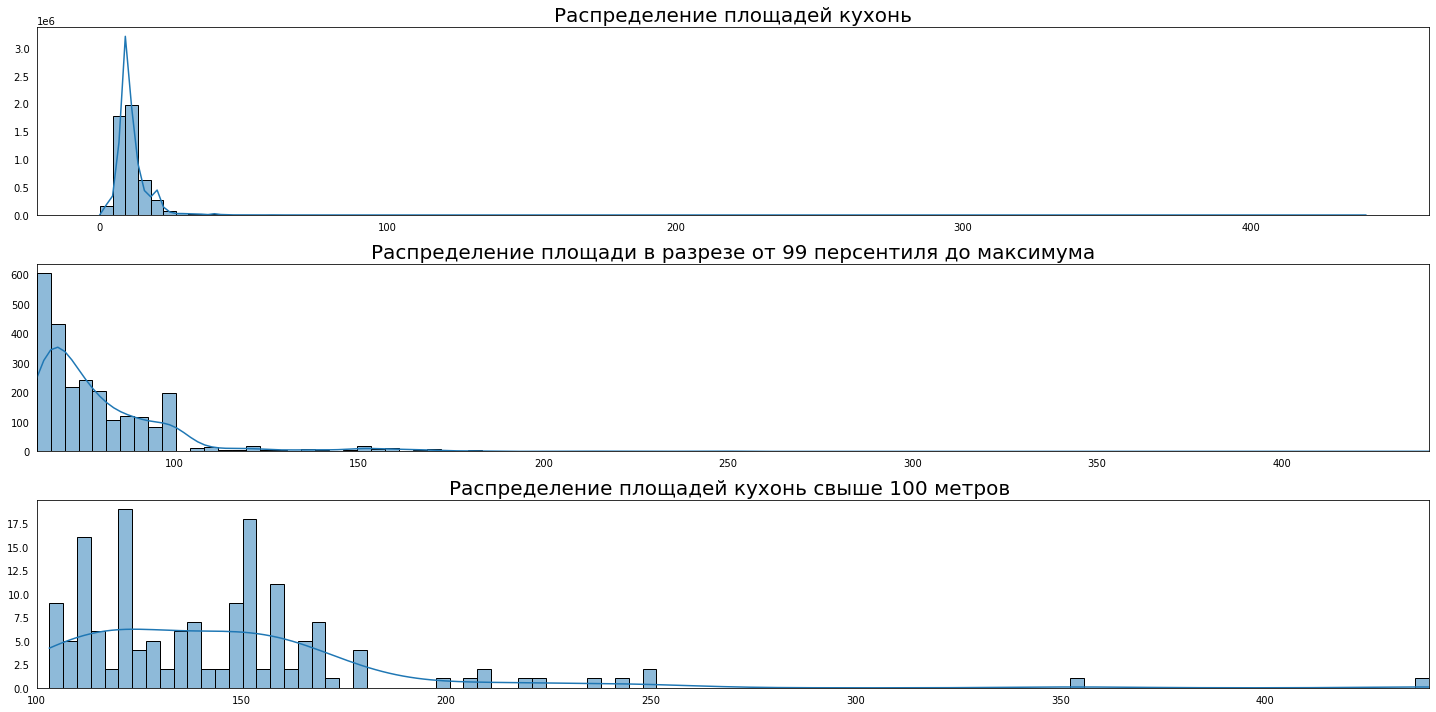

In [141]:
# График 1: распределение площадей кухонь 

plt.figure(figsize=(20,10))

plt.subplot(3, 1, 1)
sns.histplot(df['kitchen_area'], bins=100, kde=True)
plt.title('Распределение площадей кухонь', fontsize=20)
plt.ylabel('') 
plt.xlabel('') 
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True) 


# График 2: значения от 99 персентиля до максимума
p99 = np.percentile(df['kitchen_area'].dropna(), 99.95)
max_area = df['kitchen_area'].max()

plt.subplot(3, 1, 2)
sns.histplot(df[(df['kitchen_area'] > p99) & (df['kitchen_area'] <= max_area)]['kitchen_area'], bins=100, kde=True)
plt.title('Распределение площади в разрезе от 99 персентиля до максимума', fontsize=20)
plt.xlim(p99, max_area)
plt.ylabel('') 
plt.xlabel('') 
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True) 

# График 3: распределение площадей кухонь свыше 100 метров 

plt.subplot(3, 1, 3)
sns.histplot(df[(df['kitchen_area'] > 100) & (df['kitchen_area'] <= max_area)]['kitchen_area'], bins=100, kde=True)
plt.title('Распределение площадей кухонь свыше 100 метров ', fontsize=20)
plt.xlim(100, max_area)
plt.ylabel('') 
plt.xlabel('') 
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True) 

plt.tight_layout()
plt.show()

In [142]:
df[df['kitchen_area'] >= 100]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
308851,2500000,2018-09-20,4007,3,1,1,1,120.0,100.0,2,4007,Республика Дагестан,0
312270,3690000,2018-09-21,6171,0,17,28,1,415.0,128.0,2,6171,Свердловская область,0
385976,3900000,2018-10-11,4007,3,3,9,3,444.0,120.0,1,4007,Республика Дагестан,0
438092,14033250,2018-10-23,3106,3,5,9,5,170.1,170.0,1,3106,Самарская область,0
444918,75000000,2018-10-25,2843,2,1,3,5,398.0,100.0,2,2843,Краснодарский край,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194105,240000000,2021-04-02,2661,3,8,13,4,342.0,100.0,1,2661,Санкт-Петербург,0
5200185,50000000,2021-04-08,2661,0,1,15,3,233.3,118.0,1,2661,Санкт-Петербург,0
5203648,52000000,2021-04-09,2661,2,3,15,2,174.3,114.9,1,2661,Санкт-Петербург,0
5208180,255000000,2021-04-14,3,2,19,19,5,583.0,100.0,1,3,Москва,0


Таким образом, частоты распределения площадей резко снижаются после 100 метров: таких строк всего лишь 307. Я бы подробнее посмотрела на 2 значения свыше 350 метров, потому что они сильно выбиваются из распределения.

In [143]:
df[df['kitchen_area'] >= 350]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
573266,3600000,2018-11-25,81,1,11,16,1,1131.0,353.0,1,81,Московская область,0
1277499,290000,2019-05-21,4417,3,4,5,2,580.0,440.0,1,4417,Республика Коми,0


Я не буду удалять все эти строки, хоть они меня и немного смущают из-за размера кухни (и в абсолютном, и в относительном к общей площади отношении), но я не знаю, к чему конкретно придраться... Поэтому пока что сохраним их :)

**Теперь оценим минимальную площадь кухни.**

In [144]:
df['kitchen_area'].sort_values()

3821241    0.01
1614887    0.01
1318237    0.01
3782711    0.01
3782820    0.01
           ... 
252281      NaN
252282      NaN
252283      NaN
252284      NaN
252285      NaN
Name: kitchen_area, Length: 5233034, dtype: float64

Меня смущают квартиры с площадью кухни, равной 1 сантиметру. Выведем их на экран.

In [145]:
df[df['kitchen_area'] == 0.01]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
958890,1470000,2019-02-26,6171,4,4,5,1,25.00,0.01,1,6171,Свердловская область,0
1318237,2280000,2019-06-01,6171,2,4,5,1,23.00,0.01,2,6171,Свердловская область,0
1614887,1990000,2019-09-02,6171,4,2,3,2,41.00,0.01,2,6171,Свердловская область,0
1714373,2250000,2019-10-01,6171,4,3,3,2,49.00,0.01,2,6171,Свердловская область,0
3315530,2600000,2021-02-24,6171,4,1,3,2,58.90,0.01,2,6171,Свердловская область,0
3782711,1180000,2019-02-05,9654,3,3,3,1,23.60,0.01,2,9654,Новосибирская область,0
3782820,1012500,2019-02-05,9654,3,3,3,1,20.25,0.01,2,9654,Новосибирская область,0
3821241,1380000,2019-02-28,9654,3,3,3,-1,27.60,0.01,2,9654,Новосибирская область,0
3821283,850500,2019-02-28,9654,3,3,3,-1,18.90,0.01,2,9654,Новосибирская область,0
3821288,1180000,2019-02-28,9654,3,3,3,-1,23.60,0.01,2,9654,Новосибирская область,0


Я думала насчет того, может ли в квартире в принципе не быть кухни. В новостройках (особенно в квартирах-студиях) отдельного помещения под кухню не предусмотрено в принципе: это чаще всего небольшая зона со всем необходимым, встроенная где-то в уголочке квартиры. Однако она все равно занимает место и явно не 1 сантиметр. Так как таких строчек у нас не очень много, я удалю их и не буду проделывать алгоритм как в ситуации выше.

In [146]:
df = df[df['kitchen_area'] != 0.01]

Рассмотрим теперь площади кухни меньше 6 метров: это минимальная площадь квартиры, которую мы сохранили в своих данных.

In [147]:
df[df['kitchen_area'] <= 6]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing
252288,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,2,2843,Краснодарский край,0
252290,3300000,2018-03-02,81,1,4,5,1,32.0,6.0,1,81,Московская область,0
252302,2250000,2018-03-17,2722,1,2,5,2,46.0,6.0,1,2722,Республика Башкортостан,0
252312,2500000,2018-04-04,2843,2,2,8,-1,25.0,5.0,1,2843,Краснодарский край,0
252314,2370000,2018-04-09,4417,1,5,5,2,47.0,6.0,1,4417,Республика Коми,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233005,12500000,2021-05-01,2661,1,1,9,3,67.0,6.0,1,2661,Санкт-Петербург,0
5233008,6230840,2021-05-01,3,1,8,33,-1,19.6,5.0,2,3,Москва,0
5233018,7504290,2021-05-01,3,2,2,32,-1,19.9,5.8,2,3,Москва,0
5233027,3750000,2021-05-01,3,1,1,12,-1,17.0,3.0,1,3,Москва,0


In [148]:
df[df['kitchen_area'] <= 6]['rooms'].value_counts()

 1    360644
 2    319140
-1    188720
 3    113400
 4     13291
 5       435
 6        28
 9        13
 7         6
 8         4
Name: rooms, dtype: int64

Чаще всего маленькие кухни действительно встречаются в однокомнатных, двухкомнатных и студиях. В целом, 6 квадратов для кухни - не так уж и мало. На Авито и на Циане тысячи объявлений с квартирами, у которых кухня не занимает более 1 метра. Найдем их в наших данных:

In [149]:
df[df['kitchen_area'] <= 1]['kitchen_area'].value_counts().head()

1.00    13924
0.09      194
0.06      160
0.10      100
0.07       66
Name: kitchen_area, dtype: int64

В целом, среди всего этого промежутка я бы оставила площадь кухни размером от 1 метра: все-таки я не видела в объявлениях площадь исчисляемую в сантиметрах. Но у меня почему-то не получилось это сделать, такие данные удалялись вместе с пропусками... Пока что оставила как есть.

In [150]:
df.to_csv('realty_18_21_ready.csv', index=False) 

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="6"></a> 
    <h1 style="color: darkblue;">Выводы по очистке датасета от выбросов:</h1
</div> <a class="anchor" id="6"></a> 

* В целом было удалено **8 329 строк**: теперь в наших данных содежится 5 233 022 объявлений о продаже квартиры.
* Были удалены строки с количеством **комнат = -2**.
* Для строк, по которым этаж превышал общую этажность и для строк, по которым площадь кухни превышала общую площадь, мы поменяли местами эти два столбца, обосновав это решение.
* Было принято решение удалить **отрицательные цены** ввиду того, что они выглядели нетипично для наших данных.
* Удалены **нулевые цены** по причине их неинформативности для нашего анализа и их немногочисленности.
* Обработаны **экстремальные большие цены**: очистка всего датасета от значения свыше 1 108 140 000 рублей - у квартир с такой стоимостью и выше была площадь квартиры не соответствующая цене; для всех регионов, кроме Санкт-Петербурга и Москвы, по боксплоту была вручную определена граница, по которой был отфильтрован датасет: 95 миллионов рублей за объект. Таким образом, мы обработали странную ситуацию в Новосибирской области и сохранили некоторые  дорогостоящие квартиры в регионах, которые не являются Санкт-Петербургом и Москвой. Для последних двух регионов были штучно удалены единичные странные значения цен.
* Обработаны **минимальные значения по полю цены**: для большинства регионов пороговой границей считалось 100 тысяч, для Республики Коми и Челябинской области - 80 тысяч ввиду того, что были найдены реальные объекты недвижимости по такой цене. Для Москвы удалены 309 строки с квартирами со стоимостью менее 100 тысяча рублей, потому что эти значения не отражают ситуацию на рынке недвижимости в столице.
* При удалении **выбросов в площадях** были определены границы: максимальная площадь - 2000 тыс. квадратных метров, минимальная - 6 квадратный метров.
* Также обработали ситуации, когда **площадь кухни совпадала с общей площадью**: заменили для этих строк площадь кухни на среднюю долю площади кухни в общей, умноженную на общую площадь. 

[Вернуться к навигации](#2)

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="7"></a> 
    <h1 style="color: darkblue;">Заполнение пропусков по столбцу kitchen_area</h1>
</div> <a class="anchor" id="7"></a> 

До этого момента мы не затрагивали пропуски в наших данных - пришло время окончательно с ними разобраться. Главная проблема в моем наборе данных - большое количество пропусков по столбцу с площадью кухни. Я очень долго думала, как же корректнее с ними поступить. Пропусков слишком много, чтобы их удалить. И точно также их слишком много, чтобы заменять на какое-то значение: среднее, медиану, прыдыдущее и так далее. Также нужно учитывать, что итоговая площадь не должна превышать общую площадь квартиры, что может произойти при любом из перечисленных мною методов заполнения пропусков. Перед началом работы я набросала для себя такой план, но этот текст я пишу уже постфактум, поэтому заранее скажу, что заполнила я их очень смешно. В общем, начнем: 

**План по заполнению пропусков:**

`1.` Распределение зависимой переменной: площади кухни. Поиск закономерностей.

`2.` Построение матрицы корреляции для определение факторов, оказывающих наибольшее влияние на результат и факторов, коррелирующих между собой.

`3.` Кластеризация данных по площади и цене. Создание выборочной совокупности и построение множественной линейной регрессии. Проверка допущений. 

`4.` Модель случайного леса (RandomForest).

`5.` LightGBM.

`6.` Выбор наилучшего метода заполнения пропусков.

`7.` Заполнение пропусков и проверка корректности заполненных значений. 

### Распределение зависимой переменной: площади кухни. Поиск закономерностей.

In [152]:
df = pd.read_csv('realty_18_21_ready.csv') 

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [153]:
df_missing = df[df['kitchen_area'].isnull() == True]
df_not_missing = df[df['kitchen_area'].isnull() == False]

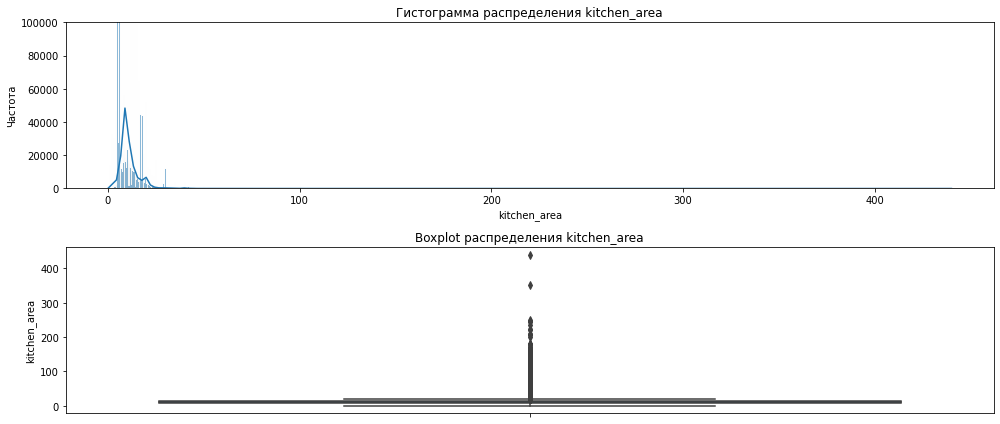

In [154]:
plt.figure(figsize=(14, 6)) 

# гистограмма
plt.subplot(2, 1, 1) 
sns.histplot(df['kitchen_area'], kde=True)
plt.title('Гистограмма распределения kitchen_area')
plt.xlabel('kitchen_area')
plt.ylim(0, 100000)
plt.ylabel('Частота')

# boxplot
plt.subplot(2, 1, 2)  
sns.boxplot(y=df['kitchen_area'])
plt.title('Boxplot распределения kitchen_area')
plt.ylabel('kitchen_area')

plt.tight_layout()
plt.show()

На графиках меня заинтересовали резкие "всплески" в распределении площадей кухонь: по этим значениям частота на порядок выше частоты других размеров. Посмотрим, какие площади встречаются настолько чаще других и построим гистограмму распределения для площадей кухонь до 50 метров (визуально самые часто встречаемые площади входят в этот промежуток).

In [155]:
df['kitchen_area'].value_counts().head()

6.0     487825
9.0     419615
10.0    346406
8.0     286114
12.0    263416
Name: kitchen_area, dtype: int64

Text(0, 0.5, 'Частота')

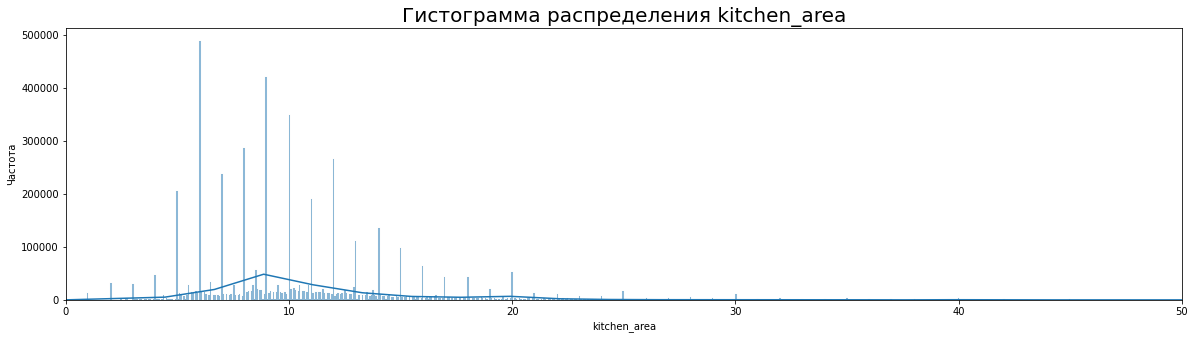

In [156]:
plt.figure(figsize=(20,5))

sns.histplot(df['kitchen_area'], kde=True)
plt.title('Гистограмма распределения kitchen_area', fontsize=20)
plt.xlim(0, 50)
plt.xlabel('kitchen_area')
plt.ylabel('Частота')

При знакомстве с данными мы опредили особенность ценообразования на квартиры: намного чаще встречались цены, переходящие через 100 тысяч. Теперь мы видим нечто подобное для площадей кухонь: намного чаще в объявлениях указывается круглая площадь в метрах. Либо в квартирах в принципе чаще всего такая площадь, либо она чаще всего округляется до целого числа. У меня была мысль округлить до целого числа, но я не знаю, насколько это корректно (и нужно), поэтому пока что оставим все как есть.

В целом, наше распределение имеет хвост справа из-за крупных площадей кухонь, которые мы решили сохранить в наших данных. Также оно определенно не является нормальным.

**Попробуем найти хотя бы какие-то закономерности для квартир, по которым у нас отсутствуют данные по площади кухни**

In [157]:
set_1 = df_missing['reg_name'].unique()
set_2 = df['reg_name'].unique()

In [158]:
set_2 = df['reg_name'].unique()

In [159]:
set(set_2) - set(set_1)

{'Ненецкий автономный округ'}

Единственый регион, в котором нет пропусков по столбцу с площадью кухни: Ненецкий автономный округ. Какое счастье!

In [160]:
df_missing.describe().style.format({'число': '{:.2f}'})

,price,building_type,level,levels,rooms,area,kitchen_area,object_type,kitchen_area_missing
count,252286.000000,252286.000000,252286.000000,252286.000000,252286.000000,252286.000000,0.000000,252286.000000,252286.000000
mean,4411176.843178,1.951951,6.224146,11.410118,1.731598,53.881686,nan,1.294356,1.000000
std,7237163.182971,1.037619,4.968390,6.550395,1.078215,26.220742,nan,0.455754,0.000000
min,80000.000000,0.000000,1.000000,1.000000,-1.000000,6.000000,nan,1.000000,1.000000
25%,1950000.000000,1.000000,2.000000,5.000000,1.000000,38.180000,nan,1.000000,1.000000
50%,3000000.000000,2.000000,5.000000,10.000000,2.000000,48.020000,nan,1.000000,1.000000
75%,4831171.500000,3.000000,9.000000,16.000000,2.000000,63.130000,nan,2.000000,1.000000
max,952080000.000000,5.000000,38.000000,39.000000,9.000000,1430.000000,nan,2.000000,1.000000


In [161]:
df_not_missing.describe().style.format({'число': '{:.2f}'})

,price,building_type,level,levels,rooms,area,kitchen_area,object_type,kitchen_area_missing
count,4980736.000000,4980736.000000,4980736.000000,4980736.000000,4980736.000000,4980736.000000,4980736.000000,4980736.000000,4980736.000000
mean,4491590.382649,1.978317,6.242677,11.430857,1.746812,53.903081,10.641576,1.279851,0.000000
std,7329670.565176,1.038995,4.989168,6.625260,1.066983,26.804871,5.613491,0.448926,0.000000
min,80000.000000,0.000000,1.000000,1.000000,-1.000000,6.000000,0.020000,1.000000,0.000000
25%,2000000.000000,1.000000,2.000000,5.000000,1.000000,38.000000,7.000000,1.000000,0.000000
50%,3050000.000000,2.000000,5.000000,10.000000,2.000000,48.020000,9.700000,1.000000,0.000000
75%,4950000.000000,3.000000,9.000000,16.000000,2.000000,63.200000,12.600000,2.000000,0.000000
max,1096745000.000000,5.000000,39.000000,39.000000,10.000000,2000.000000,440.000000,2.000000,0.000000


Я не вижу каких-то сильных различий в статистиках между данными, в которых нет пропущенных значений, и данными, в которых пропущены все значения по площади кухни. Попробуем построить распределения и выяснить что-то по ним.

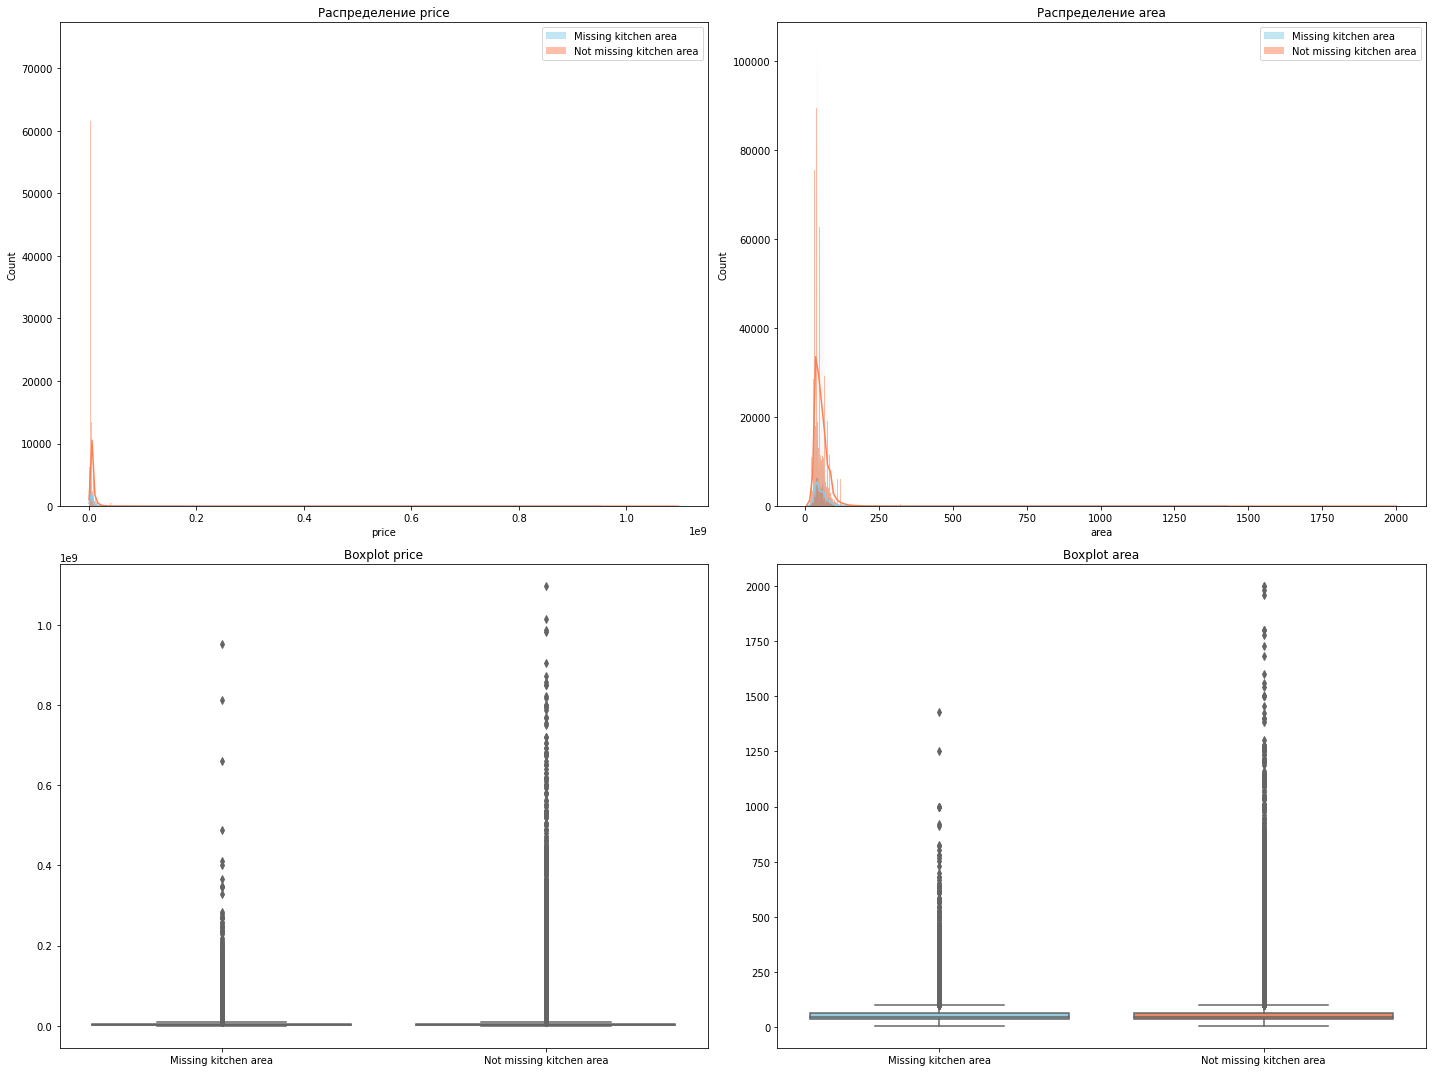

In [162]:
plt.figure(figsize=(20, 15))

# Гистограмма price
plt.subplot(2, 2, 1)
sns.histplot(df_missing['price'], kde=True, label='Missing kitchen area', color='skyblue')
sns.histplot(df_not_missing['price'], kde=True, label='Not missing kitchen area', color='coral')
plt.legend()
plt.title('Распределение price')


# Гистограмма area
plt.subplot(2, 2, 2)
sns.histplot(df_missing['area'], kde=True, label='Missing kitchen area', color='skyblue')
sns.histplot(df_not_missing['area'], kde=True, label='Not missing kitchen area', color='coral')
plt.legend()
plt.title('Распределение area')


# Boxplot price
plt.subplot(2, 2, 3)
sns.boxplot(data=[df_missing['price'], df_not_missing['price']], palette=['skyblue', 'coral'])
plt.xticks([0, 1], ['Missing kitchen area', 'Not missing kitchen area'])
plt.title('Boxplot price')


# Boxplot area
plt.subplot(2, 2, 4)
sns.boxplot(data=[df_missing['area'], df_not_missing['area']], palette=['skyblue', 'coral'])
plt.xticks([0, 1], ['Missing kitchen area', 'Not missing kitchen area'])
plt.title('Boxplot area')


plt.tight_layout()
plt.show()

По гистограммам распределения и боксплотам я также не заметила какой-то сильной разницы, разве что в размерах выборок: для датасета, в котором мы оставили только строки с пропущенными значениями площади кухни, хвост выбросов меньше и ниже частоты площадей. Для остальных параметров квартир определим насколько часто встречаются те или иные признаки в относительном отношении.

In [163]:
df_missing['reg_name'].value_counts(normalize=True)

Новосибирская область           0.189079
Краснодарский край              0.116003
Московская область              0.092205
Санкт-Петербург                 0.084547
Москва                          0.079699
                                  ...   
Камчатский край                 0.000036
Магаданская область             0.000028
Еврейская автономная область    0.000008
Сахалинская область             0.000008
Приморский край                 0.000008
Name: reg_name, Length: 82, dtype: float64

In [164]:
df_not_missing['reg_name'].value_counts(normalize=True)

Новосибирская область           0.162432
Краснодарский край              0.120775
Московская область              0.094865
Санкт-Петербург                 0.087350
Москва                          0.082948
                                  ...   
Магаданская область             0.000027
Еврейская автономная область    0.000015
Приморский край                 0.000012
Сахалинская область             0.000002
Ненецкий автономный округ       0.000001
Name: reg_name, Length: 83, dtype: float64

**Как и для данных без пропущенных значений, для df_missing по количеству объявлений лидируют Новосибирская область, Краснодарский край, Московская область, Санкт-Петербург и Москва.**

In [165]:
df_missing['building_type'].value_counts(normalize=True)

1    0.354728
3    0.346773
2    0.207875
0    0.056083
4    0.031548
5    0.002993
Name: building_type, dtype: float64

In [166]:
df_not_missing['building_type'].value_counts(normalize=True)

3    0.355698
1    0.338153
2    0.213443
0    0.056926
4    0.032721
5    0.003060
Name: building_type, dtype: float64

**В df_missing чаще всего встречают данные по панельным домам, а для второго датасета - по кирпичным, однако разница несущественная. В остальном соотношения очень похожи.** 

In [167]:
df_missing['object_type'].value_counts(normalize=True)

1    0.705644
2    0.294356
Name: object_type, dtype: float64

In [168]:
df_not_missing['object_type'].value_counts(normalize=True)

1    0.720149
2    0.279851
Name: object_type, dtype: float64

**Для df_missing доля новостроя незначительно больше доли новостроя в датасете df_not_missing, однако разница также незначительная.**

In [169]:
df_missing['rooms'].value_counts(normalize=True)

 1    0.376803
 2    0.335258
 3    0.200296
-1    0.054628
 4    0.028242
 5    0.004071
 6    0.000440
 7    0.000115
 9    0.000079
 8    0.000067
Name: rooms, dtype: float64

In [170]:
df_not_missing['rooms'].value_counts(normalize=True)

 1     3.749253e-01
 2     3.393866e-01
 3     2.013805e-01
-1     5.088184e-02
 4     2.847772e-02
 5     4.218453e-03
 6     4.487289e-04
 7     1.513832e-04
 8     6.725914e-05
 9     6.203902e-05
 10    2.007735e-07
Name: rooms, dtype: float64

**Есть небольшие расхождения и немного разный порядок, однако в целом все достаточно похожее. И в датасете df_missing нет данных по 10-ти комнатным квартирам.**

In [171]:
df_missing['level'].value_counts(normalize=True).head()

2    0.129008
1    0.122999
3    0.111758
5    0.104449
4    0.104239
Name: level, dtype: float64

In [172]:
df_not_missing['level'].value_counts(normalize=True).head()

2    0.130533
1    0.120536
3    0.112927
5    0.105318
4    0.104084
Name: level, dtype: float64

**Как и при проверке предыдущих параметров квартир - никаких закономерностей. После оценки основных статистик по describe, гистограммам распределения, боксплотам и расчету частоты встречаний можно сказать, что квартиры, по которым были утрачены данные о площади кухни, не произошли из какого-то одного региона, не соответствуют какому-то определенному ценновому сегменту, не располагаются на каком-то определенном этаже, в доме какого-то определенного типа.**

### Матрица корреляций для выявления мультиколлинеарности и факторов, оказывающих наибольшее влияние на результат.

Построим матрицу корреляций для определения признаков, оказывающих наибольшее влияние на площадь кухни. Будем использовать коэффициент корреляции Спирмена, поскольку он более устойчив к ненормальности и выбросам.

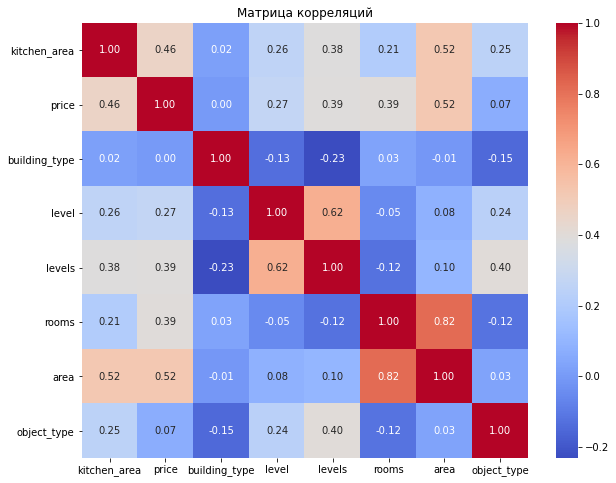

In [173]:
df_corr = df_not_missing[['kitchen_area', 'price', 'building_type', 'level', 'levels', 'rooms', 'area', 'object_type']]
correlation_matrix = df_corr.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

In [174]:
correlation_matrix

,kitchen_area,price,building_type,level,levels,rooms,area,object_type
kitchen_area,1.000000,0.456571,0.020668,0.255912,0.384621,0.211071,0.520876,0.248713
price,0.456571,1.000000,0.000722,0.269179,0.390622,0.394241,0.521153,0.067498
building_type,0.020668,0.000722,1.000000,-0.133076,-0.231154,0.029864,-0.007329,-0.147744
level,0.255912,0.269179,-0.133076,1.000000,0.620226,-0.052050,0.084834,0.237674
levels,0.384621,0.390622,-0.231154,0.620226,1.000000,-0.123247,0.103016,0.403136
rooms,0.211071,0.394241,0.029864,-0.052050,-0.123247,1.000000,0.817609,-0.117327
area,0.520876,0.521153,-0.007329,0.084834,0.103016,0.817609,1.000000,0.029812
object_type,0.248713,0.067498,-0.147744,0.237674,0.403136,-0.117327,0.029812,1.000000


**Взаимосвязь площади кухни с другими факторами**

* Как и ожидалось, заметная взаимосвязь между общей площадью и площадью кухни: 0.52.
* Также заметная связь между ценой квартиры и площадью кухни: 0.46.
* Дальше идет значение этажности здания, в котором продается квартира: 0.38.
* Слабая связь между этажом, на котором расположена квартира, и площадью кухни: 0.26.
* Слабая связь между площадью кухни и количеством комнат и рынком (новострой, вторичка): 0.21 и 0.25 соответственно.

**Взаимосвязь факторов между собой**

* Связь между ценой и общей площадью сильнее, чем связь между ценой и площадью кухни: 0.52 и 0.46 соответственно.
* Аналогично связь между общей площадью и ценой сильнее, чем между общей площадью и площадью кухни: 0.521153 и 0.520876 соответственно.
* Связь между этажом и этажностью здания выше, чем связь между этажом и площадью кухни (0.62 > 0.26) и этажностью и площадью кухни(0.62 > 0.38).
* Связь между колличеством комнат и ценой намного сильнее, чем между количеством комнат и площадью кухни: 0.82 и 0.21 соответственно. 

Наибольшее влияние на площадь кухни оказывает общая площадь квартиры и цена, однако эти признаки коррелируют между собой, поэтому нам нужно будет, скорее всего, выбрать среди них один предиктор для модели. Аналогично с этажом и этажностью: вполне логично, что они коррелируют между собой. Что касается высокой связи количества комнат и цены квартиры: скорее всего, количество комнат нам не подойдет в качестве предиктора. 

**Предварительно выберем переменные предикторы:**
* Цена
* Площадь
* Этажность здания
* Этаж квартиры
* Первичный/вторичный рынок

### Кластеризация данных по площади и цене. Создание выборочной совокупности и построение множественной линейной регрессии. Проверка допущений.

Хочется, чтобы пространственный фактор тоже как-то влиял на результат - площадь кухни, тем более, что мы определяли, что некоторые тенденции между разными регионами всё-же присутствуют. Попробуем реализовать самый простой, но действенный алгоритм кластеризации: алгоритм К-средних. Я хочу по данным, по которым площадь кухни известна: df_not_missing составить кластеры по средней площади площади кухни. Потом для данных, по которым площадь кухни неизвестна: df_missing каждому объявлению по их названию региона сопоставить определенный кластер и далее использовать это при построении модели.

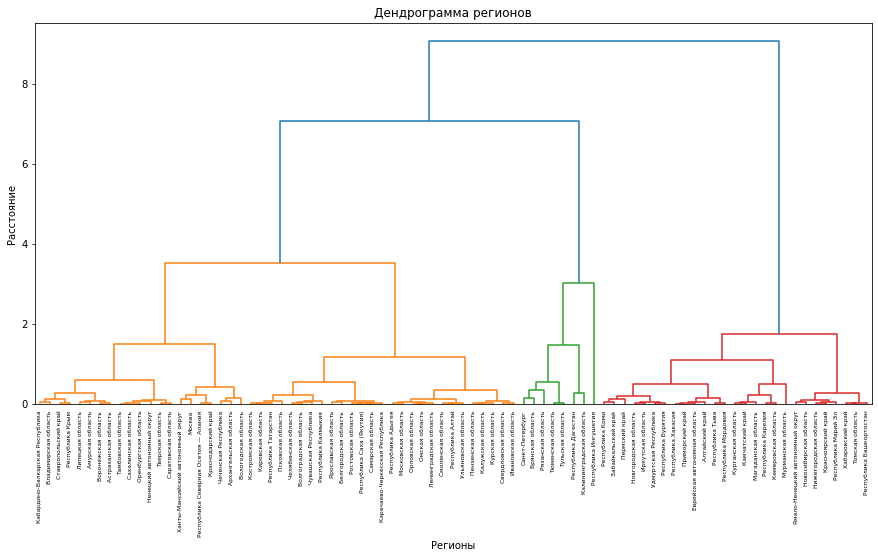

In [180]:
# Группировка по регионам и вычисление средних цен и площадей
grouped = df_not_missing.groupby('reg_name')[['kitchen_area']].mean()

# Масштабирование данных
scaler = StandardScaler()
grouped_scaled = scaler.fit_transform(grouped)

# Иерархическая кластеризация
linked = linkage(grouped_scaled, 'ward')

# Построение дендрограммы
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', labels=grouped.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Дендрограмма регионов')
plt.xlabel('Регионы')
plt.ylabel('Расстояние')
plt.show()

In [181]:
# Кластеризация с использованием расстояния до 1
clusters = fcluster(linked, t=2, criterion='distance')

grouped['cluster'] = clusters

df = df.merge(grouped[['cluster']], on='reg_name', how='left')

In [182]:
df['cluster'].value_counts()

4    1748200
1    1529136
5    1278768
2     676204
3        714
Name: cluster, dtype: int64

Таким образом, мы сформировали 5 кластеров регионов по средней площади кухни. Возможно это поможет нам в дальнейшей работе. Теперь сформируем выборочную совокупность, на основе которой мы будем строить и обучать модель; главная причина использования выборки - моя нервная система и технические возможности моего ноутбука - мы оба не справились. Чтобы сохранить пропорции между регионами, я решила сформировать типическую 5% выборку.

In [183]:
df_not_missing = df[df['kitchen_area'].isnull() == False]
df_missing = df[df['kitchen_area'].isnull() == True]

In [184]:
region_proportions = df_not_missing['reg_name'].value_counts(normalize=True).head()

sample_size = int(len(df_not_missing) * 0.05)

df_sample = df_not_missing.groupby('reg_name', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=21))

sample_proportions = df_sample['reg_name'].value_counts(normalize=True).head()
print('Пропорции регионов в исходном DataFrame:', region_proportions)
print('Пропорции регионов в выборке:', sample_proportions)

Пропорции регионов в исходном DataFrame: Новосибирская область    0.162432
Краснодарский край       0.120775
Московская область       0.094865
Санкт-Петербург          0.087350
Москва                   0.082948
Name: reg_name, dtype: float64
Пропорции регионов в выборке: Новосибирская область    0.162430
Краснодарский край       0.120773
Московская область       0.094865
Санкт-Петербург          0.087348
Москва                   0.082948
Name: reg_name, dtype: float64


In [185]:
df_sample['reg_name'].shape[0]

249037

**И начнем с построения обычной линейной регрессии - это будет наше baseline решение.**

In [186]:
X = df_sample[['area', 'price', 'levels', 'object_type', 'cluster']]
y = df_sample['kitchen_area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

linnear_model = sm.OLS(y_train, X_train).fit()
y_pred = linnear_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-квадрат на тестовой выборке: {r2:.4f}")
print(linnear_model.summary()) 

R-квадрат на тестовой выборке: 0.3620
                            OLS Regression Results                            
Dep. Variable:           kitchen_area   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 2.077e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:12:43   Log-Likelihood:            -5.8930e+05
No. Observations:              199229   AIC:                         1.179e+06
Df Residuals:                  199223   BIC:                         1.179e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       

R^2 на тестовой выборке: 0,36. Не так плохо, как могло быть, но все же для предсказания стоит попробовать улучшить модель. Проверим, выполняются ли основные допущения для построения линейной модели и исходя из этого уже будем предлагать пути решения.

**Проверка допущений для построения линейной регрессии**

_Линейность взаимосвязи: scatterplots для площади кухни и каждой непрерывной предикторной переменной_

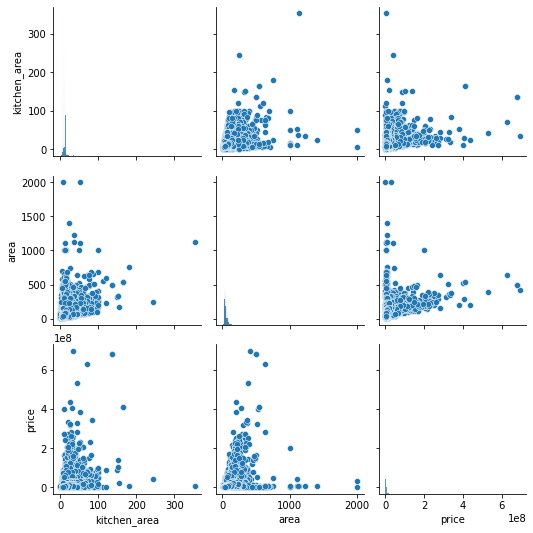

In [187]:
# 1. Линейность: 

sns.pairplot(data=df_sample[['kitchen_area', 'area', 'price']]) 

Комментарии здесь не требуются.

In [188]:
residuals = y_train - linnear_model.predict(X_train)

_Независимость: Тест Дарбина-Уотсона (для автокорреляции)_

In [189]:
dw = sm.stats.stattools.durbin_watson(residuals)
print(f"Статистика теста Дарбина-Уотсона: {dw:.2f}")

Статистика теста Дарбина-Уотсона: 2.00


**Статистика Дарбина-Уотсона (DW) близкая к 2.00 указывает на отсутствие автокорреляции первого порядка в остатках регрессионной модели.**

_Гомоскедастичность остатков_

In [190]:
print("\nТест Бреуша-Пагана:")
name = ['Lagrange multiplier statistic', 'p-value', 'f-statistic', 'f p-value']
test = sms.het_breuschpagan(linnear_model.resid, X_train)
print(dict(zip(name, test)))


Тест Бреуша-Пагана:
{'Lagrange multiplier statistic': 25228.63460413994, 'p-value': 0.0, 'f-statistic': 5777.142203472818, 'f p-value': 0.0}


R-квадрат на тестовой выборке: 0.3620


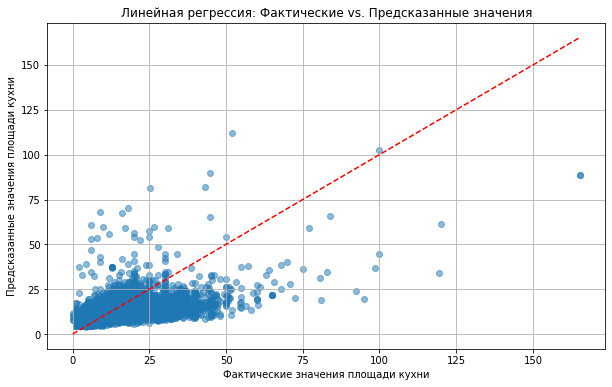

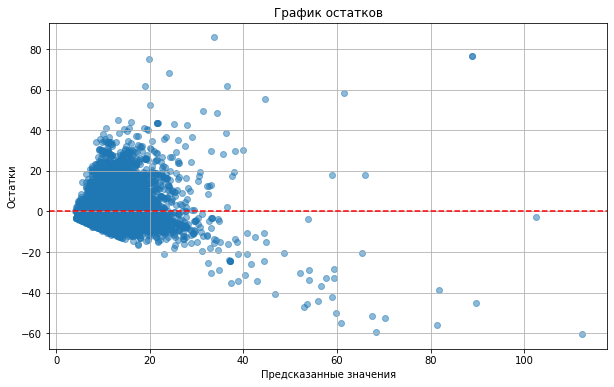

In [191]:
y_pred = linnear_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-квадрат на тестовой выборке: {r2:.4f}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Line of perfect prediction
plt.xlabel("Фактические значения площади кухни")
plt.ylabel("Предсказанные значения площади кухни")
plt.title("Линейная регрессия: Фактические vs. Предсказанные значения")
plt.grid(True)
plt.show()

# График остатков
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.grid(True)
plt.show()

**Тест и визуальный анализ говорят о гетероскедастичности остатков нашей модели: они распределены неравномерно.**

_Нормальность_

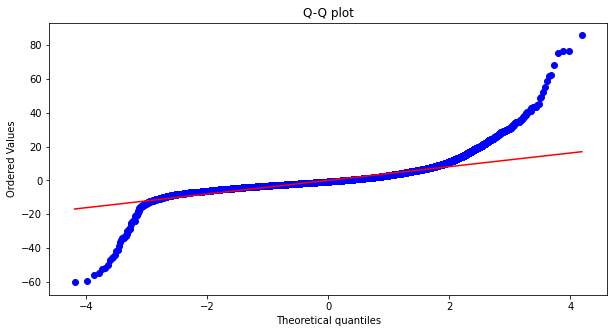

In [192]:
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()

**QQ-plot демонстрирует, что у нашего распределения более тяжелые хвосты, чем у нормального: это происходит из-за того, что у нас меньше минимальных значений и больше максимальных, чем предполагает нормальное распределение.**

Таким образом, у нас не выполняются следущие допущения построения линеной модели: 

   * Линейность взаимосвязи 
   * Гомоскедастичность остатков
   * Нормальность распределения остатков

Попробуем что-то сделать с этим в рамках линейной модели. 

**Преобразование непрерывных переменных: логарифмирование, преобразование Бокса-Кокса. Возможно, это сделает их распределение больше похожим на нормальное, а так же повлияет на разброс остатков нашей модели.**

_Логарифмирование_

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_log = np.log1p(X_train) 
X_test_log = np.log1p(X_test)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Построение модели (пример для логарифмического преобразования)
X_train_log = sm.add_constant(X_train_log)
X_test_log = sm.add_constant(X_test_log)
model_log = sm.OLS(y_train_log, X_train_log).fit()
y_pred_log = model_log.predict(X_test_log)
r2_log = r2_score(y_test_log, y_pred_log)
print(f"R-квадрат (логарифмическое преобразование): {r2_log:.4f}")

# Для логарифмического преобразования:
y_pred_log_inv = np.expm1(y_pred_log) 
y_test_log_inv = np.expm1(y_test_log)
r2_log_inv = r2_score(y_test_log_inv, y_pred_log_inv)
print(f"R-квадрат (логарифмическое преобразование, обратное): {r2_log_inv:.4f}")

R-квадрат (логарифмическое преобразование): 0.4244
R-квадрат (логарифмическое преобразование, обратное): 0.3641


_Бокса-Кокса_

In [194]:
boxcox_func = lambda x, lmbd: (x**lmbd - 1) / lmbd if lmbd != 0 else log(x)

In [195]:
inverse_boxcox_func = lambda x, lmbd: (1 + lmbd*x)**(1/lmbd) if lmbd != 0 else exp(x)

Y = 897987     11.0
448876      4.0
3131846     8.4
1296895     9.0
1289213     5.4
           ... 
2498186    11.2
534710     11.9
1634499     6.0
2427120    13.0
1914718     8.0
Name: kitchen_area, Length: 249037, dtype: float64

lmax_pearsonr_Y = 0.1398448485481212	 lmax_mle_Y = 0.12146598900125292

Y_boxcox = [2.78362768 1.50984836 2.42863219 ... 2.00168598 3.0094488  2.36563596]

Y_boxcox1 = 897987     2.783628
448876     1.509848
3131846    2.428632
1296895    2.518353
1289213    1.871543
             ...   
2498186    2.807765
534710     2.889366
1634499    2.001686
2427120    3.009449
1914718    2.365636
Name: kitchen_area, Length: 249037, dtype: float64

Y_inverse_boxcox = [11.   4.   8.4 ...  6.  13.   8. ]



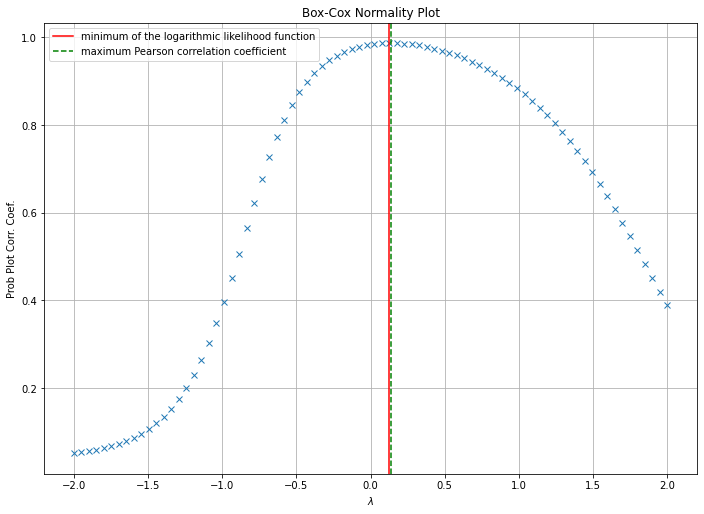

In [196]:
data = y
print(f"Y = {y}\n")

# Определяем оптимальный параметр преобразования Бокса-Кокса
lmax_pearsonr_Y, lmax_mle_Y = stats.boxcox_normmax(data, method='all')    
print(f"lmax_pearsonr_Y = {lmax_pearsonr_Y}\t lmax_mle_Y = {lmax_mle_Y}\n")

# Выполняем преобразование Бокса-Кокса
Y_boxcox = stats.boxcox(data, lmbda=lmax_mle_Y)
print(f"Y_boxcox = {Y_boxcox}\n")

# Проверяем преобразование Бокса-Кокса
Y_boxcox1 = boxcox_func(y, lmax_mle_Y) 
print(f"Y_boxcox1 = {Y_boxcox1}\n")

# Проверяем обратное преобразование
Y_inverse_boxcox = inverse_boxcox_func(Y_boxcox, lmax_mle_Y)
print(f"Y_inverse_boxcox = {Y_inverse_boxcox}\n")

# Построим график преобразования Бокса-Кокса
fig, axes = plt.subplots(figsize=(11.7, 8.3))
stats.boxcox_normplot(data, -2, 2, plot=axes)
axes.axvline(lmax_mle_Y, color='r', label='minimum of the logarithmic likelihood function')
axes.axvline(lmax_pearsonr_Y, color='g', ls='--', label='maximum Pearson correlation coefficient')
axes.grid(True)
axes.legend()
plt.show()

In [197]:
# Колмогоров-Смирнов тест для нормальности
ks_statistic, ks_p_value = stats.kstest(Y_boxcox, 'norm')
print(f'Колмогоров-Смирнов тест: Statistics={ks_statistic}, p-value={ks_p_value}')

Колмогоров-Смирнов тест: Statistics=0.9264893962985831, p-value=0.0


In [198]:
# Тест Д’Агостино и Пирсона
k2, p = stats.normaltest(Y_boxcox)
print(f'Тест Д’Агостино и Пирсона: Statistics={k2}, p-value={p}')

Тест Д’Агостино и Пирсона: Statistics=14311.772061812064, p-value=0.0


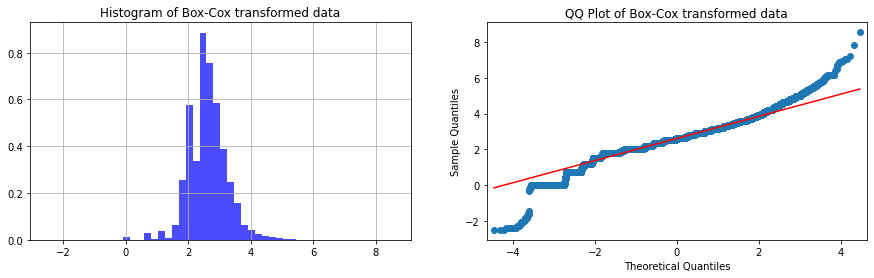

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Гистограмма
axes[0].hist(Y_boxcox, bins=50, alpha=0.7, color='blue', density=True)
axes[0].set_title('Histogram of Box-Cox transformed data')
axes[0].grid(True)

# QQ-Plot
sm.qqplot(Y_boxcox, line='s', ax=axes[1])
axes[1].set_title('QQ Plot of Box-Cox transformed data')

plt.show()

Несмотря на преобразование Бокса-Кокса зависимой переменной, ее распределение не удалось привести к нормальному виду. Вероятнее всего, дело в природе данных и аномальных значений, которые мы решили сохранить. Тем не менее, попробуем оценить качество модели после преобразования. 

In [200]:
X = df_sample[['area', 'price', 'levels', 'object_type', 'cluster']]
y = Y_boxcox

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Сброс индексов 
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Добавление константы и построение модели
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

linnear_model_bc = sm.OLS(y_train, X_train).fit()
y_pred = linnear_model_bc.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-квадрат на тестовой выборке: {r2:.4f}")
print(linnear_model_bc.summary())

R-квадрат на тестовой выборке: 0.3376
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                 1.973e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:20:16   Log-Likelihood:            -1.4752e+05
No. Observations:              199229   AIC:                         2.950e+05
Df Residuals:                  199223   BIC:                         2.951e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       

R^2 стал еще ниже. Теперь попробуем применить к модели регуляризацию с целью управлением мультиколлинеарности и снижением вероятности переобучения модели.

In [201]:
# Выбор переменных
X = df_sample[['area', 'price', 'levels', 'object_type', 'cluster']]
y = df_sample['kitchen_area']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge R-квадрат на тестовой выборке: {ridge_r2:.4f}")

# Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso R-квадрат на тестовой выборке: {lasso_r2:.4f}")

Ridge R-квадрат на тестовой выборке: 0.3620
Lasso R-квадрат на тестовой выборке: 0.3459


Регуляризация по Риджу и по Лассо так же не сильно исправила ситуацию. В целом, даже по графикам рассеяния было заметно, что наши данные достаточно сложные и простая линейная регрессия не будет достаточно хорошо описывать их. Попробуем использовать алгоритм случайного леса - возможно, модель, построенная с использованием этого метода, даст более высокую прогнозную силу. 

### Случайный лес

Перед построением модели с использование малгоритма Случайного леса немного поработаем с нашими данными. Попробуем добавить несколько своих признаков, а также закодировать категориальные признаки. 

In [204]:
df_sample['area_per_room'] = df_sample['area'] / df_sample['rooms'] # новый признак
df_sample['area_per_room'] = abs(df_sample['area_per_room']) # из-за rooms=-1

In [205]:
label_encoder = LabelEncoder()
df_sample['object_type_encoded'] = label_encoder.fit_transform(df_sample['object_type'])
df_sample['building_type_encoded'] = label_encoder.fit_transform(df_sample['building_type'])

In [206]:
# Исходные данные
X = df_sample[['area', 'price', 'rooms', 'area_per_room', 'levels', 'object_type_encoded', 'building_type_encoded', 'cluster']]
y = df_sample['kitchen_area']

# Определение числовых столбцов
numerical_cols = ['area', 'price', 'rooms', 'area_per_room', 'levels']

# Масштабируем числовые признаки
scaler = StandardScaler()
X_scaled_num = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), columns=numerical_cols, index=X.index)

# Объединяем числовые и 'уже закодированные' категориальные признаки
X_final = pd.concat([X_scaled_num, X[['object_type_encoded', 'building_type_encoded', 'cluster']]], axis=1)

# Проверяем размеры данных
print("Размер X_final:", X_final.shape)
print("Размер y:", y.shape)

# Разделение данных на обучающую и тестовую выборки
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
model_random_forest.fit(X_train_rf, y_train_rf)

# Оценка модели
print(f'R-квадрат (обучающая выборка): {model_random_forest.score(X_train_rf, y_train_rf):.4f}')
y_pred_rf = model_random_forest.predict(X_test_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)
print(f'R-квадрат (тестовая выборка): {r2_rf:.4f}') 

Размер X_final: (249037, 8)
Размер y: (249037,)
R-квадрат (обучающая выборка): 0.9163
R-квадрат (тестовая выборка): 0.5243


На тренировочной выборке R^2 достаточно неплохой: 0.91, однако на тестовой он "проваливается": 0.52. Очевидно, что наша модель переобучилась. Тем не менее, пока что это лучшее, из того что у нас было, поэтому дальше продолжим работу в этом направлении.

### LightGBM 

Этот метод также основан на деревьях решений, но он намного лучше работает на больших наборах данных, что возможно (немного) спасет нам жизнь. 

In [207]:
# Данные для модели
X = df_sample[['area', 'price', 'rooms', 'area_per_room', 'levels', 'object_type_encoded', 'building_type_encoded', 'cluster']]
y = df_sample['kitchen_area']

# Разделение на обучающую и тестовую выборки
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание обучающих данных для LightGBM
train_data = lgb.Dataset(X_train_lgb, label=y_train_lgb)
test_data = lgb.Dataset(X_test_lgb, label=y_test_lgb, reference=train_data)

# Параметры LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31
}

# Обучение модели
model_lgb = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=100
)

# Предсказание на тестовых данных
y_pred_lgb = model_lgb.predict(X_test_lgb, num_iteration=model_lgb.best_iteration)

# Оценка RMSE
rmse_lgb = mean_squared_error(y_test_lgb, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_test_lgb, y_pred_lgb)

print(f'RMSE: {rmse_lgb}')
print(f'R^2: {r2_lgb}')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 199229, number of used features: 8
[LightGBM] [Info] Start training from score 10.652635
[1]	training's rmse: 5.49325	valid_1's rmse: 5.39553
[2]	training's rmse: 5.27727	valid_1's rmse: 5.176
[3]	training's rmse: 5.09123	valid_1's rmse: 4.98398
[4]	training's rmse: 4.93538	valid_1's rmse: 4.8239
[5]	training's rmse: 4.80321	valid_1's rmse: 4.68834
[6]	training's rmse: 4.68772	valid_1's rmse: 4.57046
[7]	training's rmse: 4.59292	valid_1's rmse: 4.47347
[8]	training's rmse: 4.51126	valid_1's rmse: 4.38971
[9]	training's rmse: 4.44243	valid_1's rmse: 4.31888
[10]	training's rmse: 4.38311	valid_1's rmse: 4.25761
[11]	training's rmse: 4.33247	valid_1's rmse: 4.20625
[12]	training's rmse: 4.28914	valid_1's rmse: 4.16426
[13]	training's rms

Эта модель на тестовой выборке демонстрирует R^2 = 0,54. Попробуем преобразовать наши данные: так как лучше всего на наши данные для линейной модели подействовало логарифмирование, то начнем с него. 

#### LightGBM с логарифмическим преобразованием переменных 

In [208]:
# Данные для модели
X = df_sample[['area', 'price', 'rooms', 'area_per_room', 'levels', 'object_type_encoded', 'building_type_encoded', 'cluster']]
y = df_sample['kitchen_area']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логарифмирование данных
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Создание обучающих данных для LightGBM с логарифмированными данными
train_data_log = lgb.Dataset(X_train_log, label=y_train_log)
test_data_log = lgb.Dataset(X_test_log, label=y_test_log, reference=train_data_log)

# Параметры LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31
}

# Обучение модели
model_lgb_log = lgb.train(
    params,
    train_data_log,
    valid_sets=[train_data_log, test_data_log],
    num_boost_round=100
)

# Предсказание на тестовых данных
y_pred_log = model_lgb_log.predict(X_test_log, num_iteration=model_lgb_log.best_iteration)

# Оценка RMSE и R^2 на логарифмической шкале
rmse_log = mean_squared_error(y_test_log, y_pred_log, squared=False)
r2_log = r2_score(y_test_log, y_pred_log)

print(f'RMSE (логарифмическое преобразование): {rmse_log}')
print(f'R^2 (логарифмическое преобразование): {r2_log}')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 199229, number of used features: 8
[LightGBM] [Info] Start training from score 2.364738
[1]	training's rmse: 0.395206	valid_1's rmse: 0.393929
[2]	training's rmse: 0.374858	valid_1's rmse: 0.373677
[3]	training's rmse: 0.35751	valid_1's rmse: 0.35638
[4]	training's rmse: 0.342734	valid_1's rmse: 0.34161
[5]	training's rmse: 0.329885	valid_1's rmse: 0.328817
[6]	training's rmse: 0.318815	valid_1's rmse: 0.317736
[7]	training's rmse: 0.309536	valid_1's rmse: 0.3085
[8]	training's rmse: 0.301528	valid_1's rmse: 0.300471
[9]	training's rmse: 0.29484	valid_1's rmse: 0.293756
[10]	training's rmse: 0.28911	valid_1's rmse: 0.288029
[11]	training's rmse: 0.28427	valid_1's rmse: 0.

Теперь R^2 на тестовой выборке 0,64. Посмотрим на важность признаков, включенных в модель: возможно нам стоит что-то удалить и/или добавить новый признак. 

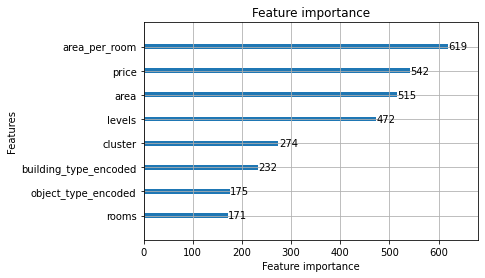

In [209]:
lgb.plot_importance(model_lgb_log, max_num_features=10)
plt.show()

Добавленный нами признак с площадью комнаты оказался наиболее важным, а слабже всего на результат влияет параметр количества комнат, тип здания и тип рынка. Попробуем добавить дополнительный признак: стоимость квадратного метра.

In [210]:
df_sample['price_per_metre'] = df_sample['price'] / df_sample['area'] 
df['price_per_metre'] = df['price'] / df['area'] 
df_missing['price_per_metre'] = df_missing['price'] / df_missing['area'] 
df_not_missing['price_per_metre'] = df_not_missing['price'] / df_not_missing['area'] 

In [211]:
X = df_sample[['area', 'area_per_room', 'price_per_metre', 'levels', 'object_type_encoded', 'building_type_encoded', 'cluster']]
y = df_sample['kitchen_area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

train_data_log = lgb.Dataset(X_train_log, label=y_train_log)
test_data_log = lgb.Dataset(X_test_log, label=y_test_log, reference=train_data_log)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 80,
    'max_depth': 10,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf': 20,  
    'lambda_l1': 0.1,        
    'lambda_l2': 0.1,        
    'min_gain_to_split': 0.02, 
    'subsample_for_bin': 200000 
}

# Обучение модели с новыми параметрами
model_lgb_log = lgb.train(
    params,
    train_data_log,
    valid_sets=[train_data_log, test_data_log],
    num_boost_round=500
)

# Предсказание на тестовых данных
y_pred_log = model_lgb_log.predict(X_test_log, num_iteration=model_lgb_log.best_iteration)

# Оценка RMSE и R^2 на логарифмической шкале
rmse_log = mean_squared_error(y_test_log, y_pred_log, squared=False)
r2_log = r2_score(y_test_log, y_pred_log)

print(f'RMSE (логарифмическое преобразование): {rmse_log}')
print(f'R^2 (логарифмическое преобразование): {r2_log}')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 199229, number of used features: 7
[LightGBM] [Info] Start training from score 2.364738
[1]	training's rmse: 0.406523	valid_1's rmse: 0.405159
[2]	training's rmse: 0.399203	valid_1's rmse: 0.397837
[3]	training's rmse: 0.392412	valid_1's rmse: 0.39105
[4]	training's rmse: 0.386223	valid_1's rmse: 0.384865
[5]	training's rmse: 0.376626	valid_1's rmse: 0.375313
[6]	training's rmse: 0.367091	valid_1's rmse: 0.365785
[7]	training's rmse: 0.362022	valid_1's rmse: 0.360712
[8]	training's rmse: 0.353522	valid_1's rmse: 0.352224
[9]	training's rmse: 0.34567	valid_1's rmse: 0.344405
[10]	training's rmse: 0.338419	valid_1's rmse: 0.337198
[11]	training's rmse: 0.331777	valid_1's rmse: 0.330579
[12]	training's rmse: 0.325639	valid_1's rmse: 0.32

R^2 совсем чуть изменился, но несущественно. Поэтому работаем с тем, что есть дальше: привлечем больше данных для нашей модели.

#### Расширение выборки для дообучения модели

In [212]:
# датасет с квартирами без пропусков и со строками, которые наша модель еще не видела 
df_sample_control = df_not_missing[~df_not_missing.index.isin(df_sample.index)]

In [213]:
df_sample_control['area_per_room'] = df_sample_control['area'] / df_sample_control['rooms'] 
df_sample_control['area_per_room'] = abs(df_sample_control['area_per_room'])

In [214]:
df_sample_control['object_type_encoded'] = label_encoder.fit_transform(df_sample_control['object_type'])
df_sample_control['building_type_encoded'] = label_encoder.fit_transform(df_sample_control['building_type'])

In [215]:
# Данные для модели с новой выборки
X_control = df_sample_control[['area', 'area_per_room', 'rooms',  'price_per_metre', 'levels', 'object_type_encoded', 'building_type_encoded', 'cluster']]
y_control = df_sample_control['kitchen_area']

# Разделение на обучающую и тестовую выборки для новой выборки
X_train_control, X_test_control, y_train_control, y_test_control = train_test_split(X_control, y_control, test_size=0.2, random_state=42)

# Логарифмирование данных для новой выборки
X_train_control_log = np.log1p(X_train_control)
X_test_control_log = np.log1p(X_test_control)
y_train_control_log = np.log1p(y_train_control)
y_test_control_log = np.log1p(y_test_control)

# Создание обучающих данных для LightGBM с логарифмированными данными для новой выборки
train_data_control_log = lgb.Dataset(X_train_control_log, label=y_train_control_log)
test_data_control_log = lgb.Dataset(X_test_control_log, label=y_test_control_log, reference=train_data_control_log)

# Обучение модели на новой выборке
model_lgb_control_log = lgb.train(
    params,
    train_data_control_log,
    valid_sets=[train_data_control_log, test_data_control_log],
    num_boost_round=100
)

# Предсказание на тестовых данных новой выборки
y_pred_control_log = model_lgb_control_log.predict(X_test_control_log, num_iteration=model_lgb_control_log.best_iteration)

# Оценка RMSE и R^2 на логарифмической шкале для новой выборки
rmse_control_log = mean_squared_error(y_test_control_log, y_pred_control_log, squared=False)
r2_control_log = r2_score(y_test_control_log, y_pred_control_log)

print(f'RMSE (логарифмическое преобразование) на контрольной выборке: {rmse_control_log}')
print(f'R^2 (логарифмическое преобразование) на контрольной выборке: {r2_control_log}')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 3785359, number of used features: 8
[LightGBM] [Info] Start training from score 2.364326
[1]	training's rmse: 0.405905	valid_1's rmse: 0.406186
[2]	training's rmse: 0.398673	valid_1's rmse: 0.398941
[3]	training's rmse: 0.38764	valid_1's rmse: 0.387898
[4]	training's rmse: 0.377397	valid_1's rmse: 0.37765
[5]	training's rmse: 0.367847	valid_1's rmse: 0.368092
[6]	training's rmse: 0.359105	valid_1's rmse: 0.35935
[7]	training's rmse: 0.350831	valid_1's rmse: 0.351068
[8]	training's rmse: 0.343168	valid_1's rmse: 0.343401
[9]	training's rmse: 0.338626	valid_1's rmse: 0.33885
[10]	training's rmse: 0.331855	valid_1's rmse: 0.332078
[11]	training's rmse: 0.325559	valid_1's rms

При расширении выборки на новые даные получили R^2 = 0,65, что не сильно отличается от наших предыдущих результатов. Это все, что у меня получилось сделать для улучшения качества модели. Это все было очень интересно, но заполнила пропуски я совершенно по-другому :)

### Мое решение в заполнении пропусков 

Финальное качество модели, которая была выбрана мною как лучшая, не такое уж и плохое, однако наши данные действительно достаточно сложные для задачи прогнозирования. В таком случае можно применить другой нестандартный подход, используя не построение модели, а заполнение внутригрупповым значением. 

1. Сгруппируем наблюдения, для которых нет пропусков в данных, по региону и типу дома. Это именно те признаки, которые могут наиболее сильно влиять на площадь кухни, поскольку в домах разного типа площадь кухни разная.
2. Для каждого варианта рассчитаем медианную долю кухни в общей площади. Я выбрала именно долю, потому что это позволит лаконичнее заполнить пропуски, избегая одинаковых значений.
3. Заполним пропуски. 

Я сторонник того, что если задачу можно решить простым путем - нужно решать простым путем. В нашем случае мы все равно не сможем "угадать" истинную площадь кухни, а предложенный подход помогает учесть самые главные нюансы, которые могут на нее повлиять. 

In [218]:
df_not_missing['kitchen_area_share'] = df_not_missing['kitchen_area'] / df_not_missing['area']

In [219]:
# Группируем df_not_missing по региону и типу дома и рассчитываем медианную долю площади кухни
median_share_by_group = df_not_missing.groupby(['reg_name', 'building_type'])['kitchen_area_share'].median()

In [220]:
# Функция для заполнения пропусков в df_missing

def fill_missing_kitchen_area(row):
    if pd.isna(row['kitchen_area']):  
        reg_name = row['reg_name']
        building_type = row['building_type']
        area = row['area'] 
        
        try:
            median_share = median_share_by_group[(reg_name, building_type)]
            kitchen_area_filled = area * median_share
            return kitchen_area_filled
        except KeyError:
            return np.nan
    else:
        return row['kitchen_area']  

In [221]:
# Применяем функцию для заполнения пропусков в df_missing

df_missing['kitchen_area_filled'] = df_missing.apply(fill_missing_kitchen_area, axis=1)

In [222]:
# Проверяем, сколько пропусков удалось заполнить

print(f"Количество пропусков в kitchen_area до заполнения: {df_missing['kitchen_area'].isnull().sum()}")
print(f"Количество пропусков в kitchen_area_filled после заполнения: {df_missing['kitchen_area_filled'].isnull().sum()}")

Количество пропусков в kitchen_area до заполнения: 252286
Количество пропусков в kitchen_area_filled после заполнения: 0


In [223]:
df_missing['kitchen_area'] = df_missing['kitchen_area_filled']
df_missing.drop('kitchen_area_filled', axis=1, inplace=True)

Небольшая проверочка на адекватность. 

In [224]:
df_missing.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing,cluster,price_per_metre
0,1650000,2018-03-16,2843,3,5,5,2,51.0,11.156250,1,2843,Краснодарский край,1,5,32352.941176
1,4400000,2018-04-14,81,3,11,14,2,54.0,9.310345,1,81,Московская область,1,4,81481.481481
2,2980000,2018-06-04,4417,1,7,9,2,52.0,8.320000,1,4417,Республика Коми,1,1,57307.692308
3,2900000,2018-07-12,81,3,2,9,1,37.5,6.465517,1,81,Московская область,1,4,77333.333333
4,1800000,2018-08-31,81,4,3,3,2,57.0,10.227492,2,81,Московская область,1,4,31578.947368


In [225]:
df_missing[df_missing['area'] < df_missing['kitchen_area']]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing,cluster,price_per_metre


In [226]:
df_missing[df_missing['area'] == df_missing['kitchen_area']]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing,cluster,price_per_metre


In [227]:
df_missing[df_missing['kitchen_area'] < 0] 

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,kitchen_area_missing,cluster,price_per_metre


In [234]:
df_not_missing = df_not_missing.drop('kitchen_area_share', axis=1)

In [235]:
df_missing.columns == df_not_missing.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [236]:
df = pd.concat([df_missing, df_not_missing], ignore_index=True)

In [237]:
df.duplicated().sum()

27

In [238]:
df = df.drop_duplicates()

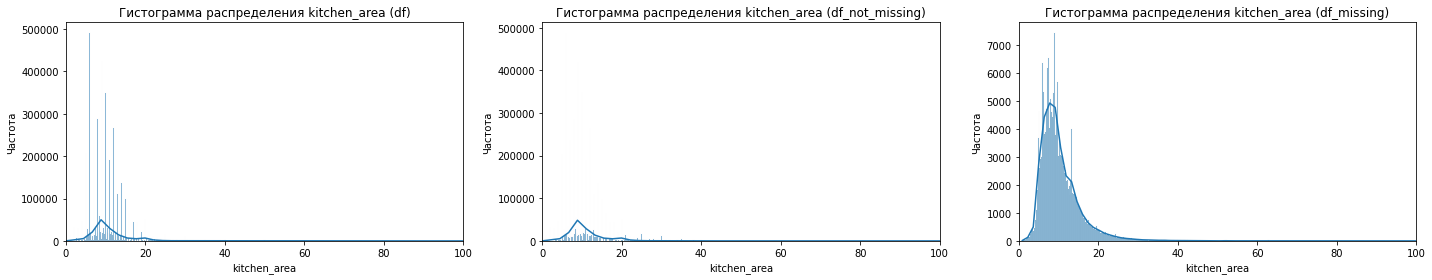

In [239]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['kitchen_area'], kde=True)
plt.title('Гистограмма распределения kitchen_area (df)')
plt.xlabel('kitchen_area')
plt.xlim(0, 100)
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.histplot(df_not_missing['kitchen_area'], kde=True)
plt.title('Гистограмма распределения kitchen_area (df_not_missing)')
plt.xlabel('kitchen_area')
plt.xlim(0, 100)
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
sns.histplot(df_missing['kitchen_area'], kde=True)
plt.title('Гистограмма распределения kitchen_area (df_missing)')
plt.xlabel('kitchen_area')
plt.xlim(0, 100)
plt.ylabel('Частота')

plt.tight_layout()  
plt.show()

In [240]:
df.to_csv('realty_ready.csv', index=False)

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="8"></a> 
    <h1 style="color: darkblue;">Выводы по заполнению пропусков по полю kitchen_area:</h1
</div> <a class="anchor" id="8"></a> 

* Для начала мы проверили датасет с пропущенными значениями по полю с площадью кухни на какие-то закономерности: общий регион, другие параметры квартиры, однако ничего обнаружено не было. 

* При построении матрицы корреляции мы определили, что наиболее тесная линейная связь присутствовала между площадью кухни и: ценой, площадью, этажностью здания, этажом квартиры и типом рынка. 

* Мы классифицировали регионы по площади кухни на той части датасета, по которой площадь кухни известна. Добавили в датасет новый параметр cluster, который обозначает, в какой кластер по площади кухни попадает регион нашей квартиры. 

* Сформировали типическую выборку. Построили линейную модель и проверили допущения. Не выполняются: линейность, гомоскедастичность остатков, нормальность. 

* Лучше всего улучшило качество модели логарифмическое преобразование непрерывных переменных. Преобразование Бокса-Кокса не оказало эффекта.

* Построили некоторые модели, устойчивые к нарушению допущений линейной регрессии: GAM, RandomForest, LightGBM. В конечном итоге заполнили пропуски, сгруппировав наблюдения по кластеру региона и типу здания, рассчитав для каждой группы медианную долю площади кухни в общей. Для наблюдений, у которых отсутствует площадь кухни, в зависимости от группы, к которому оно принадлежит, определили долю кухни в общей и посчитали саму площадь кухни. 


[Вернуться к навигации](#2)

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="9"></a> 
    <h1 style="color: darkblue;">Исследование рынка недвижимости в РФ за представленный период</h1>
</div> <a class="anchor" id="9"></a> 

In [65]:
df = pd.read_csv('realty_ready.csv')

Теперь мы можем приступать непосредственно к анализу рынка недвижимости. Первым этапом будет исследование рынка в разрезе цены за квадратный метр. 

`1.` Описание рынка: Статистические характеристики цен за квадратный метр в разрезе различных параметров: типов зданий, типа рынка, количества комнат, этажа и этажности. 

`2.` Определение факторов, оказывающих наибольшее влияние на цену квадратного метра. 

`3.` Пространственный анализ: определение тенденций в ценообразовании за квадратный метр, связанных с географическим положением (регионом).

`4.` Формулировка выводов. 

#### Распределение цен за квадратный метр по всему датасету

Для начала визуализируем распределение цен за квадартный метр, чтобы лучше понимать природу наших данных.

In [6]:
# расчет статистик
mean_price = df['price_per_metre'].mean()
median_price = df['price_per_metre'].median()
p25 = df['price_per_metre'].quantile(0.25)
p75 = df['price_per_metre'].quantile(0.75)
p99 = df['price_per_metre'].quantile(0.99)
p90 = df['price_per_metre'].quantile(0.90)
min_price = df['price_per_metre'].min()
max_price = df['price_per_metre'].max()

print(f'Средняя цена: {mean_price}')
print(f'Медианная цена: {median_price}')
print(f'25% процентиль (p25): {p25}')
print(f'75% процентиль (p75): {p75}')
print(f'90% процентиль (p90): {p90}')
print(f'99% процентиль (p99): {p99}')
print(f'Минимальная цена: {min_price}')
print(f'Максимальная цена: {max_price}')

Средняя цена: 79839.43744335507
Медианная цена: 62068.96551724138
25% процентиль (p25): 44339.62264150944
75% процентиль (p75): 93300.0
90% процентиль (p90): 148230.08849557518
99% процентиль (p99): 303000.0
Минимальная цена: 100.0
Максимальная цена: 13492608.59375


`1.` **Средняя и медианная цены:**
   - Средняя цена (79839.44 рублей) выше медианной (62068.97 рублей), что указывает на асимметрию в распределении с длинным "хвостом" вправо. Это говорит о наличии небольшого числа объектов с очень высокой стоимостью, которые влияют среднее. Мы видели такие квартиры на этапе знакомства с данными и обработке выбросов. 

`2.` **Персентили:**
   - 25% процентиль = 44339.62 рублей: четверть объектов стоит дешевле этой стоимости, а 75% процентиль = 93300.0 рублей, что означает, что четверть объектов стоит дороже. Разброс между этими значениями (приблизительно 49000) говорит о значительном диапазоне цен в средней части распределения.
   - 90% процентиль (148230.09) и особенно 99% процентиль (303000.0) подчеркивают наличие премиального сегмента недвижимости с очень высокими ценами. Такие объекты значительно влияют на среднее значение, но мы решили сохранить их в своих данных, так как нашли объекты недвижимости с такими ценами на реальном рынке.

`3.` **Минимальная и максимальная цены:**
   - Минимальная цена (100.0) может быть результатом выброса или ошибки в данных. Возможно мы что-то пропустили на этапе очистки датасета от выбросов. После визуализации определимся, что делать со строками с таким значением цены за квадратный метр. 
   - Максимальная цена (13492608.59) указывает на наличие объектов с экстремально высокой стоимостью за квадратный метр. 

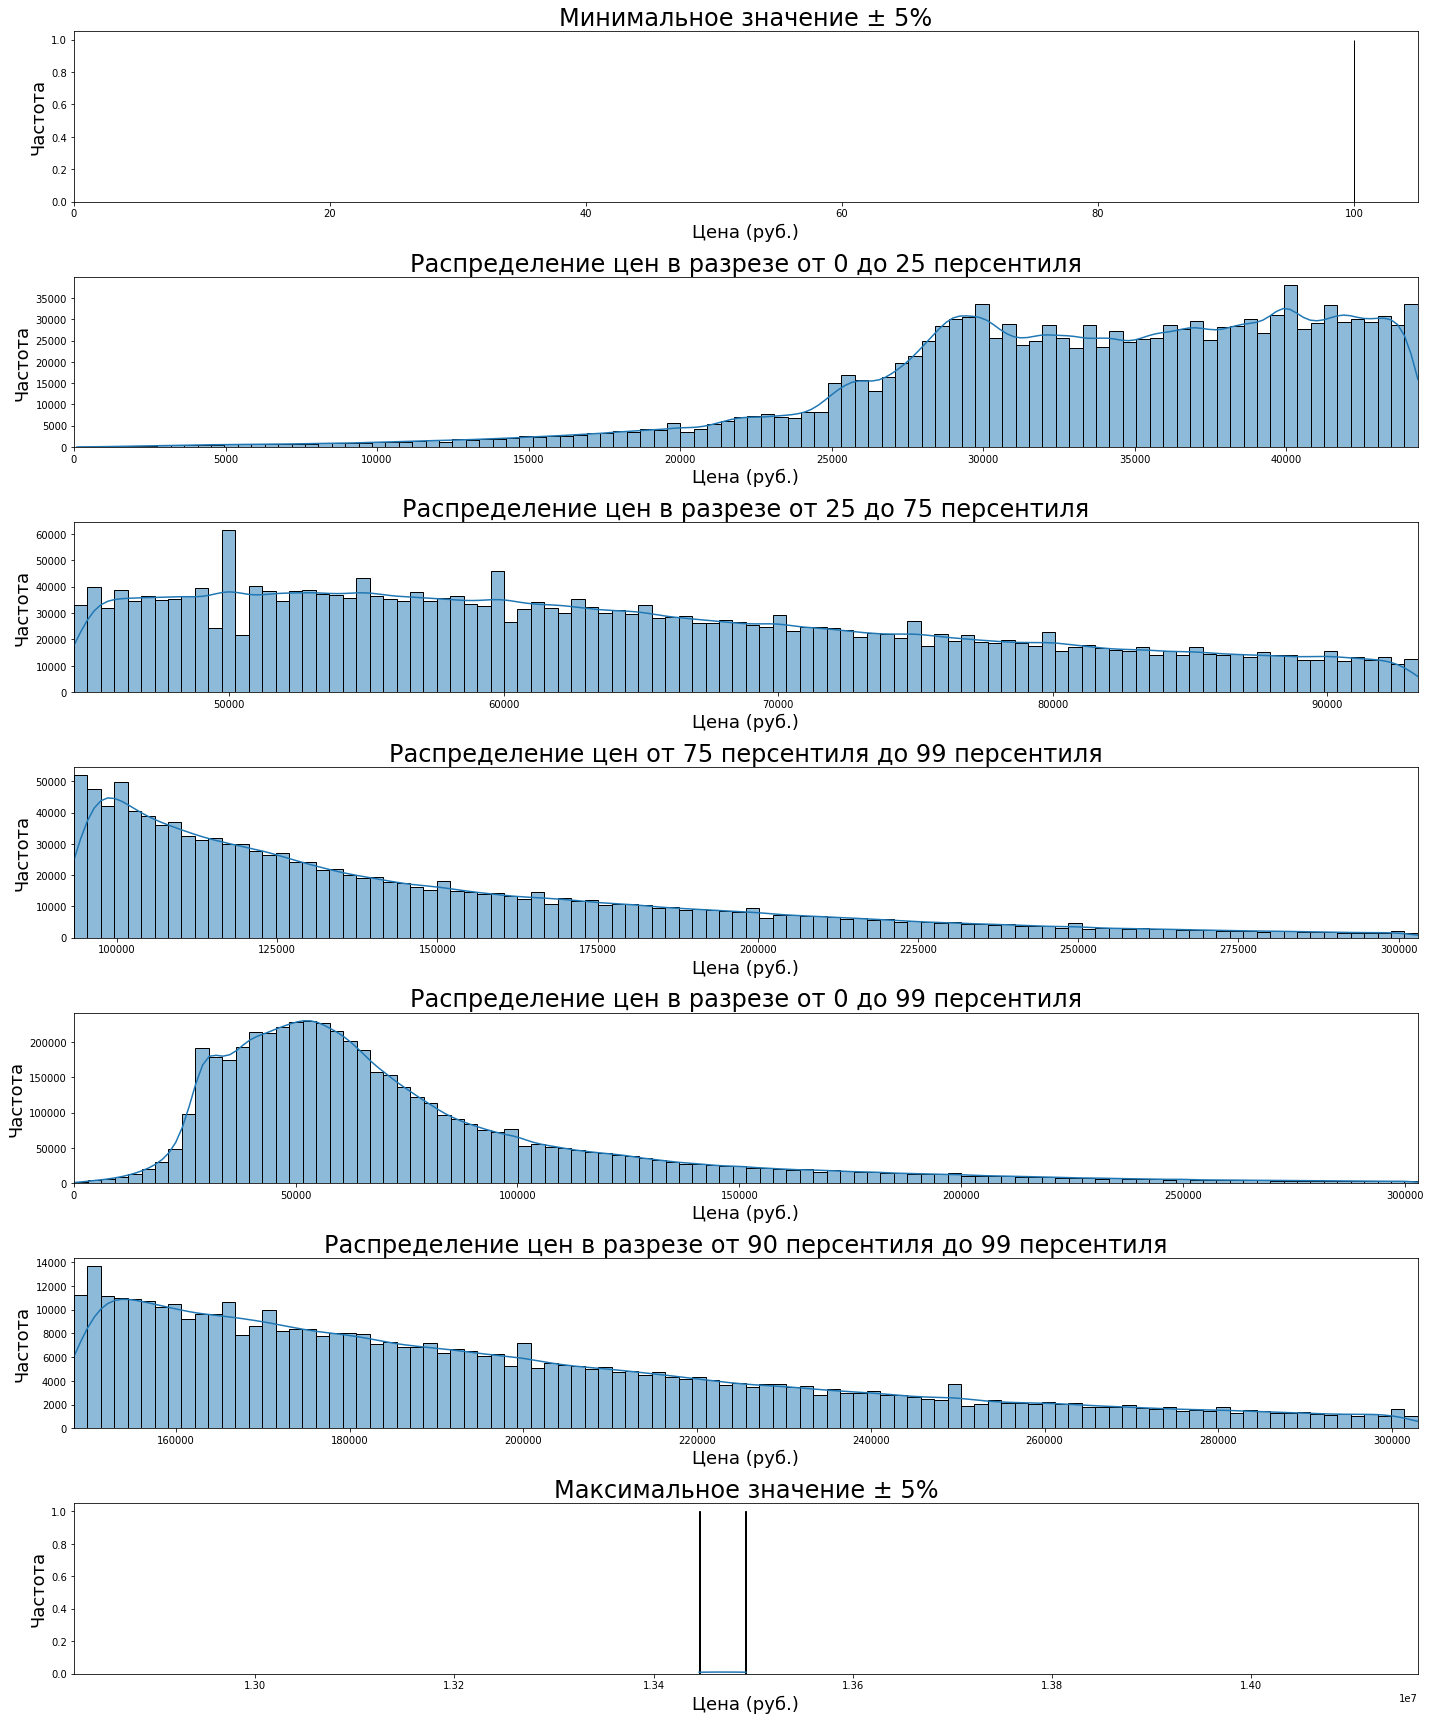

In [7]:
plt.figure(figsize=(20, 24))

# Определение диапазона рядом с минимальным значением
lower_bound_min = 0
upper_bound_min = min_price * 1.05

# График 1: Значения рядом с минимальным значением
plt.subplot(7, 1, 1)
sns.histplot(df[(df['price_per_metre'] > lower_bound_min) & (df['price_per_metre'] <= upper_bound_min)]['price_per_metre'], bins=100, kde=True)
plt.title('Минимальное значение ± 5%', fontsize=24)
plt.xlim(lower_bound_min, upper_bound_min)
plt.xlabel('Цена (руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

# График 2: значения от 0 до 25 персентиля
plt.subplot(7, 1, 2)
sns.histplot(df[(df['price_per_metre'] > 0) & (df['price_per_metre'] <= p25)]['price_per_metre'], bins=100, kde=True)
plt.title('Распределение цен в разрезе от 0 до 25 персентиля', fontsize=24)
plt.xlim(0, p25)
plt.xlabel('Цена (руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

# График 3: значения между 25 и 75 персентилем
plt.subplot(7, 1, 3)
sns.histplot(df[(df['price_per_metre'] > p25) & (df['price_per_metre'] <= p75)]['price_per_metre'], bins=100, kde=True)
plt.xlim(p25, p75)
plt.title('Распределение цен в разрезе от 25 до 75 персентиля', fontsize=24)
plt.xlabel('Цена (руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

# График 4: значения от 75 персентиля до 99 персентиля
plt.subplot(7, 1, 4)
sns.histplot(df[(df['price_per_metre'] > p75) & (df['price_per_metre'] <= p99)]['price_per_metre'], bins=100, kde=True)
plt.title('Распределение цен от 75 персентиля до 99 персентиля', fontsize=24)
plt.xlim(p75, p99)
plt.xlabel('Цена (руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

# График 5: значения от 0 до 99 персентиля 
plt.subplot(7, 1, 5)
sns.histplot(df[(df['price_per_metre'] > 0) & (df['price_per_metre'] <= p99)]['price_per_metre'], bins=100, kde=True)
plt.title('Распределение цен в разрезе от 0 до 99 персентиля', fontsize=24)
plt.xlim(0, p99)
plt.xlabel('Цена (руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

# График 6: значения от 90 до 99 персентиля
plt.subplot(7, 1, 6)
sns.histplot(df[(df['price_per_metre'] > p90) & (df['price_per_metre'] <= p99)]['price_per_metre'], bins=100, kde=True)
plt.title('Распределение цен в разрезе от 90 персентиля до 99 персентиля', fontsize=24)
plt.xlim(p90, p99)
plt.xlabel('Цена (руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

# График 7: диапазон рядом с максимальным значением
lower_bound_max = max_price * 0.95
upper_bound_max = max_price
plt.subplot(7, 1, 7)
sns.histplot(df[(df['price_per_metre'] > lower_bound_max) & (df['price_per_metre'] <= upper_bound_max)]['price_per_metre'], bins=100, kde=True)
plt.title('Максимальное значение ± 5%', fontsize=24)
plt.xlim(upper_bound_max, upper_bound_max)
plt.xlabel('Цена (руб.)', fontsize=18)
plt.ylabel('Частота', fontsize=18)

plt.tight_layout()
plt.show()

**Что можно сказать после визуализации цен за квадратный метр по всему датасету:**

* Распределение цен за квадратный метр напоминает распределение цен за всю площади квартиры, которое мы строили ранее, однако оно является более пологим. Также оно имеет чуть более толстый хвост справа.
* Присутствуют 2 явно отличающихся от общей массы значения: одно минимальное: 100 рублей за квадартный метр, второе максимальное: 13492608.59 рублей. Вероятно, оба этих значения являются пропущенными выбросами, поэтому я удалю обе строки.
* Для распределения цен за квадратный метр не так свойствены "всплески" на круглых значениях, хотя они тоже присутствуют: например, на 25, 30, 40, 50 тысячах рублей за квадратный метр.
* Пик распределения цен за квадратный метр приходится примерно на 50 тысяч за метр, после чего частоты уже более высоких цен постепенно идут на спад.
* Есть заметное увеличение частот примерно на 30 тысячах, после которого следует спад на 35 тысячах и увеличение к 50 тысячам. 

In [8]:
df = df[df['price_per_metre'] != 100]

In [9]:
df = df[df['price_per_metre'] != 13492608.59375]

#### Статистические характеристики цен за квадратный метр в разрезе типов зданий

Дублируем расшифровку типов зданий в нашем датасете.

`0 - Другое. 1 - Панельный. 2 - Кирпично-монолитный. 3 - Кирпичный. 4 - Блочный. 5 - Деревянный`

In [10]:
building_type_stats = df.groupby('building_type')['price_per_metre'].agg(['mean', 'median', 'std', 'count'])
building_type_stats

,mean,median,std,count
building_type,,,,
0,83419.490579,71882.951654,59295.336095,297680
1,67420.426482,52459.016393,50711.528532,1773740
2,115799.595431,93000.000000,84445.583602,1115546
3,70763.865552,58333.333333,54860.677957,1859097
4,69905.315277,55887.660164,52095.394949,170932
5,42601.701408,27586.206897,91876.490178,15998


Построим несколько визуализаций для более наглядного представления данных:

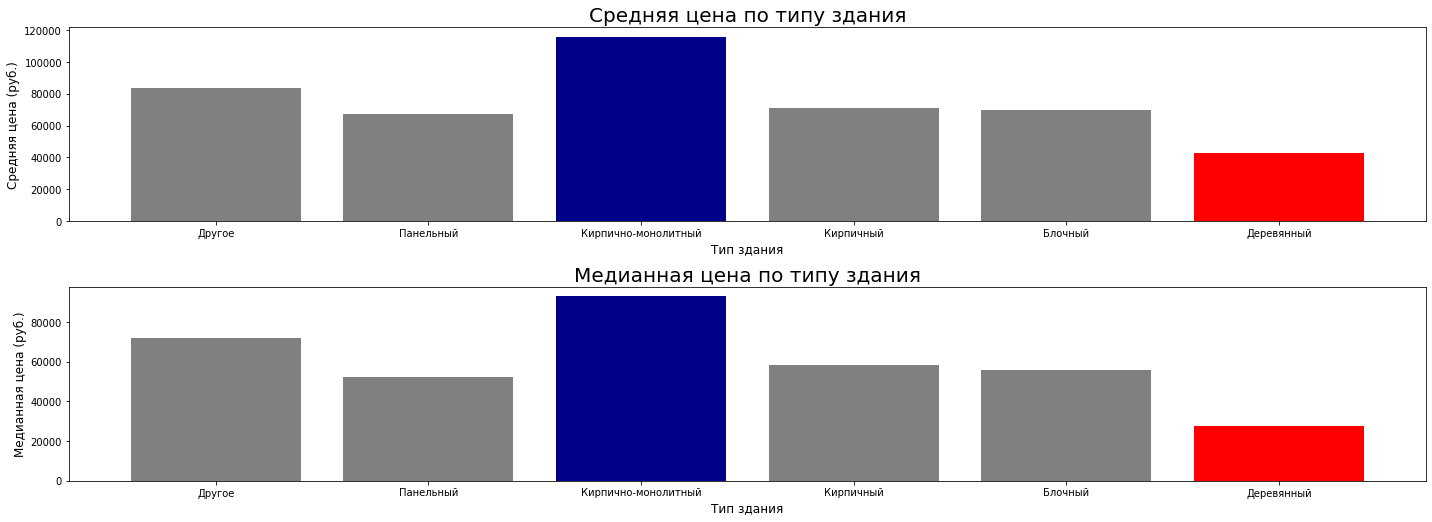

In [12]:
avg_prices = df.groupby('building_type')['price_per_metre'].mean().reset_index()
median_prices = df.groupby('building_type')['price_per_metre'].median().reset_index()

figure, axes = plt.subplots(2, 1, figsize=(20, 8))

def bar_plot_with_highlighted_values(x, y, title, xlabel, ylabel, subplot_position):
    plt.subplot(2, 1, subplot_position)

    max_value_index = np.argmax(y)
    min_value_index = np.argmin(y)

    # Цветовая схема
    colors = ['grey'] * len(y)  
    colors[max_value_index] = 'darkblue'  
    colors[min_value_index] = 'red'        

    plt.bar(x, y, color=colors)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12) 
    plt.xticks(ticks=range(len(x)), labels=['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'])

bar_plot_with_highlighted_values(
    x=avg_prices['building_type'], 
    y=avg_prices['price_per_metre'], 
    title='Средняя цена по типу здания',
    xlabel='Тип здания', 
    ylabel='Средняя цена (руб.)', 
    subplot_position=1
)

bar_plot_with_highlighted_values(
    x=median_prices['building_type'], 
    y=median_prices['price_per_metre'], 
    title='Медианная цена по типу здания',
    xlabel='Тип здания', 
    ylabel='Медианная цена (руб.)', 
    subplot_position=2
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show() 

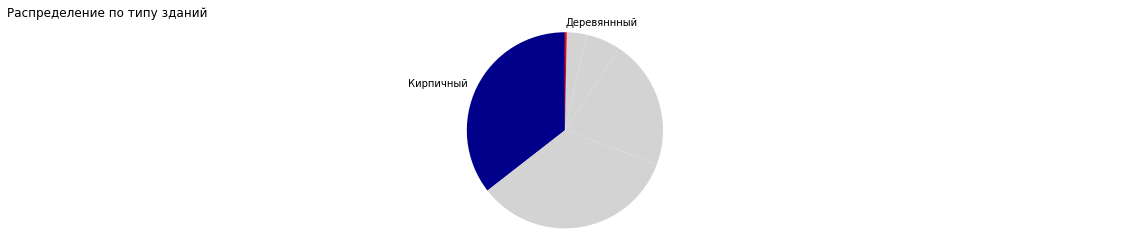

In [13]:
y_building_type = df['building_type'].value_counts()
labels = y_building_type.index

colors = ['lightgrey'] * len(y_building_type) 
max_value_index = np.argmax(y_building_type)
min_value_index = np.argmin(y_building_type)

colors[max_value_index] = 'darkblue'  
colors[min_value_index] = 'red'    

labels=['Кирпичный', '', '', '', '', 'Деревяннный']

plt.figure(figsize=(20, 4))
plt.pie(y_building_type, labels=labels, colors=colors, startangle=90)
plt.title('Распределение по типу зданий', fontsize=12, loc='left')  
plt.axis('equal')  
plt.show()

1. **Что можно сказать по средней цене?**
   - Самая высокая средняя цена у типа 2 (115799.60 рублей) - кирпичный-монолитный дом, что может указывать на престижность или высокое качество этих зданий.
   - Самая низкая средняя цена у типа 5 (42601.70 рублей) - деревянный дом. Это достаточно очевидно, учитывая жилищные условия, которые зачастую сопутствуют деревянным домам. 


2. **Что можно сказать по медианной цене?:**
   - Медианная цена, как и средняя, самая высокая у кирпично-монолитных домов (93000.00 рублей), что подтверждает качество и престижность квартир в таких зданиях.
   - Медианная цена (27586.21 рублей) также самая низкая у деревянных домов. 


3. **Что можно сказать по стандартному отклонению цен в разрезе типов домов?**:
   - Среди деревянных домов самое высокое стандартное отклонение (91876.49), что указывает на значительный разброс цен в этом сегменте. В целом, я вполне могу себе представить такую картину: в деревянных домах может продаваться вторичная как квартира в каком-то провинциальном поселке, так и новый загородный дом.  
   - Тип 2 также имеет довольно высокое стандартное отклонение (84445.58), что может отражать широкий спектр качества или расположения зданий между регионами.


4. **Квартиры в каких домах встречаются чаще, чем в других? В каких реже?**:
   - Наибольшее количество наблюдений у типа 3 (1859097) - кирпичных домов, что может отражать его популярность или широкое распространение на рынке. В целом, наверное, так и есть, учитывая, что половина страны живет в кирпичных многоэтажках советской застройки. 
   - Деревянные дома имеют наименьшее количество наблюдений (15998), что указывает на специфичность предложения квартир в данных домах.


**Общие выводы:**
- `Кирпично-монолитный дом`: Выглядит как элитный или высококачественный тип здания с высокими и разнообразными ценами.
- `Деревянные дома`: Вероятно представляет собой более доступные или менее распространенные здания с огромным разбросом цен.
- `Панельный и кирпичнй`: Средние по стоимости сегменты с умеренным разбросом цен, что может свидетельствовать о типичности для среднестатистического жилья. 
- `Блочный дом и тип "Другое"`: Также интересно отметить цены и их разброс, возможно, они занимают специализированные ниши на рынке. 

#### Статистические характеристики цен за квадратный метр в разрезе типа рынка: вторичный/первичный

`1 - Первичный рынок. 2 - Вторичный рынок.`

In [14]:
object_type_stats = df.groupby('object_type')['price_per_metre'].agg(['mean', 'median', 'std', 'count'])
object_type_stats

,mean,median,std,count
object_type,,,,
1,76810.028887,60833.333333,62280.379191,3764871
2,87599.010144,66666.666667,68769.684295,1468122


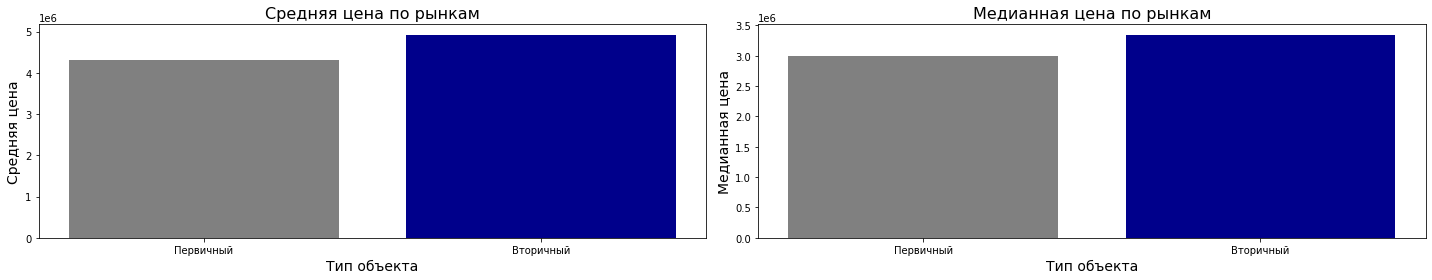

In [15]:
avg_prices = df.groupby('object_type')['price'].mean()
median_prices = df.groupby('object_type')['price'].median()

plt.figure(figsize=(20, 4))

def bar_plot_with_highlighted_max(x, y, title, xlabel, ylabel, position):
    plt.subplot(1, 2, position)
    max_value_index = np.argmax(y)

    colors = ['grey'] * len(y)
    colors[max_value_index] = 'darkblue'  

    plt.bar(x, y, color=colors)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

# График 1: Средняя цена
bar_plot_with_highlighted_max([1, 2], avg_prices.values, 'Средняя цена по рынкам', 'Тип объекта', 'Средняя цена', 1)
plt.xticks([1, 2], ['Первичный', 'Вторичный'])

# График 2: Медианная цена
bar_plot_with_highlighted_max([1, 2], median_prices.values, 'Медианная цена по рынкам', 'Тип объекта', 'Медианная цена', 2)
plt.xticks([1, 2], ['Первичный', 'Вторичный'])

plt.tight_layout()
plt.show()

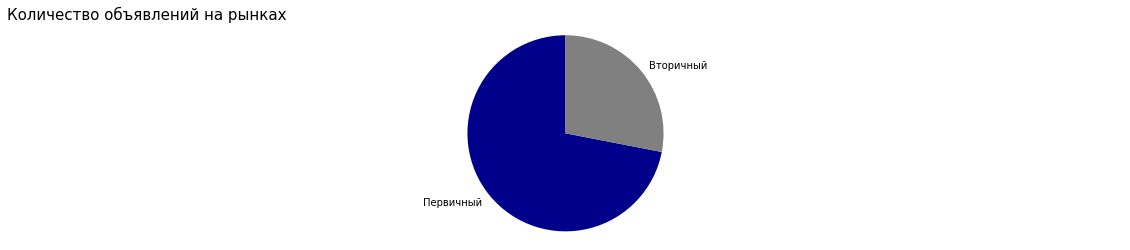

In [16]:
count_ads = df['object_type'].value_counts()

plt.figure(figsize=(20, 4))

colors = ['grey'] * len(count_ads)
max_index = np.argmax(count_ads)
colors[max_index] = 'darkblue'  

plt.pie(count_ads, labels=['Первичный', 'Вторичный'], colors=colors, startangle=90)
plt.title('Количество объявлений на рынках', fontsize=15, loc='left')
plt.axis('equal') 
plt.show()

1. **Что можно сказать по средней цене?**:
   - Первичный рынок: Средняя цена составляет 76810.03 рублей. 
   - Вторичный рынок: Средняя цена составляет 87599.01 рублей, что выше, чем на первичном рынке. Наверное, это связано с тем, что на первичном рынке много предложений о квартирах в новостройках и новых ЖК, многие из которых расположены в спальных районах и на окраинах. А на вторичном рынке много предложений о квартирах в центре города. 

2. **Что можно сказать о медианной цене?**:
   - Первичный рынок: Медианная цена составляет 60833.33 рублей, что немного ниже средней. Это может указывать на наличие большого количества более доступных по цене предложений, даже ниже среднего уровня.
   - Вторичный рынок: Медианная цена составляет 66666.67 рублей. 

3. **Что можно сказать по стандартному отклонению?**:
   - Первичный рынок: Стандартное отклонение составляет 62280.38 рублей. Это значительное значение, что говорит о большом разбросе цен на новостройки. Возможны как эконом предложения, так и более дорогие.
   - Вторичный рынок: Стандартное отклонение составляет 68769.68 рублей, что также указывает на значительную вариацию цен. Это может быть связано с разнообразием объектов, включая и старое жилье, и реконструированные или модернизированные квартиры.

4. **Что можно сказать по количеству объявлений, размещенных на первичном и на вторичном рынке?**:
   - Первичный рынок (3764871 объектов): Это указывает на огромное количество строящихся или недавно построенных объектов, которые были выставлены на продажу с 2018 по 2021 годы. 
   - Вторичный рынок (1468122 объектов): Меньшее количество на вторичном рынке, скорее всего, говорит о меньшем предложении, возможно, из-за более медленного обновления этих объектов на рынке.

**Общие выводы:**
- Цены на вторичном рынке в среднем выше, что может говорить о его устоявшихся предпочтениях среди покупателей и обустроенных районах.
- Первичный рынок более разнообразен по предложениям, что делает его привлекательным для различных категорий покупателей c разным доходом. 
- Количественные данные по объектам показывают значительный перевес в сторону первичного рынка, что говорит о продолжающемся росте строительства новых объектов.

#### Описание рынка: Статистические характеристики цен за квадратный метр в разрезе количества комнат. 

In [17]:
rooms_stats = df.groupby('rooms')['price_per_metre'].agg(['mean', 'median', 'std', 'count'])
rooms_stats

,mean,median,std,count
rooms,,,,
-1,87197.747101,65273.665049,69070.372299,267211
1,78888.634564,63750.000000,55416.310635,1962448
2,78777.105975,62000.000000,60131.604084,1774966
3,78258.722679,59040.590406,69660.452736,1053555
4,92404.113072,58472.553699,109792.097725,148964
5,133557.585344,73333.333333,180996.406819,22038
6,186443.449990,107379.576720,212689.648916,2346
7,180072.368814,101530.612245,214769.880361,783
8,169756.375708,100000.000000,205244.037967,352


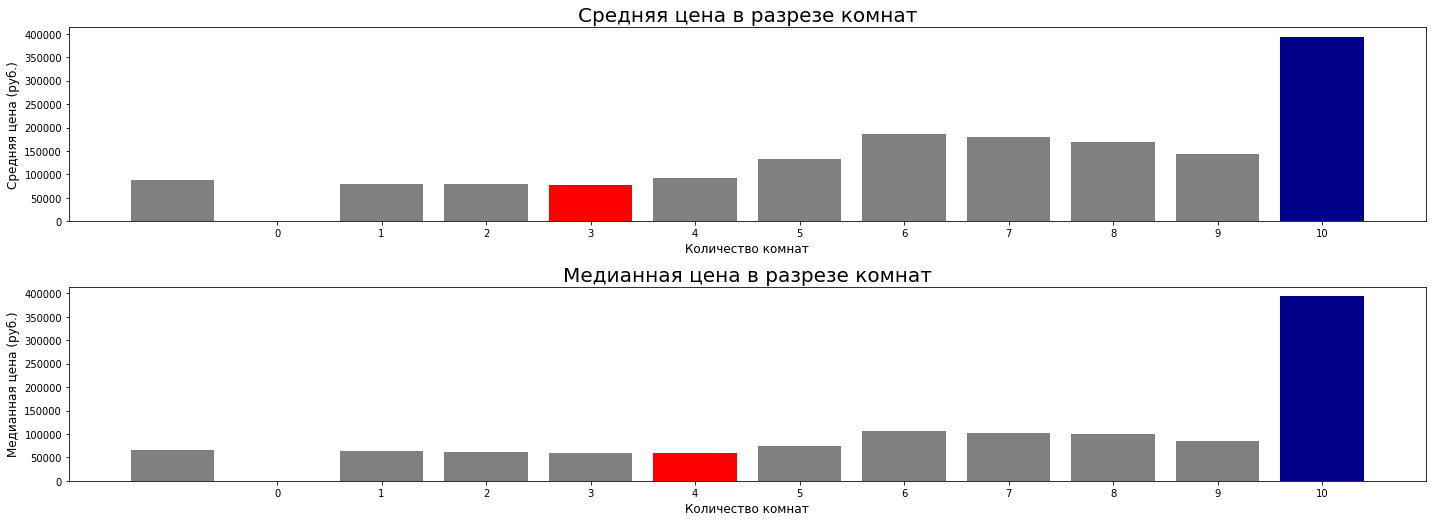

In [18]:
avg_prices = df.groupby('rooms')['price_per_metre'].mean().reset_index()
median_prices = df.groupby('rooms')['price_per_metre'].median().reset_index()

figure, axes = plt.subplots(2, 1, figsize=(20, 8))

def bar_plot_with_highlighted_values(x, y, title, xlabel, ylabel, subplot_position):
    plt.subplot(2, 1, subplot_position)

    max_value_index = np.argmax(y)
    min_value_index = np.argmin(y)

    # Цветовая схема
    colors = ['grey'] * len(y)  
    colors[max_value_index] = 'darkblue'  
    colors[min_value_index] = 'red'        

    plt.bar(x, y, color=colors)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12) 
    plt.xticks(ticks=range(len(x)))

bar_plot_with_highlighted_values(
    x=avg_prices['rooms'], 
    y=avg_prices['price_per_metre'], 
    title='Средняя цена в разрезе комнат',
    xlabel='Количество комнат', 
    ylabel='Средняя цена (руб.)', 
    subplot_position=1
)

bar_plot_with_highlighted_values(
    x=median_prices['rooms'], 
    y=median_prices['price_per_metre'], 
    title='Медианная цена в разрезе комнат',
    xlabel='Количество комнат', 
    ylabel='Медианная цена (руб.)', 
    subplot_position=2
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show() 

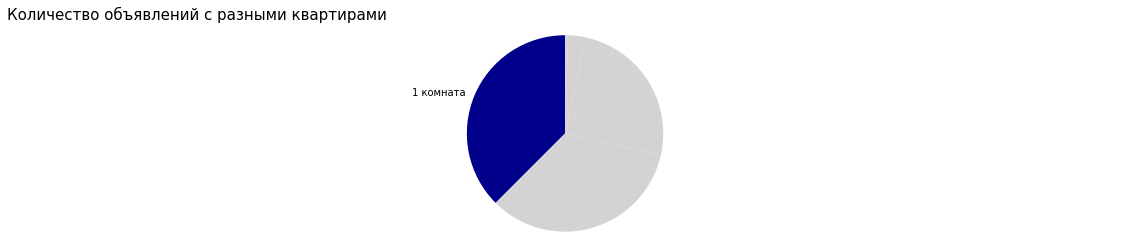

In [19]:
y_rooms = df['rooms'].value_counts()
labels = ['1 комната', '', '', '', '', '', '', '', '', '', '']

colors = ['lightgrey'] * len(y_rooms)  
max_value_index = np.argmax(y_rooms)
min_value_index = np.argmin(y_rooms)

colors[max_value_index] = 'darkblue'  
colors[min_value_index] = 'red'    

# Создаем круговую диаграмму
plt.figure(figsize=(20, 4))
plt.pie(y_rooms, labels=labels, colors=colors, startangle=90)
plt.title('Количество объявлений с разными квартирами', fontsize=15, loc='left')  
plt.axis('equal')  
plt.show()

1. **Что можно сказать по средней цене за квадратный метр в разрезе комнат?**:
   - 1-3 комнаты: Средняя цена для 1-комнатных – 78888.63 рублей, для 2-комнатных – 78777.11 рублей, для 3-комнатных – 78258.72 рублей. Как видно, средние цены за квартиры не сильно различаются для однокомнатных, двухкомнатных и трехкомнатных квартир. 
   - 4 комнаты: Здесь уже существенно выше средняя цена (92404.11 рублей). Действительно, квартиры с четырьмя комнатами, как правильно, уже считаются более престижными и, как следствие, дорогими. 
   - 5 и более комнат: Существенный рост средней цены, особенно выше 5 комнат. Так, 5-комнатные — 133557.59 рублей, а 6-комнатные — 186443.45 рублей. На каждый последующий объект цена продолжает повышаться, что логично, учитывая эксклюзивность таких объектов.
   - Особый случай — 10 комнат: Средняя цена 394029.85 рублей, однако это основано на единственном наблюдении, что затрудняет выводы о тренде для объектов этой категории.

2. **Что можно сказать по медианной цене за квадратный метр в разрезе комнат?**:
   - Медианные цены следуют общей тенденции средней цены, показывая схожее распределение.  
   - 1-3 комнаты имеют медианные цены ниже средних, что может свидетельствовать о наличии более доступных опций внутри этих категорий, либо на отдельные случаю экстремально дорогих квартир в этом диапазоне. 

3. **Что можно сказать по стандартному отклонению за квадратный метр в разрезе комнат?**:
   - Стандартное отклонение увеличивается с количеством комнат: чем больше комнат хочет видеть покупатель, тем с большим разбросом цен он сталкивается. 

4. **Что можно сказать по количеству объявлений?**:
   - Наибольший объем данных приходится на 1-3 комнатные квартиры, особенно на однокомнатные квартиры: это самое часто встречаемое количесвто комнат в квартире. 
   - Существенно меньше данных для объектов с 4 и более комнатами, отражая специфическую природу таких предложений.

**Общие выводы:**
- Наличие более высоких средних и медианных цен для 4 и более комнат говорит о престижности, высокой стоимости и, возможно, эксклюзивности таких объектов недвижимости.
- Количество данных для многокомнатных квартир существенно ниже, что делает их рынок более специфичным.

#### Описание рынка: Статистические характеристики цен за квадратный метр в разрезе этажности здания. 

In [20]:
levels_stats = df.groupby('levels')['price_per_metre'].agg(['mean', 'median', 'std', 'count']).reset_index()
levels_stats.head()

,levels,mean,median,std,count
0,1,37687.001117,30769.230769,73924.815077,23117
1,2,37663.469464,33783.783784,28430.444721,115502
2,3,54521.696515,47058.823529,41249.232935,161964
3,4,69232.022660,55952.380952,58720.336496,159239
4,5,61188.527873,51580.645161,44562.567864,987309


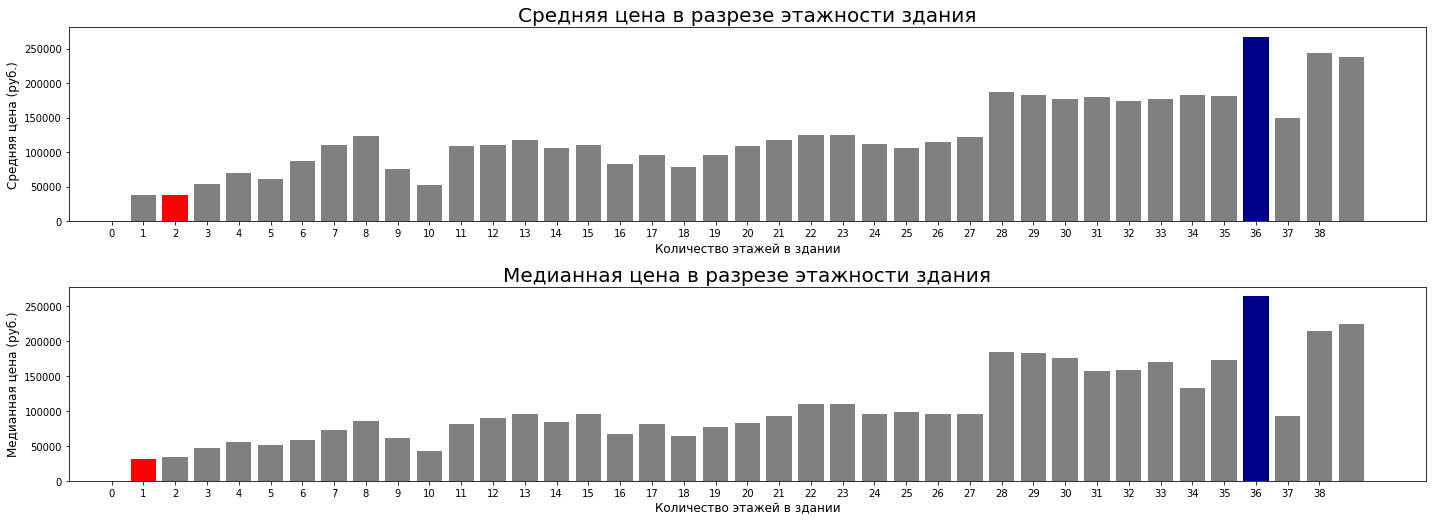

In [21]:
avg_prices = df.groupby('levels')['price_per_metre'].mean().reset_index()
median_prices = df.groupby('levels')['price_per_metre'].median().reset_index()

figure, axes = plt.subplots(2, 1, figsize=(20, 8))

def bar_plot_with_highlighted_values(x, y, title, xlabel, ylabel, subplot_position):
    plt.subplot(2, 1, subplot_position)

    max_value_index = np.argmax(y)
    min_value_index = np.argmin(y)

    # Цветовая схема
    colors = ['grey'] * len(y)  
    colors[max_value_index] = 'darkblue'  
    colors[min_value_index] = 'red'        

    plt.bar(x, y, color=colors)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12) 
    plt.xticks(ticks=range(len(x)))

bar_plot_with_highlighted_values(
    x=avg_prices['levels'], 
    y=avg_prices['price_per_metre'], 
    title='Средняя цена в разрезе этажности здания',
    xlabel='Количество этажей в здании', 
    ylabel='Средняя цена (руб.)', 
    subplot_position=1
)

bar_plot_with_highlighted_values(
    x=median_prices['levels'], 
    y=median_prices['price_per_metre'], 
    title='Медианная цена в разрезе этажности здания',
    xlabel='Количество этажей в здании', 
    ylabel='Медианная цена (руб.)', 
    subplot_position=2
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show() 

1. **Этажность и цены за квадратный метр:**
   - Рост цен с увеличением этажности: Начиная с уровня 1, наблюдается значительный рост средней цены до уровня 4 (61188.53 руб.), далее до 8 уровня (123487.23 руб.). Это связано с тем, что 5 и 9 - самые распространенные и доступные этажности зданий, следовательно, средняя цена за метр будет ниже. Далее средняя цена увеличивается, но не монотонно, а с некоторыми подъемами и спадами. 
   - Пиковая средняя цена: Уровень 36 имеет самую высокую среднюю цену в 267303.51 рублей. На самом деле, это выглядит немного подозрительно. 
   - Стабильность на высоких уровнях: Начиная с уровня 28-39, цены стабильно высокие (около 180000 руб. и выше).
   - На уровнях 0-5, средние цены относительно низкие (от 37687 руб. до 61188 руб.), что может указывать на более экономные предложения или старые здания.
   
3. **Расхождения между средними и медианными ценами:**
   - Расхождения между средними и медианными ценами указывают на влияние дорогостоящего жилья на среднюю цену. Например, на уровнях 28 и выше медианная цена также высока, как и средняя.

4. **Стандартное отклонение (std):**
   - Высокие значения стандартного отклонения на уровнях 6-8 и выше указывают на значительный разброс в качествах и ценностях объектов. Это может отражать наличие разного класса жилья, от стандартных до дорогих объектов.

5. **Количество предложений:**
   - Большинство данных сосредоточено на уровнях с 5 по 17, что может свидетельствовать о том, что эти этажи наиболее популярны у застройщиков. 

**Общие выводы:**
- Характерно увеличение цен с этажностью, что указывает на престижность и приемлемость высоких этажей.
- Низкий уровень цен на этажах с нулевого до пятого, скорее всего, связано с тем, что это вторичные предложения в старых низкоэтажных домах. 
- Большое стандартное отклонение говорит о разнообразии предложений и значительных отличиях в качественных характеристиках объектов в зависимости от этажности.

#### Описание рынка: Статистические характеристики цен за квадратный метр в разрезе этажа, на котором расположена квартира.

In [24]:
level_stats = df.groupby('level')['price_per_metre'].agg(['mean', 'median', 'std', 'count']).reset_index()
level_stats.head()

,level,mean,median,std,count
0,1,62176.788125,49425.287356,52403.948522,631389
1,2,72917.190903,56906.077348,64228.445623,682699
2,3,74807.405898,58695.652174,61150.404962,590652
3,4,75039.533538,58823.529412,62279.583863,544713
4,5,73232.653892,57446.808511,60931.268915,550911


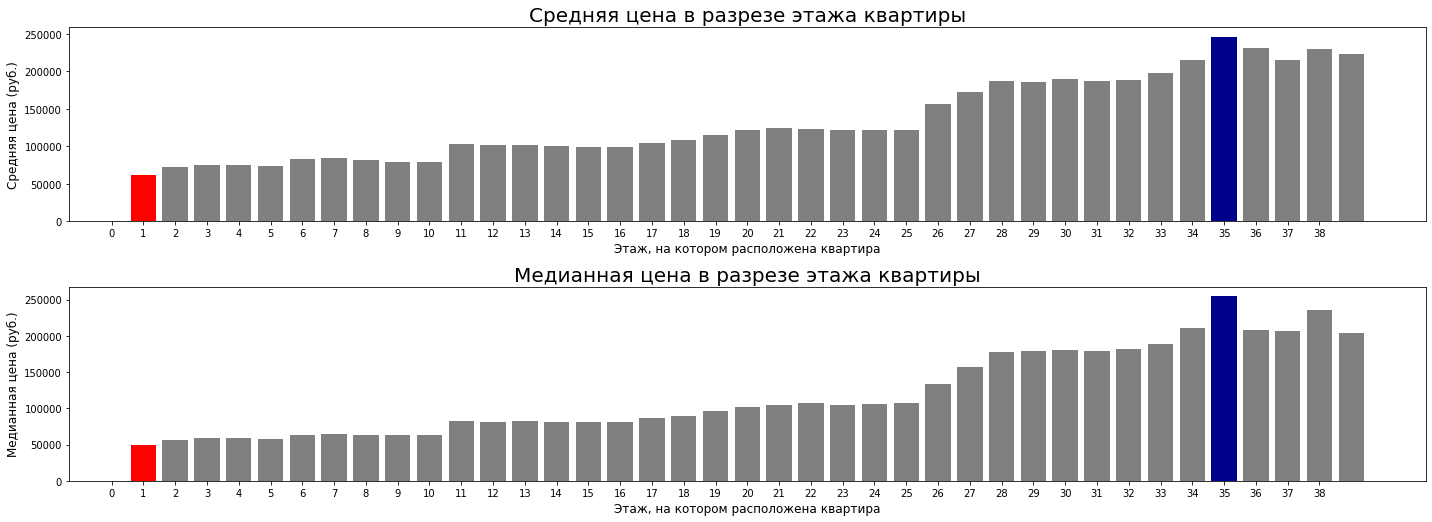

In [23]:
avg_prices = df.groupby('level')['price_per_metre'].mean().reset_index()
median_prices = df.groupby('level')['price_per_metre'].median().reset_index()

figure, axes = plt.subplots(2, 1, figsize=(20, 8))

def bar_plot_with_highlighted_values(x, y, title, xlabel, ylabel, subplot_position):
    plt.subplot(2, 1, subplot_position)

    max_value_index = np.argmax(y)
    min_value_index = np.argmin(y)

    # Цветовая схема
    colors = ['grey'] * len(y)  
    colors[max_value_index] = 'darkblue'  
    colors[min_value_index] = 'red'        

    plt.bar(x, y, color=colors)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12) 
    plt.xticks(ticks=range(len(x)))

bar_plot_with_highlighted_values(
    x=avg_prices['level'], 
    y=avg_prices['price_per_metre'], 
    title='Средняя цена в разрезе этажа квартиры',
    xlabel='Этаж, на котором расположена квартира', 
    ylabel='Средняя цена (руб.)', 
    subplot_position=1
)

bar_plot_with_highlighted_values(
    x=median_prices['level'], 
    y=median_prices['price_per_metre'], 
    title='Медианная цена в разрезе этажа квартиры',
    xlabel='Этаж, на котором расположена квартира', 
    ylabel='Медианная цена (руб.)', 
    subplot_position=2
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show() 

1. **Ценовые тенденции по этажам:**
   - Начальные этажи (0-5): Средняя цена варьируется от 62176 руб. на этаже 1 до 75039 руб. на этаже 4, указывая на небольшое увеличение стоимости на более высоких этажах, вероятно из-за предпочитаемых видов или меньшего шумового загрязнения.
   - Стабильность на средних этажах (6-10): Цены находятся в диапазоне 78992 - 83880 руб., что также демонстрирует популярность средних этажей, возможно из-за удобного расположения между шумными нижними и проблематичными при эвакуации верхними этажами.
   - Заметный рост на этажах 11-20: Здесь виден резкий рост, особенно начиная с 11 этажа (102565 руб.) до 20 этажа (121887 руб.), что может считаться премиальным расположением.
   - По графику можно разделить средние цены за квадратный метр на 3 уровня: для этажей 1-10, для этажей 11-25 и для этажей 26-39. На первых двух уровнях цена варьируется слабо, а на третьем уровне цена за квадратный метр обладет уже более сильным разбросом. 

2. **Высокие этажи (21 и выше):**
   - Этажи 21-25 демонстрируют стабильно высокие цены (около 123000 руб.).
   - Этажи выше 26: В значительной степени нагружены эксклюзивными предложениями, что отражено в резком скачке средней цены, достигающей максимумов более 200000 руб. и с особенным скачком на 35 этаже (246321 руб.).

3. **Медианные цены и стандартное отклонение:**
   - Медиана отражает аналогичные тренды со средней ценой, подтверждая общие рыночные предпочтения.
   - Стандартное отклонение показывает значительную вариабельность на этажах выше 26, указывая на разнообразие объектов, которые могут включать и стандартные квартиры, и пентхаусы или элитные предложения.

4. **Количество объявлений с квартирами на разных этажах**
   - Наибольшее количество квартир наблюдается на этажах 0-10. 
   - Количество предложений сильно снижается выше этажа 25, что подчеркивает эксклюзивность и, вероятно, ограниченность рынка для столь высоких этажей.

**Общие выводы:**
- Средние этажи наиболее популярны и стабильны по ценам, указывая на баланс между доступностью и комфортом.
- Высокие этажи, особенно выше 20, начинают отражать премиальные сегменты рынка с высокими ценами и широким спектром предложений.
- Пики цен наблюдаются для отдельных высоких этажей, что может указывать на элитные квартиры или пентхаусы. 

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="10"></a> 
    <h1 style="color: darkblue;">Выводы по исследованию:</h1
</div> <a class="anchor" id="10"></a> 

* **Самая высокая средняя и медианная цены принадлежат квартирам из кирпично-монолитных домов, а самые низкие цены - деревянным домам**. Чаще всего встречаются объявления для **кирпичных домов**, а реже всего - **для деревянных** домов. Кирпично-монолитныйдом выглядит как элитный или высококачественный тип здания с высокими и разнообразными ценами, деревянные дома, вероятно, представляет собой более доступные или менее распространенные здания с большим разбросом цен.

* **Объем предложения на первичном рынке намного обширнее, чем объем предложения на вторичном рынке**: скорее всего из-за расширенной застройки спальных районов во многих регионах нашей страны. А вот цены на первичном рынке ниже, чем на вторичном. 

* **Самая высокая цена за квадратный метр - среди шестикомнатных квартир (если не учитывать единственную десятикомнатную квартиру)**. Самая низкая цена за квадратный метр - среди трехкомнатных квартир, а медианная - среди четырехкомнатных. Больше всего предложений для квартир с одной комнатной. 

* Среди зданий с разной этажностью, самая высокая средняя цена за квадратный метр **у зданий с 36 этажами**, а самая низкая - **среди двухэтажных зданий**. Средняя цена за квадратный метр самая высокая для квартир, расположенных **на 35 этаже**, а самая низкая средняя цена - для **квартир на первом этаже**. 

[Вернуться к навигации](#2)

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="11"></a> 
    <h1 style="color: darkblue;">Когда выгодно покупать/продавать объект недвижимости? Иccледование сезонности цен на квартиры</h1>
</div> <a class="anchor" id="11"></a> 

Мы уже достататочно хорошо изучили цены на недвижимость в разрезе регионов, типов домов, этажей зданий и других факторов. А что с динамикой цен? Для ответа на этот и все сопутствующие вопросы проведем анализ рынка недвижимости, учитыва время публикации объявления. 

**Мой план:**

`1.` Создание столбцов с годом, кварталом и месяцем выставления квартиры на продажу. 

`2.` Визуализация: график временного ряда по годам для 2018-2021 годов; по месяцам для каждого года отдельно; по кварталам для каждого года отдельно.  

`3.` Разложение временного ряда на компонентны: тренд, сезонность, остатки. 

`4.` Определение выгодных моментов (месяцев) для покупки/продажи недвижимости. 

#### Создание столбцов с годом, кварталом и месяцем выставления квартиры на продажу.

In [26]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q').astype(str)  
df['month'] = df['date'].dt.month

#### Визуализация: временной ряд по годам. 

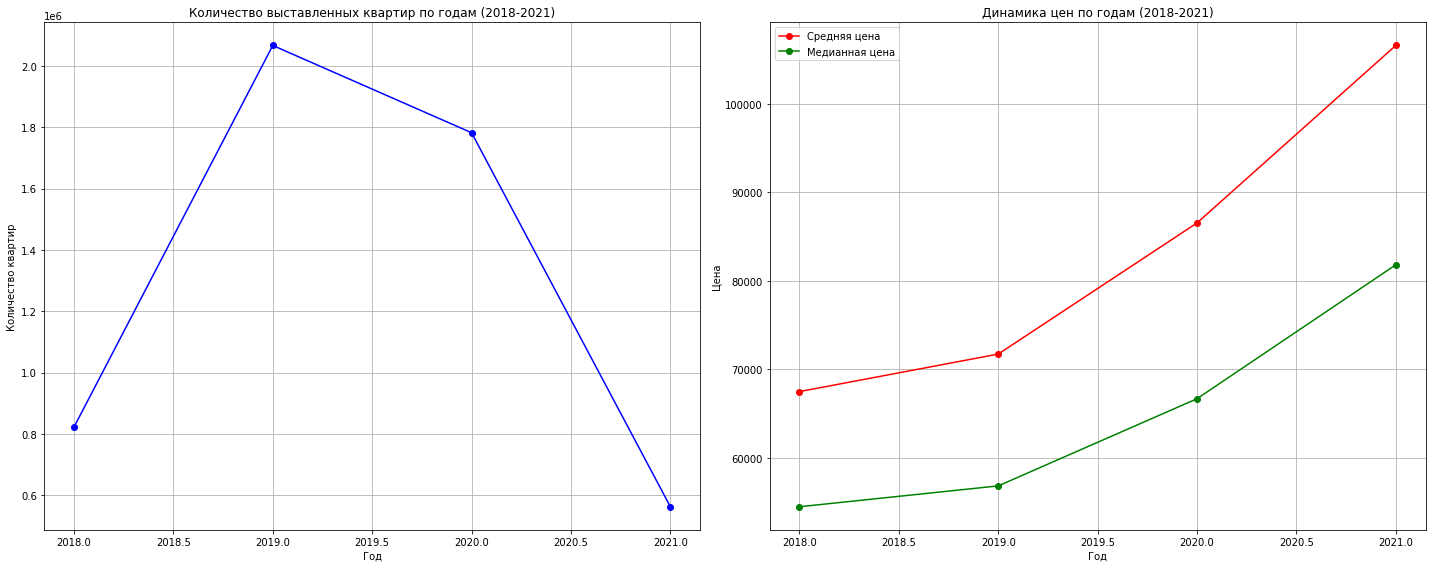

In [27]:
yearly_data = df.groupby('year').size()
average_prices = df.groupby('year')['price_per_metre'].mean()
median_prices = df.groupby('year')['price_per_metre'].median()

fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# График количества выставленных квартир
ax1[0].plot(yearly_data.index, yearly_data.values, marker='o', color='b')
ax1[0].set_title('Количество выставленных квартир по годам (2018-2021)')
ax1[0].set_xlabel('Год')
ax1[0].set_ylabel('Количество квартир')
ax1[0].grid()

# График средней и медианной цены
ax1[1].plot(average_prices.index, average_prices.values, marker='o', color='r', label='Средняя цена')
ax1[1].plot(median_prices.index, median_prices.values, marker='o', color='g', label='Медианная цена')
ax1[1].set_title('Динамика цен по годам (2018-2021)')
ax1[1].set_xlabel('Год')
ax1[1].set_ylabel('Цена')
ax1[1].legend()
ax1[1].grid()

plt.tight_layout()
plt.show()

In [28]:
yearly_data

year
2018     822084
2019    2066705
2020    1782041
2021     562163
dtype: int64

In [29]:
average_prices

year
2018     67474.579239
2019     71711.137121
2020     86526.578167
2021    106581.964144
Name: price_per_metre, dtype: float64

In [30]:
median_prices

year
2018    54464.285714
2019    56818.181818
2020    66666.666667
2021    81800.000000
Name: price_per_metre, dtype: float64

**Что можно сказать по визуализации динамики количества объявлений по годам? По динамике средних и медианных цен по годам?**

`Количество объявлений по годам:`
- Резкий рост в 2019 году: Число объявлений более чем удвоилось по сравнению с 2018 годом, достигнув своего пика. Хотя сравнивать в данном случае будет не совсем корректно, поскольку у нас данные начинаются не с начала 2018 года.
  
- Снижение с 2020 года: В 2020 году количество объявлений снизилось, что может быть связано с началом пандемии COVID-19, вызывавшей неопределенность на рынках и сократившей число сделок.

- Минимум в 2021 году: Это значение сложно комментировать, учитывая, что мы уже обращали внимание на то, что у нас представлены данные до мая 2021 года, поэтому сравнивать общегодовые количества объявлений в данном случае не очень корректно. 

`Динамика средних цен по годам:`
- Монотонный рост цен: Средние цены стабильно росли в течение исследуемого периода. 
  
- Заметное увеличение в 2020 году: Средняя цена за квадратный метр существенно возросла на фоне уменьшения количества объявлений, что может говорить о росте цен на фоне пониженного предложения на рынке.

- Продолжение роста в 2021 году: Цены все так же демонстрируют уверенный рост. 

`Динамика медианных цен по годам:`
- Рост медианных цен параллельно со средними: Это указывает на устойчивый тренд к увеличению цен на всем рынке, а не только в сегменте дорогой недвижимости. 

- Быстрое увеличение с 2020 года: Медианные цены также взлетели, подкрепляя предположение о дефиците предложений и изменениях в предпочтениях покупателей.


Рынок недвижимости демонстрирует рост цен несмотря на колебания в количестве доступных предложений. 2020 и 2021 годы характеризуются значительным ростом стоимости, вероятно, всвязи с изменяющимися экономическими и социальными факторами, включая пандемию. Дефицит новых предложений в последние годы может способствовать стабильному увеличению стоимости недвижимости. 

#### Визуализация: временной ряд по месяцам.

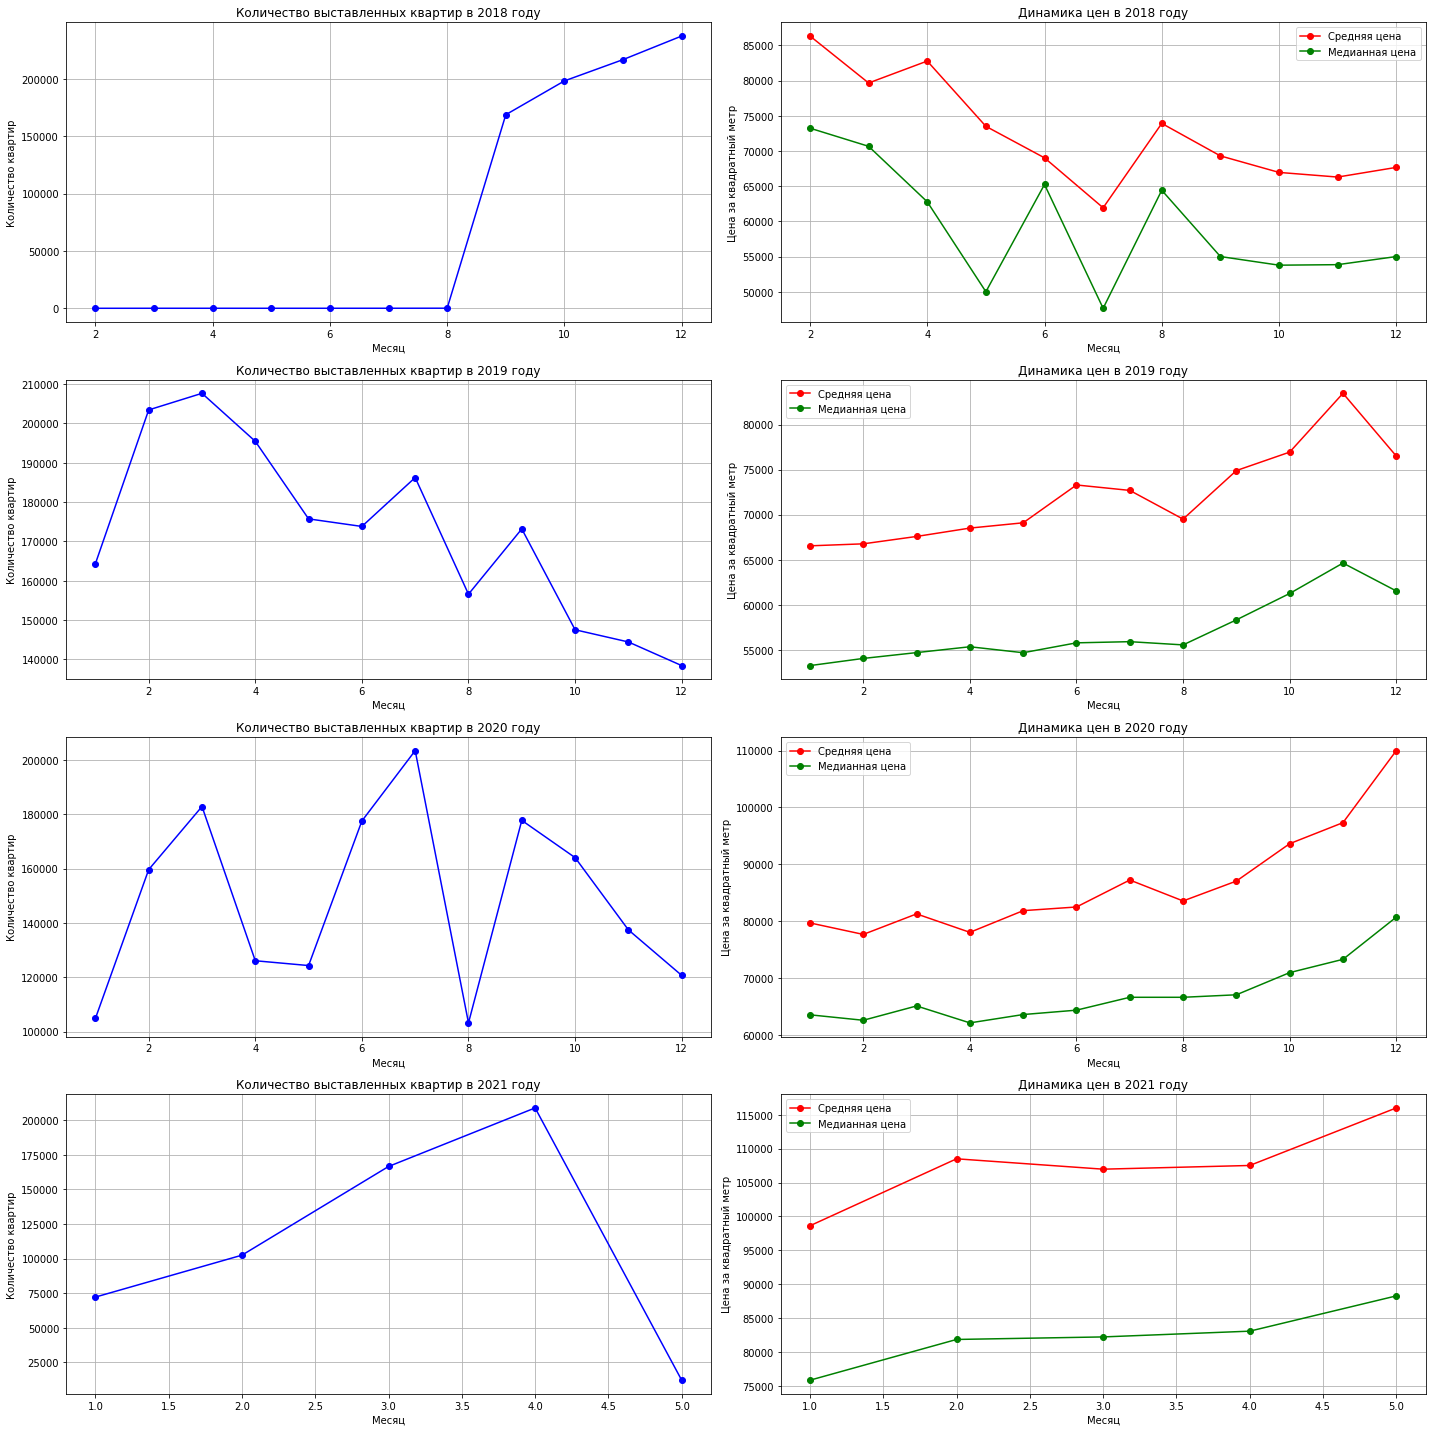

In [31]:
# Функция для построения графиков по годам
def plot_yearly_data(year, ax, df):
    # Фильтрация данных по году
    yearly_data = df[df['year'] == year]
    monthly_data = yearly_data.groupby('month').size()
    average_prices = yearly_data.groupby('month')['price_per_metre'].mean()
    median_prices = yearly_data.groupby('month')['price_per_metre'].median()

    # График количества объявлений
    ax[0].plot(monthly_data.index, monthly_data.values, marker='o', color='b')
    ax[0].set_title(f'Количество выставленных квартир в {year} году')
    ax[0].set_xlabel('Месяц')
    ax[0].set_ylabel('Количество квартир')
    ax[0].grid()

    # График средней и медианной цены
    ax[1].plot(average_prices.index, average_prices.values, marker='o', color='r', label='Средняя цена')
    ax[1].plot(median_prices.index, median_prices.values, marker='o', color='g', label='Медианная цена')
    ax[1].set_title(f'Динамика цен в {year} году')
    ax[1].set_xlabel('Месяц')
    ax[1].set_ylabel('Цена за квадратный метр')
    ax[1].legend()
    ax[1].grid()

# Создание субплотов для каждого года
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Построение графиков для каждого года
plot_yearly_data(2018, axes[0], df)
plot_yearly_data(2019, axes[1], df)
plot_yearly_data(2020, axes[2], df)
plot_yearly_data(2021, axes[3], df)

plt.tight_layout()
plt.show()

**Визуализация в разрезе месяцев и годов позволяет сделать следующие выводы:**

* `2018 год`: рост количества объявлений во второй половине года. Несмотря на то, что данные представлены с февраля 2018 года, до сентября в наших данных присутствует совсем немного объявлений с того периода. Поэтому полноценно можно анализировать недвижимость начиная с сентября 2018 года. 
* `2019 год:` первый полноценный год в наших данных. Пик количества объявлений весной 2019 года и затем постепенное снижение с небольшим пиком в июле 2019 и сентябре того же года. Что касается динамики цен по месяцам за этот период: небольшое повышение цены за квадратный метр в июле, в то время как количество предложений в этом месяце снизилось. Самые высокие средняя и медианная цены наблюдаются в ноябре, и количество объявлений снова на спаде. 
* `2020 год:` второй полноценный год в наших данных. Динамика количества объявлений достаточно яркая: первый пик произошел в феврале. Средяя цена в марте выросла, однако не особо сильно. Далее последовал провал в количестве объявлений в апреле и в марте, после чего количество объявлений снова резко выросло в июле, достигнув своего максимума за этого год. Цена за первое полугодие оставалась на приблизительно одном уровне с небольшими колебаниями (небольшое увеличение к июлю 2020 года). За август было выставлено рекордно низкое количество объявлений о продаже квартиры. В сентябре снова был зафиксирован пик в количестве объявлений, после чего их количество начало монотонно снижаться; при этом цены к концу года, напротив, монотонно растут.
* `2021 год:` в наших данных представлены объявления, выставленные с января по май 2021 года. Тем не менее, можно отметить монотонное увеличение количества объявлений с до апреля 2021 года. Что касается цен, то они так же монотонно росли, однако без резких колебаний.

Таким образом, по нашим данным очень трудно определить сезонность: у нас есть 2 года, за которые информация представлено не полностью и один год (2020), когда люди сходили с ума. Тем не менее, попробуем выделить некоторую сезонность: 

* `Сезонность в количестве объявлений: ` спад количества объявлений перед летом: апрель-май; увеличение количества объявлений летом: июнь-июль; увеличение количества объявлений осенью (в сентябре); снижение к концу года: ноябрь-декабрь.

* `Cезонность в ценах:` в целом, цены постепенно растут, поэтому не все "пики" информативны. Тем не менее, можно сказать, что к лету (июнь-июль) цены немного поднимаются, а к концу лета (август) - снижаются. К концу года могут наблюдаться самые высокие цены за квадратный метр. 

#### Визуализация: временной ряд по кварталам

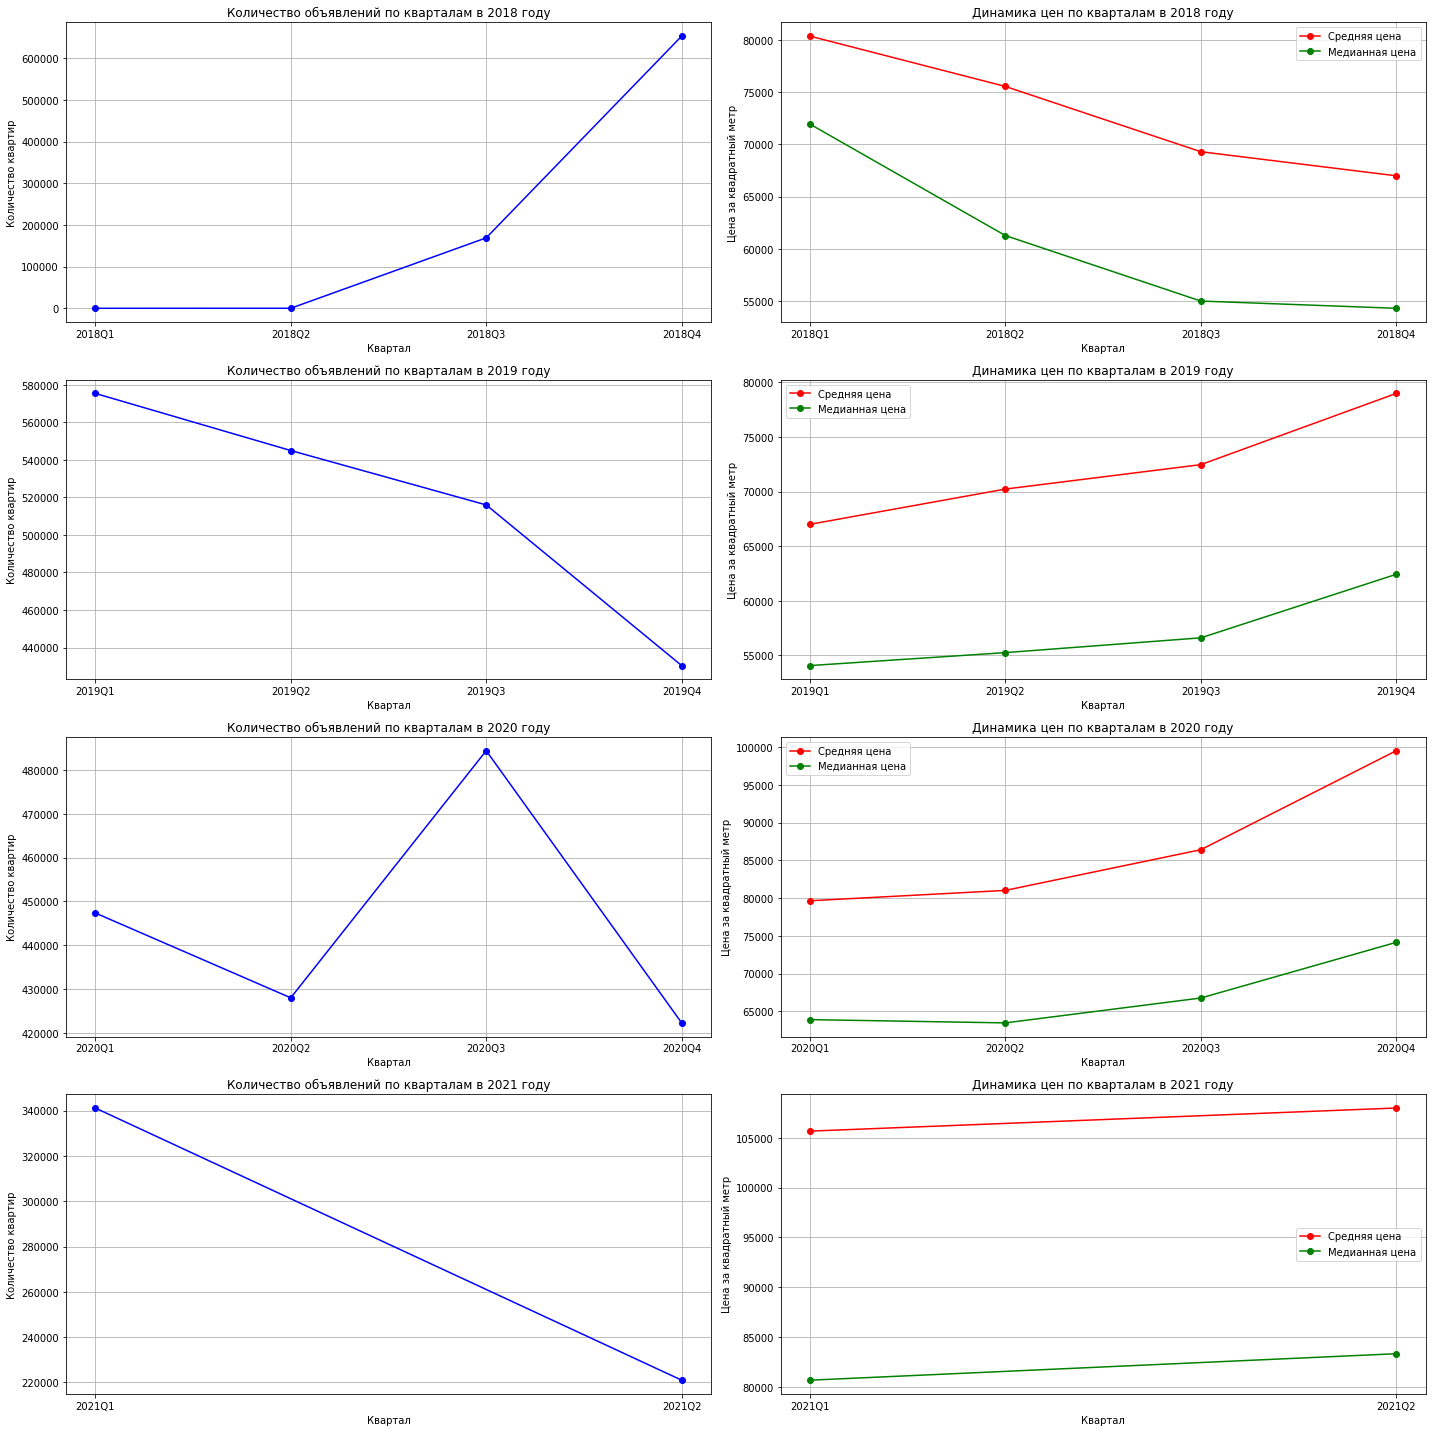

In [32]:
# Функция для построения графиков по кварталам для каждого года
def plot_quarterly_data(year, ax, df):
    # Фильтрация данных по году
    yearly_data = df[df['year'] == year]
    quarterly_data = yearly_data.groupby('quarter').size()
    average_prices = yearly_data.groupby('quarter')['price_per_metre'].mean()
    median_prices = yearly_data.groupby('quarter')['price_per_metre'].median()

    # График количества объявлений
    ax[0].plot(quarterly_data.index, quarterly_data.values, marker='o', color='b')
    ax[0].set_title(f'Количество объявлений по кварталам в {year} году')
    ax[0].set_xlabel('Квартал')
    ax[0].set_ylabel('Количество квартир')
    ax[0].grid()

    # График средней и медианной цены
    ax[1].plot(average_prices.index, average_prices.values, marker='o', color='r', label='Средняя цена')
    ax[1].plot(median_prices.index, median_prices.values, marker='o', color='g', label='Медианная цена')
    ax[1].set_title(f'Динамика цен по кварталам в {year} году')
    ax[1].set_xlabel('Квартал')
    ax[1].set_ylabel('Цена за квадратный метр')
    ax[1].legend()
    ax[1].grid()

# Создание субплотов для каждого года
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Построение графиков для каждого года
plot_quarterly_data(2018, axes[0], df)
plot_quarterly_data(2019, axes[1], df)
plot_quarterly_data(2020, axes[2], df)
plot_quarterly_data(2021, axes[3], df)

plt.tight_layout()
plt.show()

Разделение на кварталы достаточно сильно сглаживают динамику, особенно для цен. 

`Сезонность в количестве объявлений:` пик в начале года и монотонное снижение к концу. В 2020 году снижение нарушилось из-за увеличения количества предожения квартир в июле, что сказалось на пике в 3 квартале. 

#### Разложение временного ряда на компонентны: тренд, сезонность, остатки.

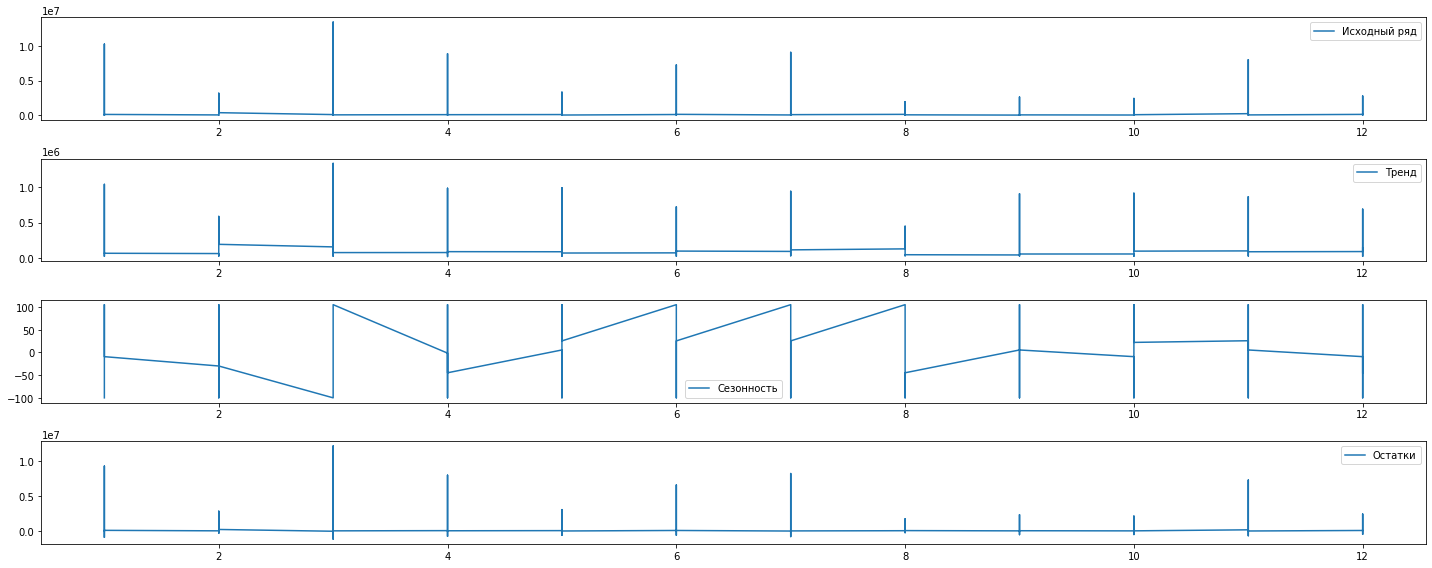

In [34]:
# Переименовываем колонку 'month' перед установкой индекса
df.rename(columns={'month': 'month_col'}, inplace=True)

# Сортируем по новому имени колонки
df = df.sort_values('month_col')

# Устанавливаем 'month_col' как индекс
df.set_index('month_col', inplace=True)

# Разложение временного ряда
decomposition = seasonal_decompose(df['price_per_metre'], model='additive', period=12)  # period=12 для ежемесячной сезонности

# Извлечение компонентов
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Построение графиков
plt.figure(figsize=(20, 8))

plt.subplot(411)
plt.plot(df['price_per_metre'], label='Исходный ряд')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Тренд')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Сезонность')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Остатки')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

* Исходный ряд: базовый уровень достаточно низкий с некоторыми пиками, которые могут говорить о сезонности.
* Тренд: для наших данных он практически горизонтален и близок к нулю, что говорит о том, что нет ярко выраженного долгосрочного тренда увеличения или падения цен.
* Сезонность: присутствует сезонность с непостоянной амплитудой. Как и было отмечено на линейных графиках, присутсвует увеличение к началу весны, после - снижение к началу лета, затем увеличение в летний период со спадом в августе, пик в сентябре и снижение до конца года. Однако для наших данных сезонный эффект нестабилен, скорее всего именно из-за того, какой временной промежуток был выбран (в целом достаточно нестабильный).
* Остатки: в основном небольшие и их пики повторяют пики исходного ряда.

В целом, для наших данных характерен сезонный характер, однако амплитуда этой сезонности нестабильна. 

#### Определение выгодных моментов (месяцев) для покупки/продажи недвижимости.

В целом, поведение данных мы описали. Теперь определим, когда же всё-таки выгодно продавать и покупать недвижимость. Будем считать, что продавать выгоднее всего, когда высокая средняя цена, а покупать - когда средняя цена за квадратный метр достигает своего пика.

In [67]:
df['date'] = pd.to_datetime(df['date'])

In [68]:
df['month'] = df['date'].dt.month

In [36]:
# Группируем данные по 'year' и 'month' и рассчитываем среднюю цену за квадратный метр
monthly_avg_prices = df.groupby(['year', 'month'])['price_per_metre'].mean().reset_index()

# Функция для нахождения трех лучших месяцев для покупки и продажи для каждого года
def top_three_months(group):
    # Сортируем значения по возрастанию цены для нахождения минимальных
    best_for_purchase = group.nsmallest(3, 'price_per_metre')

    # Сортируем значения по убыванию цены для нахождения максимальных
    best_for_sale = group.nlargest(3, 'price_per_metre')
    
    return best_for_purchase, best_for_sale

# Применяем функцию к каждой группе по 'year'
for year, group in monthly_avg_prices.groupby('year'):
    best_purchase, best_sale = top_three_months(group)
    
    print(f"\nГод {int(year)}:")

    print("  Лучшие месяцы для покупки:")
    for _, row in best_purchase.iterrows():
        print(f"    {int(row['year'])}-{int(row['month']):02} с ценой {row['price_per_metre']:.2f}")
    
    print("  Лучшие месяцы для продажи:")
    for _, row in best_sale.iterrows():
        print(f"    {int(row['year'])}-{int(row['month']):02} с ценой {row['price_per_metre']:.2f}")


Год 2018:
  Лучшие месяцы для покупки:
    2018-07 с ценой 61932.54
    2018-11 с ценой 66298.31
    2018-10 с ценой 66958.12
  Лучшие месяцы для продажи:
    2018-02 с ценой 86343.84
    2018-04 с ценой 82785.19
    2018-03 с ценой 79668.59

Год 2019:
  Лучшие месяцы для покупки:
    2019-01 с ценой 66544.13
    2019-02 с ценой 66766.07
    2019-03 с ценой 67585.11
  Лучшие месяцы для продажи:
    2019-11 с ценой 83462.27
    2019-10 с ценой 76940.99
    2019-12 с ценой 76500.61

Год 2020:
  Лучшие месяцы для покупки:
    2020-02 с ценой 77707.65
    2020-04 с ценой 78071.84
    2020-01 с ценой 79725.19
  Лучшие месяцы для продажи:
    2020-12 с ценой 109986.12
    2020-11 с ценой 97336.15
    2020-10 с ценой 93642.35

Год 2021:
  Лучшие месяцы для покупки:
    2021-01 с ценой 98628.47
    2021-03 с ценой 106976.66
    2021-04 с ценой 107522.48
  Лучшие месяцы для продажи:
    2021-05 с ценой 116017.24
    2021-02 с ценой 108507.03
    2021-04 с ценой 107522.48


**Лучший период для покупки:**

`Для 2018:` Лучшие месяца для покупки: Июль, Октябрь и Ноябрь. Учитывая, что адекватные данные у нас присутствуют с сентября 2018 года, сложно оценивать этот результат. 

`Для 2019:` Лучшим периодом для покупки считался первый квартал: Январь, Февраль и Март. Как мы и определяли, в начале года у нас небольшое "затишье" и средние цены за квадратный метр относительно невысокие. 

`Для 2020:` Лучшим периодом для покупки также считался первый квартал, однако без Марта, в котором наблюдался серьезный пик. Поэтому в 2020 году было выгодно покупать жилье в Январе, Феврале и Апреле. 

`Для 2021:` Два лучших месяца для покупки: Январь и Март, которые принадлежат первому кварталу года. 

**Лучший период для продажи:**

`Для 2018:` Лучшими месяцами для продажи считались Февраль, Март и Апрель, однако мы решили, что не будем рассматривать данные по этому году до сентября.

`Для 2019:` Лучшим периодом для продажи считается конец года: Октябрь, Ноябрь и Декабрь. Мы также определяли, что в конце года снижается предложение квартир, а цены на них растут. 

`Для 2020:` Лучшим периодом для продажи также считается конец года.

`Для 2021:` Лучшими месяцами для продажи в 2021 считаются Май, Апрель и Февраль. Возможно, если бы у нас были данные за конец периода, то мы бы снова получили результаты, близкие к 2019-2020 годам. 

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="12"></a> 
    <h1 style="color: darkblue;">Выводы по исследованию:</h1
</div> <a class="anchor" id="12"></a> 

* В 2019 году выгоднее всего покупать жилье было в начале года: в Январе, Феврале и Марте. Продавать - в конце года, когда цены за квадратный метр начали расти: в Октябре, Ноябре и Декабре.

* В 2020 году, по сравнению с 2019, проищошло снижение количества объявлений о продаже квартир, а цена за квадратный метр, напротив, выросла после начала пандемии. Таким образом, выгоднее всего было покупать в начале года, а продавать - в конце.

* Мы определили сезонность в данных: как правило, **выгоднее покупать квартиры в начале года, а продавать - в конце**. Также были зафиксированы скачки цен в Сентябре и летом (Июнь, Июль). Однако данные за 2 года из 4 неполные, а 2020 год был сильно подвержен внешним факторам, поэтому эти наблюдения не стоит расширять на другие временные промежутки.

[Вернуться к навигации](#2)

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="13"></a> 
    <h1 style="color: darkblue;">Формулировка собственных гипотез о данных</h1>
</div> <a class="anchor" id="13"></a> 

Большая часть работы позади - мы очистили данные, проанализировали рынок недвижимости и цены на квадратный метр, изучили сезонность ценообразования. Теперь можно перейти к самому интересному - формулировка собственных гипотез о данных и проверка их статистическими мтодами! 

**В моих данных меня интересуют следующие моменты:**

`1.` Гипотеза 1 (H0): Средняя цена квартир в кирпично-монолитных зданиях статистически значимо не отличается от средней цены квартир в зданиях другого типа. 

`2.` Гипотеза 2 (H0): Средняя цена квартир, расположенные на самых высоких (последних) этажах, статистически значимо не отличается от средней цены квартир, расположенных на других этажах. 

`3.` Гипотеза 3 (H0): Гипотеза 3: Средняя цена за квартиру, выставленная на продажу в Январе-Феврале, статистически значимо не отличается от средней цены квартиры, выставленной на продажу в Ноябре-Декабре. 

`4.` Гипотеза 4 (H0): Средние цены на квартиры, выставленные на продажу в Москве и Санкт-Петербурге, не имеют статистически значимых различий между собой.  

`5.` Гипотеза 5 (H0): Средние цены на квартиры, обращающиеся на первичном и на вторичном рынке, не имеют статистически значимых различий между собой. 

### Гипотеза 1: Средняя цена квартир в кирпично-монолитных зданиях статистически значимо не отличается от средней цены квартир в зданиях другого типа.

In [37]:
h1_1 = df[df['building_type'] == 2]
h1_2 = df[df['building_type'] != 2]

In [38]:
print('Средняя цена для квартир, выставленных на продажу в кирпично-монолитных зданиях', h1_1['price'].mean())
print('Средняя цена для квартир, выставленных на продажу в других зданиях', h1_2['price'].mean())

Средняя цена для квартир, выставленных на продажу в кирпично-монолитных зданиях 7087044.506195173
Средняя цена для квартир, выставленных на продажу в других зданиях 3783387.7966096466


В абсолютном выражении средняя цена для кирпично-монолитного здания выше, чем для других типов зданий. 

Исходя из нашего опыта работы с данными, мы помним, что у нашего распределения цен есть опасные отклонения от нормальности, на которые нельзя закрывать глаза: отсутствие формы "колокола" и серьезные аномальные значения. Однако, так как у нас достаточно большой объем выборки, мы можем попробовать использовать для проверки и критерий Стьюдента: в случае успеха остальных тестов он лишь подтвердит статистическую значимость различий. Тем не менее, большее предпочтение мы будем отдавать Bootstrap анализу. 

### HO - Нет статистически значимых различий между средними ценами в двух выборках
### H1 - Есть статистически значимые различия между средними ценами в двух выборках 

**_Уровень значимости: 0,95_**

In [39]:
#t-критерий Стьюдента 
print("T-критерий Стьюдента:")
t_statistic, p_value = stats.ttest_ind(h1_1['price'], h1_2['price'])
print(f"  t-статистика: {t_statistic:.2f}")
print(f"  p-значение: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("  Отвергаем нулевую гипотезу. Средние цены статистически значимо различаются (t-критерий).")
else:
    print("  Не отвергаем нулевую гипотезу. Средние цены не различаются статистически значимо (t-критерий).")

T-критерий Стьюдента:
  t-статистика: 430.07
  p-значение: 0.000
  Отвергаем нулевую гипотезу. Средние цены статистически значимо различаются (t-критерий).


Также можем воспользоваться непараметрическим тестом Мана-Уитни: проверим статистически значимые различия между распределениями цен для кирпично-монолитных домов и для всех остальных типов зданий. 

In [40]:
# Критерий Манна-Уитни
print("\nКритерий Манна-Уитни:")
statistic, p_value = stats.mannwhitneyu(h1_1['price'], h1_2['price'])
print(f"  Статистика U: {statistic}")
print(f"  p-значение: {p_value:.3f}")

if p_value < alpha:
    print("  Отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках статистически значимо различаются")
else:
    print("  Не отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках не различаются статистически значимо ")


Критерий Манна-Уитни:
  Статистика U: 3308950423030.5
  p-значение: 0.000
  Отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках статистически значимо различаются


Закрепим полученные результаты с помощью метода bootstrap. Так как наши данные обладают достаточно сложным распределением, bootstrap, вероятно, будет давать самые интерпретируемые и достоверные выводы.

100%|██████████| 3000/3000 [32:24<00:00,  1.54it/s]


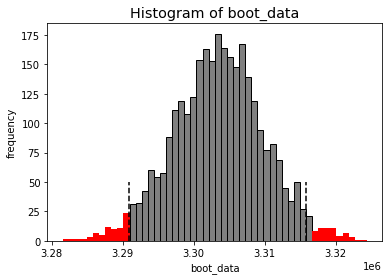

Средние: p-value = 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Отвергаем нулевую гипотезу: средние значения в группах отличаются.


In [41]:
from tqdm import tqdm 

CONF_LVL = 0.95

def bootstrap_ci(
    data_column_1,  
    data_column_2,  
    boot_it=3000, 
    statistic=np.mean,  
    bootstrap_conf_level=0.95  
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):  
        samples_1 = data_column_1.sample(
            boot_len, 
            replace=True  
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len,  
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1) - statistic(samples_2))  # разность средних
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    #  Вычисляем p-value 
    #  Предположим, что нулевая гипотеза - разницы между выборками нет
    p_1 = norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}


# Уровень значимости
alpha = 0.05

# Сравнение средних
result_mean = bootstrap_ci(h1_1['price'], h1_2['price'], statistic=np.mean)
print(f"Средние: p-value = {result_mean['p_value']:.100f}")
if result_mean['p_value'] <= alpha:
    print("Отвергаем нулевую гипотезу: средние значения в группах отличаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу: средние значения в группах не отличаются.")

In [42]:
left_boundary = result_mean['quants'].iloc[0]
right_boundary = result_mean['quants'].iloc[1]

In [43]:
left_boundary

0    3.290846e+06
Name: 0.025000000000000022, dtype: float64

In [44]:
right_boundary

0    3.315904e+06
Name: 0.975, dtype: float64

**По всем трём тестам получили статистические значимые различия, а с помощью метода bootstrap определили доверительный интервал для разницы средних значений двух выборок: с вероятностью 0,95 для каждой пары подвыборок мы получим разницу между средними значениями цен не меньше чем (приблизительно) 3.29 миллиона и не больше чем (приблизительно) 3.31 миллиона рублей.**

### Гипотеза 2: Средняя цена квартир, расположенные на самых высоких (последних) этажах, статистически значимо не отличается от средней цены квартир, расположенных на других этажах. 

С помощью этой гипотезы я хочу проверить, есть ли тренд на дорогие квартиры на последних этажах многоэтажек: возможно, квартиры, которые продаютися с красивыми видами на город или пентхаусы.

### HO - Нет статистически значимых различий между средними ценами в двух выборках
### H1 - Есть статистически значимые различия между средними ценами в двух выборках 

**_Уровень значимости: 0,95_**

In [69]:
# Создаем выборки
h2_1 = df[(df['level'] == df['levels']) & (df['levels'] > 25)]['price']
h2_2 = df[~((df['level'] == df['levels']) & (df['levels'] > 25))]['price']

if h2_1.empty:
    print("В выборке h2_1 нет данных.")
if h2_2.empty:
    print("В выборке h2_2 нет данных.")

print('Средняя цена для квартир на самых высоких этажах:', h2_1.mean())
print('Средняя цена для квартир на остальных этажах:', h2_2.mean())

Средняя цена для квартир на самых высоких этажах: 10779966.930737423
Средняя цена для квартир на остальных этажах: 4484235.9941089


Средние цены различаются. Однако насколько закономерен данный результат, или же он обусловлен случайностью? По аналогии с проверкой первой гипотезы проведем три теста: тест Стьюдента для сравнения двух несвязанных выборок, тест Мана-Уитни и Boostrap тест.

In [46]:
#t-критерий Стьюдента 
print("T-критерий Стьюдента:")
t_statistic, p_value = stats.ttest_ind(h2_1, h2_2)
print(f"  t-статистика: {t_statistic:.2f}")
print(f"  p-значение: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("  Отвергаем нулевую гипотезу. Средние цены статистически значимо различаются (t-критерий).")
else:
    print("  Не отвергаем нулевую гипотезу. Средние цены не различаются статистически значимо (t-критерий).")

T-критерий Стьюдента:
  t-статистика: 46.31
  p-значение: 0.000
  Отвергаем нулевую гипотезу. Средние цены статистически значимо различаются (t-критерий).


In [47]:
# Критерий Манна-Уитни
print("\nКритерий Манна-Уитни:")
statistic, p_value = stats.mannwhitneyu(h2_1, h2_2)
print(f"  Статистика U: {statistic}")
print(f"  p-значение: {p_value:.3f}")

if p_value < alpha:
    print("  Отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках статистически значимо различаются")
else:
    print("  Не отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках не различаются статистически значимо ")


Критерий Манна-Уитни:
  Статистика U: 12643841383.0
  p-значение: 0.000
  Отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках статистически значимо различаются


In [70]:
CONF_LVL = 0.95

def bootstrap_ci(
    data_column_1,  
    data_column_2,  
    boot_it=500, 
    statistic=np.mean,  
    bootstrap_conf_level=0.95  
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):  
        samples_1 = data_column_1.sample(
            boot_len, 
            replace=True  
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len,  
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1) - statistic(samples_2))  # разность средних
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    #  Вычисляем p-value 
    #  Предположим, что нулевая гипотеза - разницы между выборками нет
    p_1 = norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

100%|██████████| 500/500 [06:17<00:00,  1.32it/s]


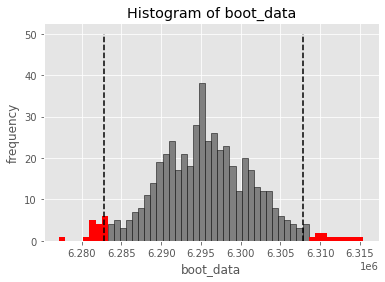

Средние: p-value = 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Отвергаем нулевую гипотезу: средние значения в группах отличаются.


In [71]:
# Сравнение средних
result_mean = bootstrap_ci(h2_1, h2_2, statistic=np.mean)
print(f"Средние: p-value = {result_mean['p_value']:.100f}")
if result_mean['p_value'] <= alpha:
    print("Отвергаем нулевую гипотезу: средние значения в группах отличаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу: средние значения в группах не отличаются.")

In [72]:
left_boundary = result_mean['quants'].iloc[0]
right_boundary = result_mean['quants'].iloc[1]

In [73]:
left_boundary

0    6.282782e+06
Name: 0.025000000000000022, dtype: float64

In [74]:
right_boundary

0    6.307897e+06
Name: 0.975, dtype: float64

**После проведения всех трех тестов мы отвергли нулевую гипотезу. С вероятностью 0.95 для каждой пары подвыборок мы получим разницу средних значений не меньше, чем 6.26 миллионов и не больше, чем 6.3 миллиона. Это достаточно большая разница: таким образом, можно говорить о том, что квартиры на верхних этажах многоэтажек действительно в среднем стоят дороже, чем любые другие квартиры в нашем датасете.**

### Гипотеза 3: Средняя цена за квартиру, выставленная на продажу в Январе-Феврале, статистически значимо не отличается от средней цены квартиры, выставленной на продажу в Ноябре-Декабре.

Когда мы определяли лучшие периоды для покупки и продажи квартир, мы (я) сошлись на том, что, как правило, выгодно покупать жилье в начале года: Январь-Февраль, а продавать жилье - ближе к концу года: Ноябрь-Декабрь. Попробуем это проверить с помощью проверки гипотезы.

### HO - Нет статистически значимых различий между средними ценами в двух выборках
### H1 - Есть статистически значимые различия между средними ценами в двух выборках 

**_Уровень значимости: 0,95_**

In [75]:
h3_1 = df[(df['month'] == 1) | (df['month'] == 2)]
h3_2 = df[(df['month'] == 11) | (df['month'] == 12)]

In [76]:
print('Средняя цена для квартир на самых высоких этажах:', h3_1['price'].mean())
print('Средняя цена для квартир на остальных этажах:', h3_2['price'].mean())

Средняя цена для квартир на самых высоких этажах: 4412843.899059601
Средняя цена для квартир на остальных этажах: 4526979.789644175


Средняя цена на квартиры, выставленные на продажу в Январе и Феврале, совсем чуть-чуть ниже средней цены за квартиры, выставленные на продажу в Ноябре и Декабре. Тем не менее, проверим гипотезу с помощью статистических тестов:

In [77]:
#t-критерий Стьюдента 
print("T-критерий Стьюдента:")
t_statistic, p_value = stats.ttest_ind(h3_1['price'], h3_2['price'])
print(f"  t-статистика: {t_statistic:.2f}")
print(f"  p-значение: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("  Отвергаем нулевую гипотезу. Средние цены статистически значимо различаются (t-критерий).")
else:
    print("  Не отвергаем нулевую гипотезу. Средние цены не различаются статистически значимо (t-критерий).")

T-критерий Стьюдента:
  t-статистика: -10.66
  p-значение: 0.000
  Отвергаем нулевую гипотезу. Средние цены статистически значимо различаются (t-критерий).


In [78]:
# Критерий Манна-Уитни
print("\nКритерий Манна-Уитни:")
statistic, p_value = stats.mannwhitneyu(h3_1['price'], h3_2['price'])
print(f"  Статистика U: {statistic}")
print(f"  p-значение: {p_value:.3f}")

if p_value < alpha:
    print("  Отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках статистически значимо различаются")
else:
    print("  Не отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках не различаются статистически значимо ")


Критерий Манна-Уитни:
  Статистика U: 400492975138.0
  p-значение: 0.001
  Отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках статистически значимо различаются


100%|██████████| 500/500 [01:05<00:00,  7.65it/s]


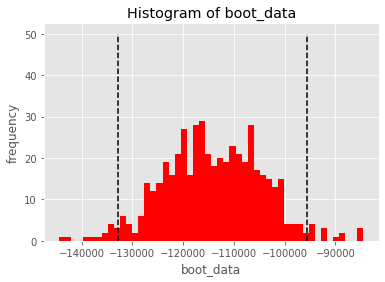

Средние: p-value = 0.0000000000000000000000000000000185851561401571728776317888563181063107220404451554549555393464394171
Отвергаем нулевую гипотезу: средние значения в группах отличаются.


In [79]:
# Сравнение средних
result_mean = bootstrap_ci(h3_1['price'], h3_2['price'], statistic=np.mean)
print(f"Средние: p-value = {result_mean['p_value']:.100f}")
if result_mean['p_value'] <= alpha:
    print("Отвергаем нулевую гипотезу: средние значения в группах отличаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу: средние значения в группах не отличаются.")

In [80]:
left_boundary = result_mean['quants'].iloc[0]
right_boundary = result_mean['quants'].iloc[1]

In [81]:
left_boundary

0   -132820.105479
Name: 0.025000000000000022, dtype: float64

In [82]:
right_boundary

0   -95542.091854
Name: 0.975, dtype: float64

**По результатам всех трех тестов - отвергли нулевую гипотезу об отсутствии различий между средними ценами за квартиры в начале и в конце года. С помощью bootstrap метода определили доверительные интервалы для разницы средних: с вероятностью 0,95, извлекая подвыборки из двух наших выборок, мы получим разницу между средними не меньше, чем -92 992 рублей и не больше, чем -134 263 рублей. Не знаю, насколько это существенное снижение цен в контексте рынка недвижимости, тем не менее, оно есть.**

### Гипотеза 4: Средние цены на квартиры, выставленные на продажу в Москве и Санкт-Петербурге, не имеют статистически значимых различий между собой.

Москва и Санкт-Петербург, без сомнения, являются городами (регионами) с самыми высокими ценами на недвижимость, и если мы будем сравнивать их с другими регионами, то с огромной долей вероятности получим статистически значимые различия между ними. Однако насколько средние цены отличаются между Санкт-Петербургом и Москвой? Проверим гипотезу с помощью статистических методов:

### HO - Нет статистически значимых различий между средними ценами в двух выборках
### H1 - Есть статистически значимые различия между средними ценами в двух выборках 

**_Уровень значимости: 0,95_**

Пока что наблюдаем огромную разницу между средними ценами на недвижимость между Санкт-Петербургом и Москвой.

In [84]:
h4_1 = df[df['reg_name'] == 'Санкт-Петербург']
h4_2 = df[df['reg_name'] == 'Москва']

In [85]:
print('Средняя цена для квартир в Санкт-Петербурге:', h4_1['price'].mean())
print('Средняя цена для квартир в Москве:', h4_2['price'].mean())

Средняя цена для квартир в Санкт-Петербурге: 8236955.208340089
Средняя цена для квартир в Москве: 13180020.415924404


In [86]:
#t-критерий Стьюдента 
print("T-критерий Стьюдента:")
t_statistic, p_value = stats.ttest_ind(h4_1['price'], h4_2['price'])
print(f"  t-статистика: {t_statistic:.2f}")
print(f"  p-значение: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("  Отвергаем нулевую гипотезу. Средние цены статистически значимо различаются (t-критерий).")
else:
    print("  Не отвергаем нулевую гипотезу. Средние цены не различаются статистически значимо (t-критерий).")

T-критерий Стьюдента:
  t-статистика: -151.86
  p-значение: 0.000
  Отвергаем нулевую гипотезу. Средние цены статистически значимо различаются (t-критерий).


In [87]:
# Критерий Манна-Уитни
print("\nКритерий Манна-Уитни:")
statistic, p_value = stats.mannwhitneyu(h4_1['price'], h4_2['price'])
print(f"  Статистика U: {statistic}")
print(f"  p-значение: {p_value:.3f}")

if p_value < alpha:
    print("  Отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках статистически значимо различаются")
else:
    print("  Не отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках не различаются статистически значимо ")


Критерий Манна-Уитни:
  Статистика U: 55645177717.0
  p-значение: 0.000
  Отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках статистически значимо различаются


100%|██████████| 500/500 [00:25<00:00, 19.88it/s]


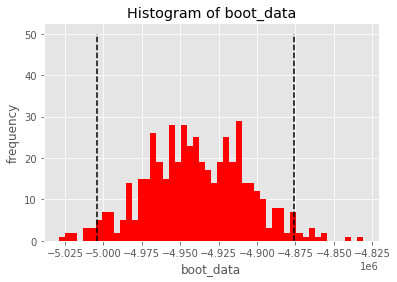

Средние: p-value = 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Отвергаем нулевую гипотезу: средние значения в группах отличаются.


In [88]:
# Сравнение средних
result_mean = bootstrap_ci(h4_1['price'], h4_2['price'], statistic=np.mean)
print(f"Средние: p-value = {result_mean['p_value']:.100f}")
if result_mean['p_value'] <= alpha:
    print("Отвергаем нулевую гипотезу: средние значения в группах отличаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу: средние значения в группах не отличаются.")

In [89]:
left_boundary = result_mean['quants'].iloc[0]
right_boundary = result_mean['quants'].iloc[1]

In [90]:
left_boundary

0   -5.004257e+06
Name: 0.025000000000000022, dtype: float64

In [91]:
right_boundary

0   -4.876133e+06
Name: 0.975, dtype: float64

**По результатам всех трех тестов - отвергем нулевую гипотезу. С вероятностью 0.95 при извлечении подвыборок из двух выборок мы получим разницу между их средними не меньше, чем 4.88 миллиона и не больше, чем 5.01 миллионов. Таким образом, квартиры в Москве действительно в среднем дороже, чем в Санкт-Петербурге, причем достаточно существенно.**

### Гипотеза 5: Средние цены на квартиры, обращающиеся на первичном и на вторичном рынке, не имеют статистически значимых различий между собой.

На протяжении выполнения всей работы я сталкивалась с тем, что квартиры на вторичном рынке стоят дороже. Пришло время проверить это с помощью статистических тестов.

### HO - Нет статистически значимых различий между средними ценами в двух выборках
### H1 - Есть статистически значимые различия между средними ценами в двух выборках 

**_Уровень значимости: 0,95_**

In [92]:
h5_1 = df[df['object_type'] == 1]
h5_2 = df[df['object_type'] == 2]

print('Средняя цена на первичном рынке:', h5_1['price'].mean())
print('Средняя цена на вторичном рынке:', h5_2['price'].mean())

Средняя цена на первичном рынке: 4315608.016987293
Средняя цена на вторичном рынке: 4929112.597884236


Пока что средняя цена на вторичном рынке немного выше, чем на первичном.

In [93]:
#t-критерий Стьюдента 
print("T-критерий Стьюдента:")
t_statistic, p_value = stats.ttest_ind(h5_1['price'], h5_2['price'])
print(f"  t-статистика: {t_statistic:.2f}")
print(f"  p-значение: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("  Отвергаем нулевую гипотезу. Средние цены статистически значимо различаются (t-критерий).")
else:
    print("  Не отвергаем нулевую гипотезу. Средние цены не различаются статистически значимо (t-критерий).")

T-критерий Стьюдента:
  t-статистика: -86.14
  p-значение: 0.000
  Отвергаем нулевую гипотезу. Средние цены статистически значимо различаются (t-критерий).


In [94]:
# Критерий Манна-Уитни
print("\nКритерий Манна-Уитни:")
statistic, p_value = stats.mannwhitneyu(h5_1['price'], h5_2['price'])
print(f"  Статистика U: {statistic}")
print(f"  p-значение: {p_value:.3f}")

if p_value < alpha:
    print("  Отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках статистически значимо различаются")
else:
    print("  Не отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках не различаются статистически значимо ")


Критерий Манна-Уитни:
  Статистика U: 2530236639778.0
  p-значение: 0.000
  Отвергаем нулевую гипотезу. Средние ранги и распределения цен в двух выборках статистически значимо различаются


100%|██████████| 500/500 [05:16<00:00,  1.58it/s]


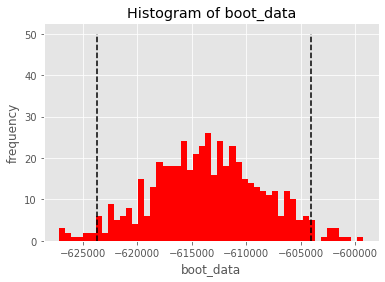

Средние: p-value = 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Отвергаем нулевую гипотезу: средние значения в группах отличаются.


In [95]:
# Сравнение средних
result_mean = bootstrap_ci(h5_1['price'], h5_2['price'], statistic=np.mean)
print(f"Средние: p-value = {result_mean['p_value']:.100f}")
if result_mean['p_value'] <= alpha:
    print("Отвергаем нулевую гипотезу: средние значения в группах отличаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу: средние значения в группах не отличаются.")

In [96]:
left_boundary = result_mean['quants'].iloc[0]
right_boundary = result_mean['quants'].iloc[1]

In [97]:
left_boundary

0   -623712.803089
Name: 0.025000000000000022, dtype: float64

In [98]:
right_boundary

0   -604082.911215
Name: 0.975, dtype: float64

**Таким образом, мы снова отвергли все три гипотезы: цены на вторичном рынке в среднем выше, чем на первичном рынке. С вероятностью 0,95, извлекая подвыборки из наших выборок, мы получим разницу между подвыборкой из вторичного рынка и подвыборкой из перичного рынка не меньше, чем 602 973 рублей и не больше, чем 622 429 рублей. Это достаточно большая разница, особенно для квартир из недорого ценового диапазона.**

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="14"></a> 
    <h1 style="color: darkblue;">Выводы по исследованию:</h1
</div> <a class="anchor" id="14"></a> 

С помощью статистических методов мы проверили выдвинутые гипотезы: 

* **Квартиры, продающиеся в кирпично-монолитных домах, в среднем дороже, чем квартиры, продающиеся в зданиях любого другого типа**. Это подтверждает наши предположения в начале работы о том, что, вероятно, именно к этому типу здания относятся качественные и престижные квартиры.

* **Также мы определили, что существует тренд на дорогие квартиры на последних этажах высотных зданий**. Судя по тому, что такие квартиры в среднем стоят на целых 6 миллионов дороже любых других квартир, скорее всего это люксовые апартаменты или пентхаусы.

* **Мы обнаружили статистически значимые различия между средними ценами квартир, выставленных на продажу в Январе и Феврале и квартирами, вытсавленными на продажу к конце года: Ноябрь-Декабрь**. Это подтверждает наше предположение о том, в какие периоды рекомендуется продавать, а в какие - приобретать жилье.

* **Москва - официально самый дорогой регион в плане недвижимости**; при сравнении средних цен на квартиры в Санкт-Петербурге и в Москве обнаружены существенные статистически значимые различия.

* **Покупка квартиры на вторичном рынке обойдется в среднем дороже, чем покупка квартиры на первичном рынке**: во время проверки гипотез мы также обнаружили статистически значимые различия. 

[Вернуться к навигации](#2)

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    <a class="anchor" id="15"></a> 
    <h1 style="color: darkblue;">Общие выводы по исследованию: </h1
</div> <a class="anchor" id="15"></a> 

### На основе проведенного анализа большого массива данных об объектах недвижимости мы сделали следующие ключевые выводы:

### Структура и характеристики данных:

В процессе обработки данных были выявлены выбросы, устранены пропуски и скорректированы некорректные значения. При удалении экстремальных значений данные из датасета сравнивались с реальными предложениями на рынке недвижимости за период с 2018 по 2021 год, и если были основания сохранить данные, то я их сохраняла. Удалены отрицательные цены, поскольку они были признаны нетипичными: много отрицательных крупных значений принадлежало Новосибирской области или относилось к квартирам с очень маленькой площадью. Также были спрогнозировали значения для пропусков по столбцу с площадью кухни. Среди всех методов заполнения пропусков было выбрано заполнение по межгрупповому значению медианной доли кухни в общей площади для каждой группы кластера региона и типа здания, в котором располагалась квартира. Далее общая площадь кухни каждой квартиры, в которой отстутствовали данные по площади кухни, умножалась на расчитанную долю. 

### Ценовые тенденции:

Кирпично-монолитные дома демонстрируют самые высокие средние и медианные цены, что указывает на их престижность. То же самое мы подтвердили при проверке гипотезы в пункте выше. Деревянные дома имеют самые низкие цены, подразумевая меньшую ценность или редкость таких предложений. Самая средняя цена за квадратный метр - среди шестикомнатных квартир (если не учитывать единственную десятикомнатную квартиру). Самая низкая цена за квадратный метр - среди трехкомнатных квартир, а медианная - среди четырехкомнатных. Больше всего предложений для квартир с одной комнатной. По ценам для однокомнатных квартирах нельзя сказать однозначно: они имеют достаточно большое стандартное отклонение. Среди зданий с разной этажностью, самая высокая средняя цена за квадратный метр у зданий с 36 этажами, а самая низкая - среди двухэтажных зданий. Средняя цена за квадратный метр самая высокая для квартир, расположенных на 35 этаже, а самая низкая средняя цена - для квартир на первом этаже, что говорит о том, что такие квартиры могут считаться наименее предпочтительными для покупки. Наибольшие средние цены зафиксированы для квартир на последних этажах высоток, указывая на популярность люксовых апартаментов и пентхаусов. 

### Рынок первичной и вторичной недвижимости:

Первичный рынок предлагает больше объектов, однако цены на нем ниже, чем на вторичном рынке. Вторичный рынок остаётся значимым, и покупка на нем в среднем обходится дороже. Была сформулирована гипотеза об отсутствии различий между средними ценами на первичном и вторичном рынке и гипотеза была отвергнута на уровне значимости 0.05. 

### Сезонные изменения:

В 2019 и 2020 годах выгоднее было покупать жилье в начале года, а продавать — в конце. Существенные колебания цен в наблюдаемые периоды зафиксированы в начале и в конце года. Также среди пиков роста цен можно выделить летний период (Июль-Июнь) и Сентябрь - это тоже не самые удачные моменты для покупки, однако удачные для продажи. Однако для наших данных достаточно тяжело выделить однозначную сезонность, потому что данные захватывают нестабильный промежуток времени. 

### Географическая ценовая политика:

Москва удерживает позицию самого дорогого региона страны с сильными статистически значимыми различиями в цене по сравнению с другими крупными городами, такими как Санкт-Петербург. В целом мы разделили регионы на кластеры в зависимости от средней цены за квадратный метр; Москва и Санкт-Петербург были определены в два разных кластера, что говорит о непохожести цен на этих двух рынках на все другие регионы. 